# EDA for Loan Default Analysis

## Understanding Consumer and Loan Attributes to Minimize Risk in Lending

In [3]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## <font color=red>1) Data Cleaning<font>

#### Read in the Data set <font color=blue> application_data.csv </font>.

#### **application_data.csv**  
  -  contains all the information of the client at the time of application.
  -  The data is about whether a <font color=blue>*client has payment difficulties*</font>.

In [8]:
#Let's examine the application_data.csv load.
data0 = pd.read_csv("application_data.csv")

In [9]:
#let's check the head of the data frame data0.
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [10]:
#let's check the shape of the data frame data0.
shape=data0.shape
print('The shape',shape)

The shape (307511, 122)


In [11]:
#let's check the info() of the data frame data0.
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
#let's check the describe of the data frame data0.
data0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [13]:
#let's check the names of column.
data0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## <font color=red>2) Impute/Remove missing values</font>

#### let's check the missing values in column.

In [16]:
#let's check the sum of missing values in column.
data0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
#let's check the percentage of missing values in column.
data0.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [18]:
#let's check the missing values in column.
cut_off=19
cols_to_Drop=list(data0.columns[100*data0.isnull().mean()>cut_off])
print(cols_to_Drop,len(cols_to_Drop))

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSM

### Retain columns with 19% or less missing values


In [20]:
#Keep missing values in columns when the percentage of missing data is less than 19%.
data0=data0.loc[:,data0.isna().mean()<=.19]
len(data0.columns)

71

In [21]:
#let's check if the above changes has occured.
data0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

#### let's convert all negative values to positive values.

In [23]:
data0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [24]:
data0['DAYS_BIRTH']=data0['DAYS_BIRTH'].abs()

In [25]:
data0['DAYS_EMPLOYED']=data0['DAYS_EMPLOYED'].abs()

In [26]:
data0['DAYS_REGISTRATION']=data0['DAYS_REGISTRATION'].abs()

In [27]:
data0['DAYS_ID_PUBLISH']=data0['DAYS_ID_PUBLISH'].abs()

In [28]:
data0['DAYS_LAST_PHONE_CHANGE']=data0['DAYS_LAST_PHONE_CHANGE'].abs()

In [29]:
data0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   
6                    0.035792       13778           3130             1213.0   
7                    0.003122       18850            449             4597.0   
8                    0.018634       20099         365243             7427.0   
9                    0.019689       14469           2019            14437.

#### let's check the missing values in NAME_TYPE_SUITE column.

In [31]:
# Display summary statistics (count, unique values, top value, and frequency) for the "NAME_TYPE_SUITE" column
data0["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [32]:
# Count the occurrences of each unique value in the "NAME_TYPE_SUITE" column, sorted in descending order of frequency
data0["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [33]:
# let's Find and display the most frequently occurring value (mode) in the "NAME_TYPE_SUITE" column
data0["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [34]:
# Replace all missing (NaN) values in the "NAME_TYPE_SUITE" column with the string "Unaccompanied".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0['NAME_TYPE_SUITE'].fillna(value='Unaccompanied',inplace=True)

In [35]:
# let's check the total number of missing (NaN) values in the "NAME_TYPE_SUITE" column.
data0['NAME_TYPE_SUITE'].isnull().sum()

0

#### let's check the missing values in AMT_REQ_CREDIT_BUREAU_HOU column.

In [37]:
# let's check the total number of missing values in the "AMT_REQ_CREDIT_BUREAU_HOUR" column.
data0["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

In [38]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_HOUR" column.
data0["AMT_REQ_CREDIT_BUREAU_HOUR"].mean()

0.006402448193930645

In [39]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_DAY" column.
data0["AMT_REQ_CREDIT_BUREAU_DAY"].mean()

0.0070002105326475985

In [40]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_YEAR" column.
data0["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()

1.899974435321363

In [41]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_WEEK" column.
data0["AMT_REQ_CREDIT_BUREAU_WEEK"].mean()

0.0343619356973142

In [42]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_MON" column.
data0["AMT_REQ_CREDIT_BUREAU_MON"].mean()

0.26739526000781977

In [43]:
# let's check the mean of the "AMT_REQ_CREDIT_BUREAU_QRT" column.
data0["AMT_REQ_CREDIT_BUREAU_QRT"].mean()

0.26547414959848414

In [44]:
# Missing values in numeric columns can cause issues in analysis.
# Hence 0 is used in the place of NAN.(As 0 i oneof the comman approach)
# Replace all missing values in the columns from "AMT_REQ_CREDIT_BUREAU_HOUR" to "AMT_REQ_CREDIT_BUREAU_YEAR" with 0.
data0.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"]=data0.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)

In [45]:
#let's check the total number of missing values in the "AMT_REQ_CREDIT_BUREAU_HOUR" column after the 
data0["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

0

In [46]:
#let's check the sum of missing values in column.
#data0.isna().sum()
data0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

#### let's check the missing values in AMT_GOODS_PRICE column.

In [48]:
# let's check the mean of the "AMT_GOODS_PRICE" column.
data0["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [49]:
# Provides a summary of descriptive statistics for the column "AMT_GOODS_PRICE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [50]:
# This command calculates the median value of the "AMT_GOODS_PRICE" column in the dataset.
# The median represents the middle value of the data when it is sorted in ascending order.
# It is useful for understanding the central tendency of the "AMT_ANNUITY" values, especially when the data may contain outliers.
data0["AMT_GOODS_PRICE"].median()

450000.0

In [51]:
# Replace all missing (NaN) values in the "AMT_GOODS_PRICE" column with the median value of "AMT_GOODS_PRICE".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0["AMT_GOODS_PRICE"].fillna(data0["AMT_GOODS_PRICE"].median(),inplace=True)

In [52]:
#let's check the total number of missing values in the "AMT_GOODS_PRICE" column after replacing(NaN) values
data0["AMT_GOODS_PRICE"].isnull().sum()

0

#### let's check the missing values in AMT_ANNUITY column.

In [54]:
# let's check the mean of the "AMT_ANNUITY" column.
data0["AMT_ANNUITY"].mean()

27108.573909183444

In [55]:
#let's check the total number of missing values in the "AMT_REQ_CREDIT_BUREAU_HOUR" 
data0["AMT_ANNUITY"].isnull().sum()

12

In [56]:
# Provides a summary of descriptive statistics for the column "AMT_ANNUITY" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [57]:
# This command calculates the median value of the "AMT_ANNUITY" column in the dataset.
# The median represents the middle value of the data when it is sorted in ascending order.
# It is useful for understanding the central tendency of the "AMT_ANNUITY" values, especially when the data may contain outliers.
data0["AMT_ANNUITY"].median()

24903.0

<Axes: >

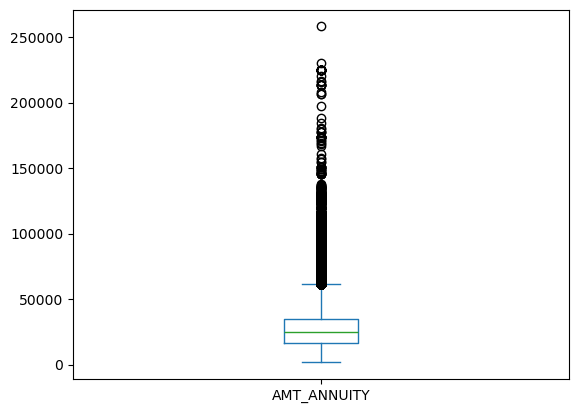

In [58]:

data0["AMT_ANNUITY"].plot.box()

In [59]:
# Replace all missing (NaN) values in the "AMT_ANNUITY" column with the median value of "AMT_ANNUITY"
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0["AMT_ANNUITY"].fillna(data0["AMT_ANNUITY"].median(),inplace=True)

In [60]:
#let's check the total number of missing values in the "AMT_ANNUITY" column after replacing(NaN) values
data0["AMT_ANNUITY"].isnull().sum()

0

In [61]:
#let's check the sum of missing values in column.
#data0.isna().sum()
data0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

#### let's check the missing values in CNT_FAM_MEMBERS column.

In [63]:
#let's check the total number of missing values in the "CNT_FAM_MEMBERS" column. 
data0["CNT_FAM_MEMBERS"].isnull().sum()

2

In [64]:
# let's check the mean of the "CNT_FAM_MEMBERS" column.
data0["CNT_FAM_MEMBERS"].mean()

2.152665450442101

In [65]:
# The median value of the dataset's "CNT_FAM_MEMBERS" column is determined by this command.
# When the data is arranged in ascending order, the median is the middle value.
# Understanding the "CNT_FAM_MEMBERS" values' central tendency is helpful, particularly in cases when the data may contain outliers.
data0["CNT_FAM_MEMBERS"].median()

2.0

In [66]:
# Provides a summary of descriptive statistics for the column "CNT_FAM_MEMBERS" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [67]:
# Replace all missing (NaN) values in the "CNT_FAM_MEMBERS" column with the median value of "CNT_FAM_MEMBERS".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0["CNT_FAM_MEMBERS"].fillna(data0["CNT_FAM_MEMBERS"].median(),inplace=True)

In [68]:
#let's check the total number of missing values in the "CNT_FAM_MEMBERS" column after replacing(NaN) values
data0["CNT_FAM_MEMBERS"].isnull().sum()

0

#### let's check the missing values in EXT_SOURCE_2  column.

In [70]:
#let's check the total number of missing values in the "EXT_SOURCE_2" column. 
data0["EXT_SOURCE_2"].isnull().sum()

660

In [71]:
# let's check the mean of the "EXT_SOURCE_2" column.
data0["EXT_SOURCE_2"].mean()

0.5143926741308462

In [72]:
# This command calculates the median value of the "EXT_SOURCE_2" column in the dataset.
# The median represents the middle value of the data when it is sorted in ascending order.
# It is useful for understanding the central tendency of the "EXT_SOURCE_2" values, especially when the data may contain outliers.
data0['EXT_SOURCE_2'].median()

0.5659614260608526

In [73]:
# Provides a summary of descriptive statistics for the column "EXT_SOURCE_2" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [74]:
# Replace all missing (NaN) values in the "EXT_SOURCE_2" column with the mean value of "EXT_SOURCE_2".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0['EXT_SOURCE_2'].fillna(data0['EXT_SOURCE_2'].mean(),inplace=True)

In [75]:
#let's check the total number of missing values in the "EXT_SOURCE_2" column after replacing(NaN) values
data0['EXT_SOURCE_2'].isnull().sum()

0

In [76]:
#let's check the sum of missing values in column.
#data0.isna().sum()
data0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

#### let's check the missing values in OBS_30_CNT_SOCIAL_CIRCLE  column.

In [78]:
# Provides a summary of descriptive statistics for the column "OBS_30_CNT_SOCIAL_CIRCLE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [79]:
# This command calculates the median value of the "OBS_30_CNT_SOCIAL_CIRCLE" column in the dataset.
# The median represents the middle value of the data when it is sorted in ascending order.
# It is useful for understanding the central tendency of the "OBS_30_CNT_SOCIAL_CIRCLE" values, especially when the data may contain outliers.
data0['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [80]:
#let's check the total number of missing values in the "OBS_30_CNT_SOCIAL_CIRCLE" column.
data0['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [81]:
# Provides a summary of descriptive statistics for the column "OBS_30_CNT_SOCIAL_CIRCLE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [82]:
# Provides a summary of descriptive statistics for the column "OBS_30_CNT_SOCIAL_CIRCLE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [83]:
# Provides a summary of descriptive statistics for the column "OBS_30_CNT_SOCIAL_CIRCLE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [84]:
# Missing values in numeric columns can cause issues in analysis.
# Hence 0 is used in the place of NAN.(As 0 i oneof the comman approach)
# Replace all missing values in the columns from "OBS_30_CNT_SOCIAL_CIRCLE" to "DEF_60_CNT_SOCIAL_CIRCLE" with 0.
data0.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE']=data0.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

In [85]:
#let's check the total number of missing values in the "OBS_30_CNT_SOCIAL_CIRCLE" column after replacing(NaN) values
data0['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [86]:
#let's check the sum of missing values in column.
#data0.isna().sum()
data0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

#### let's check the missing values in DAYS_LAST_PHONE_CHANGE  column. 

In [88]:
# Provides a summary of descriptive statistics for the column "DAYS_LAST_PHONE_CHANGE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<Axes: >

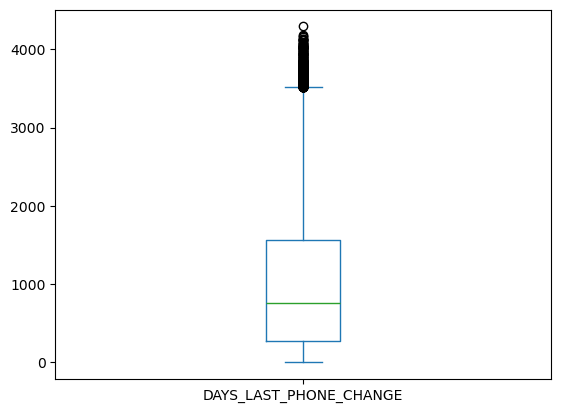

In [89]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'DAYS_LAST_PHONE_CHANGE' feature.
data0['DAYS_LAST_PHONE_CHANGE'].plot.box()

In [90]:
# Replace all missing (NaN) values in the "DAYS_LAST_PHONE_CHANGE" column with the mean value of "DAYS_LAST_PHONE_CHANGE".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data0['DAYS_LAST_PHONE_CHANGE'].fillna(data0['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)

In [91]:
#let's check the total number of missing values in the "DAYS_LAST_PHONE_CHANGE" column after replacing(NaN) values
data0['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [92]:
#let's check the sum of missing values in column, if in case any missing values are left.
#data0.isna().sum()
data0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [93]:
# let's check the structure of the dataframe
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [94]:
# Handle missing values or invalid data before conversion and convert to integer
data0["DAYS_REGISTRATION"]=data0["DAYS_REGISTRATION"].astype(int,errors="ignore")
data0["CNT_FAM_MEMBERS"]=data0["CNT_FAM_MEMBERS"].astype(int,errors="ignore")
data0["DAYS_REGISTRATION"]=data0["DAYS_REGISTRATION"].astype(int,errors="ignore")

In [95]:
# Understanding the data set
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0                1   
1                 1           1           0                2   
2                 1           1           0                1   
3                 1           0           0                2   
4                 1           0           0                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [96]:
#let's check the length od the columns
len(data0.columns)

71

In [97]:
# Selecting columns whose names contain the substrings 'BUREAU' or 'CNT' to focus on specific features related to credit bureau and family count
selected_cols=data0.loc[:,data0.columns.str.contains("BUREAU|CNT")]

In [98]:
# Convert all columns in selected_cols to numeric, coercing invalid values to NaN, replace NaN with 0, and convert the resulting values to integers.
data0[selected_cols.columns]=selected_cols.apply(pd.to_numeric,errors="coerce").fillna(0).astype(int)

In [99]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int32  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [100]:
# Display the first 5 rows of the FLAG_DOCUMENT_12 column to check its values.
data0["FLAG_DOCUMENT_12"].head()

0    0
1    0
2    0
3    0
4    0
Name: FLAG_DOCUMENT_12, dtype: int64

In [101]:
# Extract all column names containing the substring "FLAG" into a list and calculate their count.
flag_cols=data0.columns[data0.columns.str.contains("FLAG")].tolist()
len(flag_cols)

28

In [102]:
# Remove all columns with names containing the substring "FLAG" from the DataFrame and display the updated structure.
# df_app1=df_app1.drop(flag_col,axis=1)
# df.drop(columns=df.columns[df.columns.str.startswith("FLAG")],inplace=True)

data0=data0.loc[:,~data0.columns.str.contains("FLAG")]
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int32  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

#### Count the occurrences of each unique value in the 'CODE_GENDER' column to analyze gender distribution.

In [104]:
# Count the occurrences of each unique value in the 'CODE_GENDER' column to analyze gender distribution.
data0["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [105]:
# Replace anomalous 'XNA' values in the 'CODE_GENDER' column with 'F' for consistency in gender classification.
data0["CODE_GENDER"].replace(to_replace="XNA",value="F",inplace=True)

In [106]:
# Print the value counts for all columns with object (categorical/string) data types to explore the distribution of their values.
for col in data0.columns:
    if data0[col].dtype=="object":
        print(data0[col].value_counts())
        print("----"*20)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
--------------------------------------------------------------------------------
CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
--------------------------------------------------------------------------------
NA

In [107]:
# Drop rows where "ORGANIZATION_TYPE" has the value "XNA" as it represents missing/unknown data and occurs too frequently to be useful.
data0=data0.drop(data0.loc[data0["ORGANIZATION_TYPE"]=="XNA"].index)

In [108]:
# Display the count of each unique value in the "ORGANIZATION_TYPE" column to understand its distribution.
data0["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [109]:
# let's check the shape of the dataframe
data0.shape

(252137, 43)

In [110]:
# let's check the first 5 rows and columns presentin the dataset
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0               3648             2120                1                     2   
1               1186              291                2                     1   
2               4260             2531                1                     2   
3               9833             2437                2                     2   
4               4311             3458                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                      

#### creating bins for AMT_INCOME_TOTAL , AMT_CREDIT

In [112]:
# Counts the distinct income amounts in the AMT_INCOME_TOTAL column.
data0["AMT_INCOME_TOTAL"].nunique()

2266

In [113]:
# let's check the shape of the dataframe
data0.shape

(252137, 43)

In [114]:
# Sets the global format for displaying floating-point numbers in pandas, with two decimal places and thousand separators.
pd.options.display.float_format="{:,.2f}".format

In [115]:
# Provides a summary of descriptive statistics for the column "AMT_INCOME_TOTAL" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0["AMT_INCOME_TOTAL"].describe()

count       252,137.00
mean        175,914.07
std         258,851.59
min          25,650.00
25%         112,500.00
50%         157,500.00
75%         211,500.00
max     117,000,000.00
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

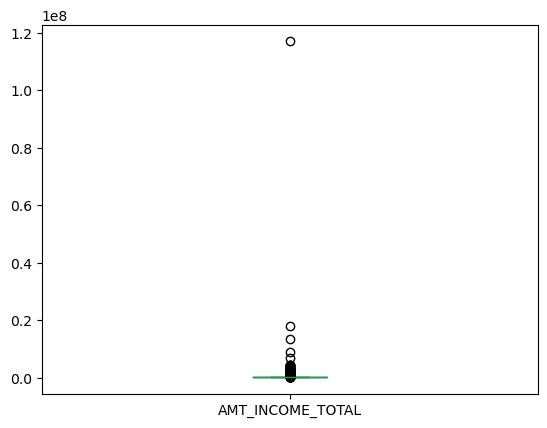

In [116]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_INCOME_TOTAL' feature.
data0["AMT_INCOME_TOTAL"].plot.box()

In [117]:
# let's check the first 5 rows and columns presentin the dataset
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

In [118]:
# "Create a new column, AMT_INCOME_RANGE, that categorizes AMT_INCOME_TOTAL into predefined income brackets based on specified bins and labels for easier segmentation and analysis."
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data0["AMT_INCOME_RANGE"]=pd.cut(data0["AMT_INCOME_TOTAL"],bins=bins_income,labels=slot_income)
data0["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [119]:
# Provides a summary of descriptive statistics for the column "AMT_CREDIT" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data0["AMT_CREDIT"].describe()

count     252,137.00
mean      611,398.46
std       406,527.20
min        45,000.00
25%       277,969.50
50%       521,280.00
75%       829,224.00
max     4,050,000.00
Name: AMT_CREDIT, dtype: float64

In [120]:
# let's check the new column AMT_INCOME_RANGE ha sbeen created.
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

In [121]:
# "Create a new column, AMT_CREDIT_RANGE, that categorizes AMT_CREDIT into predefined income brackets based on specified bins and labels for easier segmentation and analysis."
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data0["AMT_CREDIT_RANGE"]=pd.cut(data0["AMT_CREDIT"],bins=bins_credit,labels=slots_credit)
data0["AMT_CREDIT_RANGE"].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

In [122]:
# let's check the new column AMT_CREDIT_RANGE ha sbeen created.
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

#### note:Create bins of equal sizes based on Min - Max

## <font color=red>3) Data Analysis<font>

In [125]:
# Display the count of each unique value in the "TARGET" column to understand its distribution.
data0["TARGET"].value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

-  **1 = defaulters** (customers who failed to repay loans).
-  **0 = non defaulter** (customers who successfully repaid loans).

<Axes: xlabel='TARGET'>

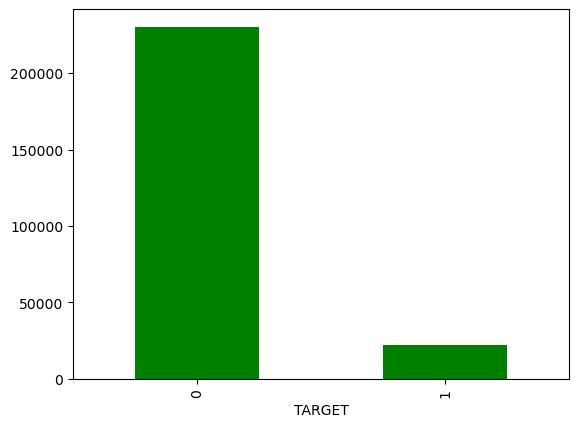

In [127]:
# Visualizing the distribution of defaulters and non-defaulters in the TARGET column using a bar chart.
data0.TARGET.value_counts().plot.bar(color="green")

The bar chart shows a significantly higher number of non-defaulters (0) compared to defaulters (1), indicating most customers successfully repaid their loans.

In [129]:
# Splitting the dataset into two subsets: one for non-defaulters (TARGET == 0) and one for defaulters (TARGET == 1). 
# The counts of each subset are then displayed.

target_0=data0.loc[data0["TARGET"]==0]
target_1=data0.loc[data0["TARGET"]==1]

len(target_0),len(target_1)

(230302, 21835)

In [130]:
# Calculating the ratio of non-defaulters to defaulters in the dataset to assess class imbalance.
np.round(len(target_0)/len(target_1),2)

10.55

In [131]:
# Displaying the first few records of non-defaulters (TARGET = 0) to inspect the data for further analysis.
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   
5         99,000.00   490,495.50    27,517.50       454,500.00   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   
5               Married  House / apartment                        0.04   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   
5       16941           1588               4970              477   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   
5                2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                     

### Visualizing the distribution for non-defaulters (TARGET = 0) using a count plot.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-50000'),
  Text(2, 0, '50000-75000'),
  Text(3, 0, '75000,100000'),
  Text(4, 0, '100000-125000'),
  Text(5, 0, '125000-150000'),
  Text(6, 0, '150000-175000'),
  Text(7, 0, '175000-200000'),
  Text(8, 0, '200000-225000'),
  Text(9, 0, '225000-250000'),
  Text(10, 0, '250000-275000'),
  Text(11, 0, '275000-300000'),
  Text(12, 0, '300000-325000'),
  Text(13, 0, '325000-350000'),
  Text(14, 0, '350000-375000'),
  Text(15, 0, '375000-400000'),
  Text(16, 0, '400000-425000'),
  Text(17, 0, '425000-450000'),
  Text(18, 0, '450000-475000'),
  Text(19, 0, '475000-500000'),
  Text(20, 0, '500000 and above')])

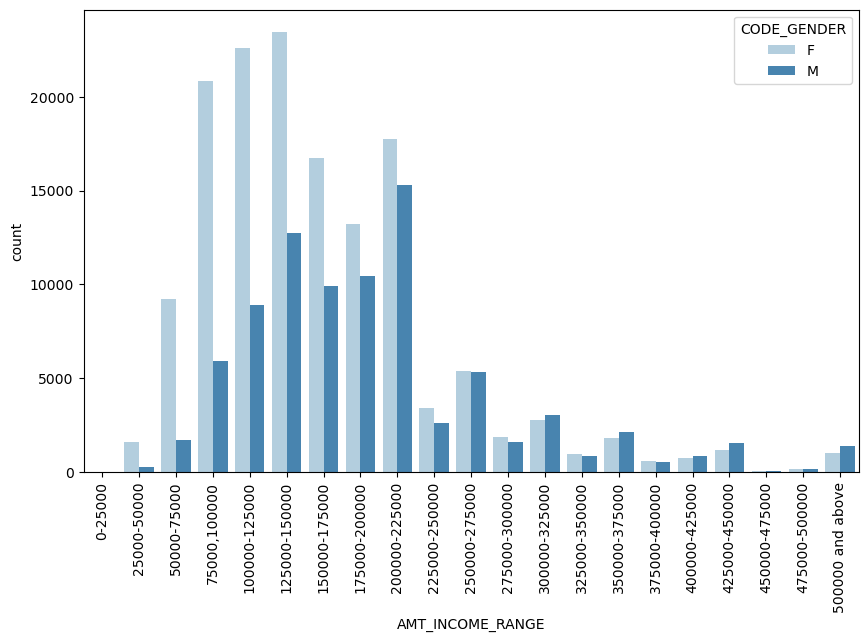

In [133]:
# Visualizing the distribution of income ranges ('AMT_INCOME_RANGE') by gender ('CODE_GENDER') for non-defaulters (TARGET = 0) using a count plot, with income categories on the x-axis and gender-based hues.
plt.figure(figsize=(10,6))
sns.countplot(target_0,x="AMT_INCOME_RANGE",hue="CODE_GENDER",palette="Blues")
plt.xticks(rotation=90)

The count plot is showing the distribution of income ranges for non-defaulters (TARGET = 0), categorized by gender (male and female), with income categories on the x-axis and gender distinctions represented by shades of blue.

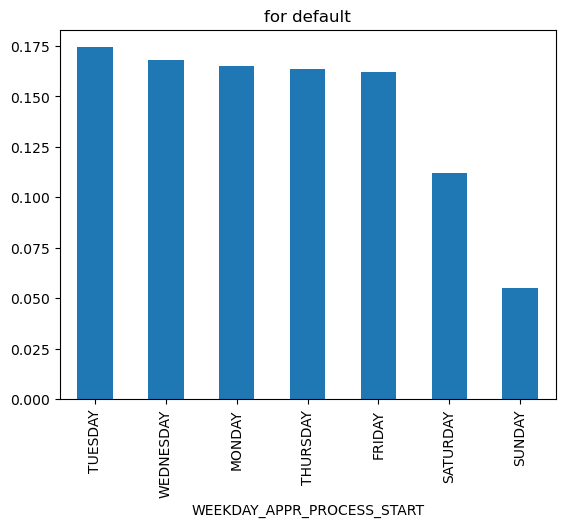

In [135]:
data0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

We can see from the graph that Saturday and Sunday tend to have fewer application launching processes.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Pensioner'),
  Text(5, 0, 'Businessman'),
  Text(6, 0, 'Maternity leave')])

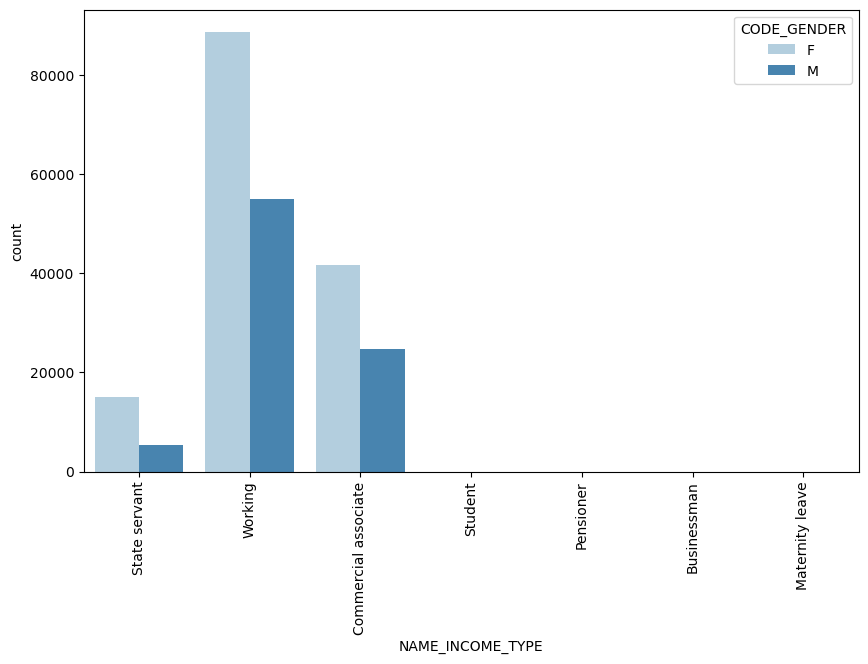

In [137]:
# Visualizing the distribution of income types ('NAME_INCOME_TYPE') by gender ('CODE_GENDER') for defaulters (TARGET = 0) using a count plot, with income types on the x-axis and gender-based hues.
plt.figure(figsize=(10,6))
sns.countplot(target_0,x="NAME_INCOME_TYPE",hue="CODE_GENDER",palette="Blues")
plt.xticks(rotation=90)

The count plot is showing the distribution of income types for non-defaulters (TARGET = 0), categorized by gender (male and female), with income types on the x-axis and gender distinctions represented by shades of blue.

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

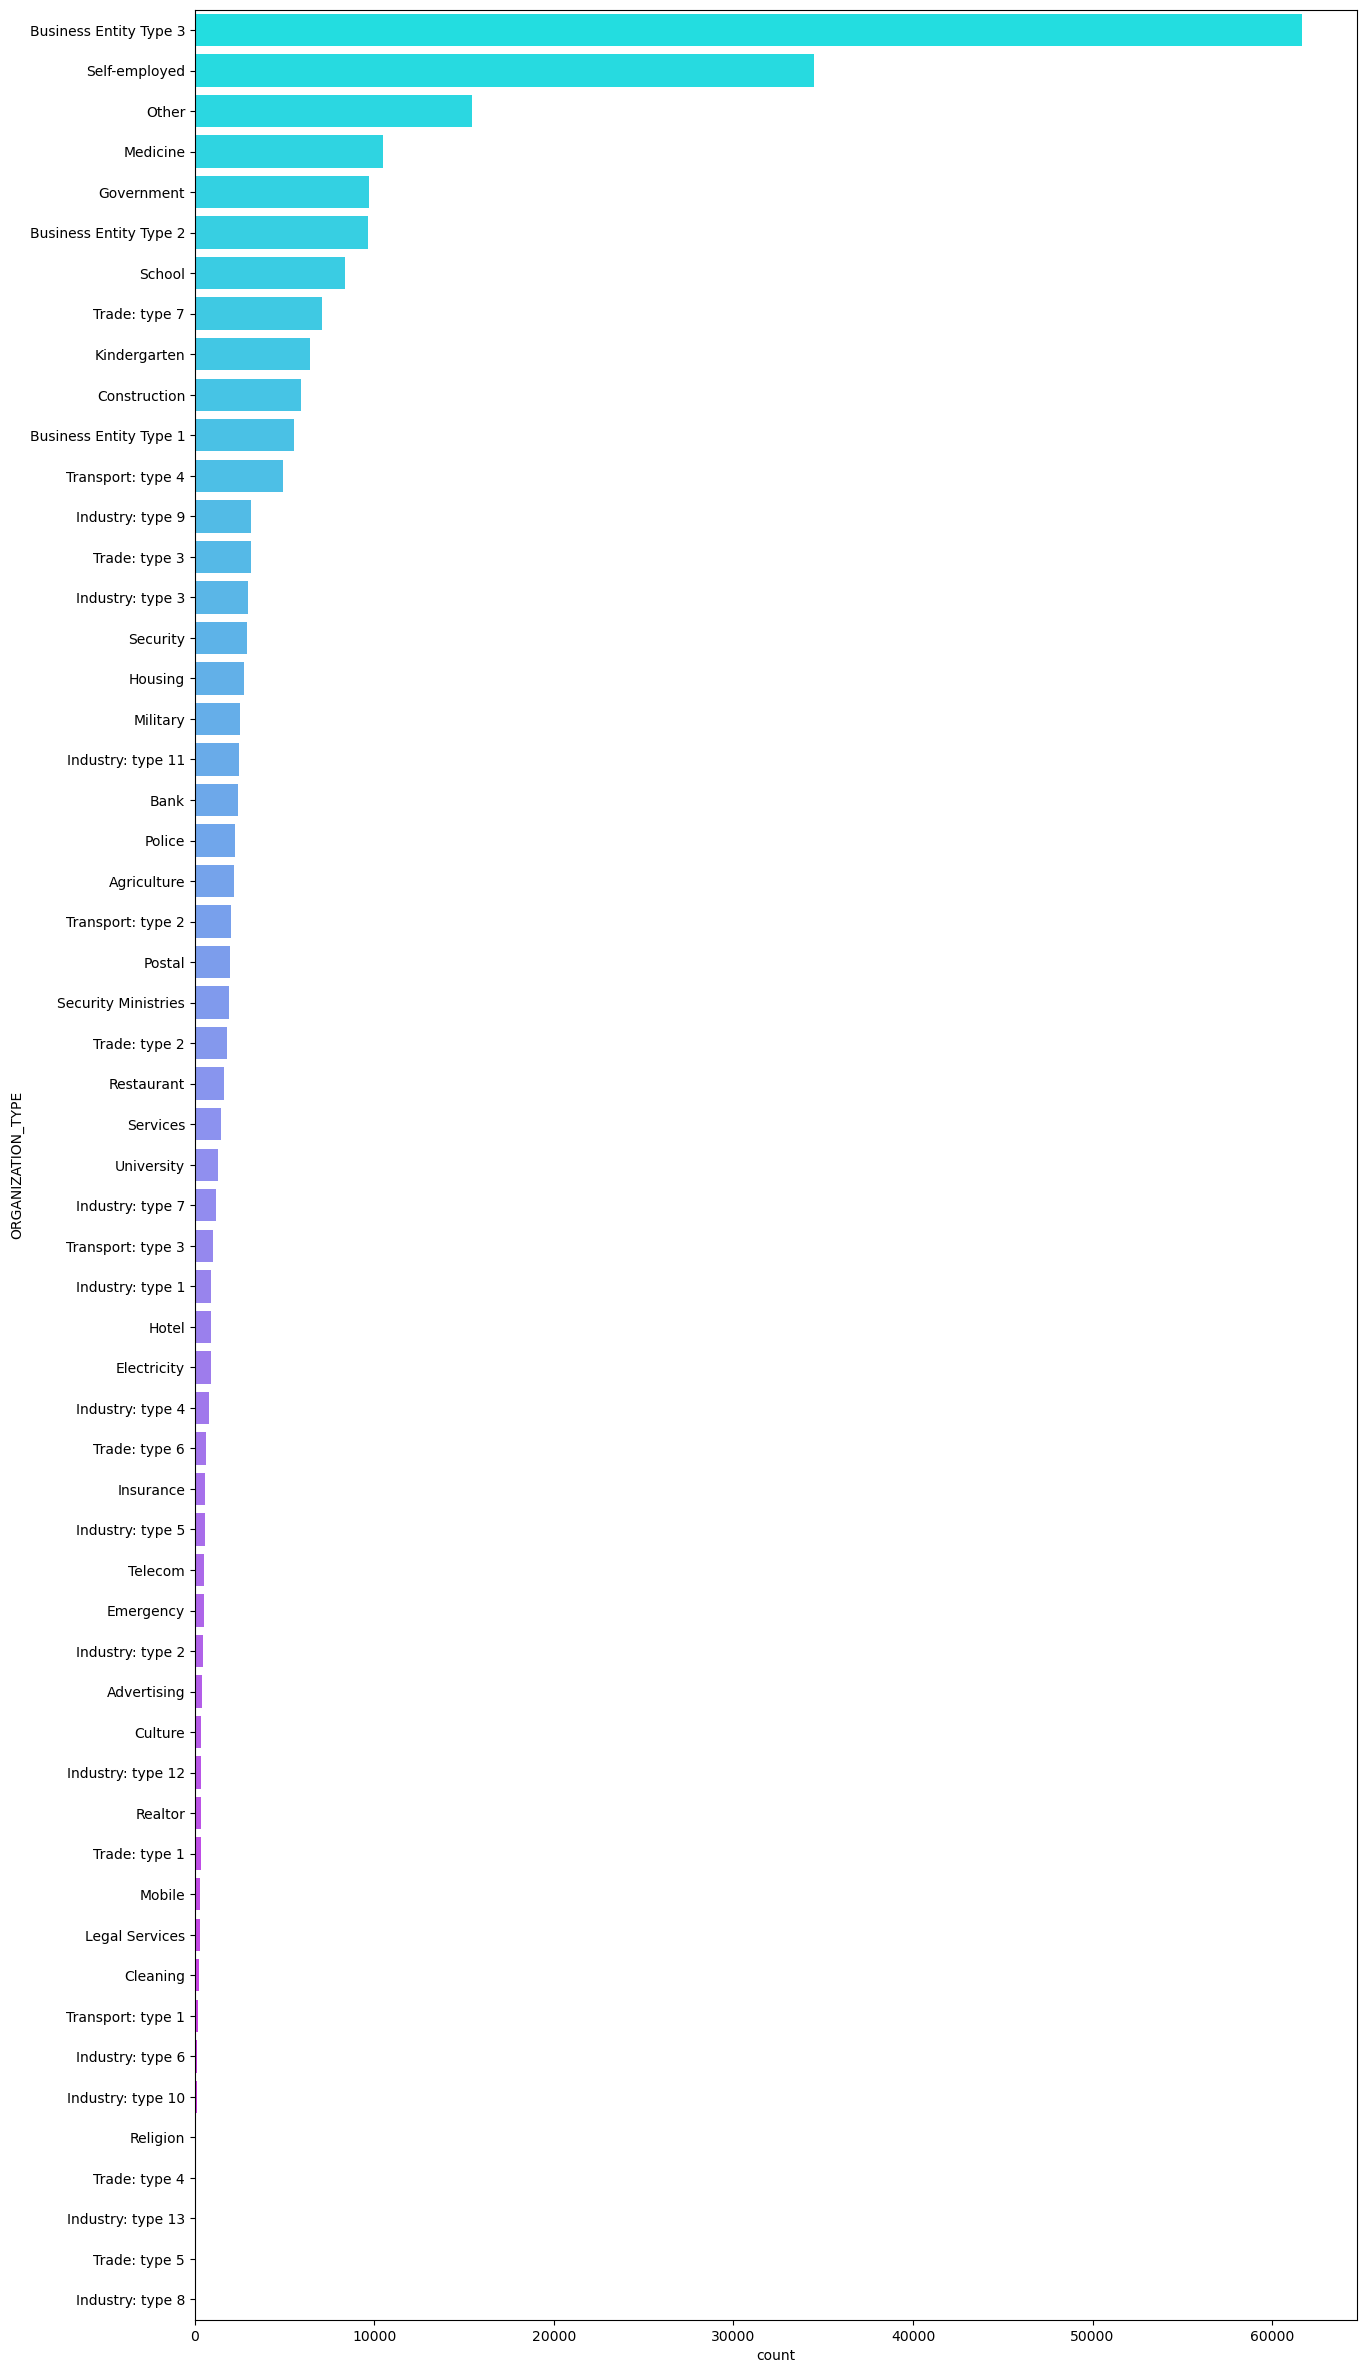

In [139]:
# Creating a count plot to visualize the distribution of organization types ('ORGANIZATION_TYPE') among non-defaulters (TARGET = 0), ordered by frequency and colored with a cool palette.
plt.figure(figsize=(15,30))

sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')


The horizontal bar chart is showing the frequency distribution of different organization types among non-defaulters (TARGET = 0), ordered by frequency and displayed with

<Axes: xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

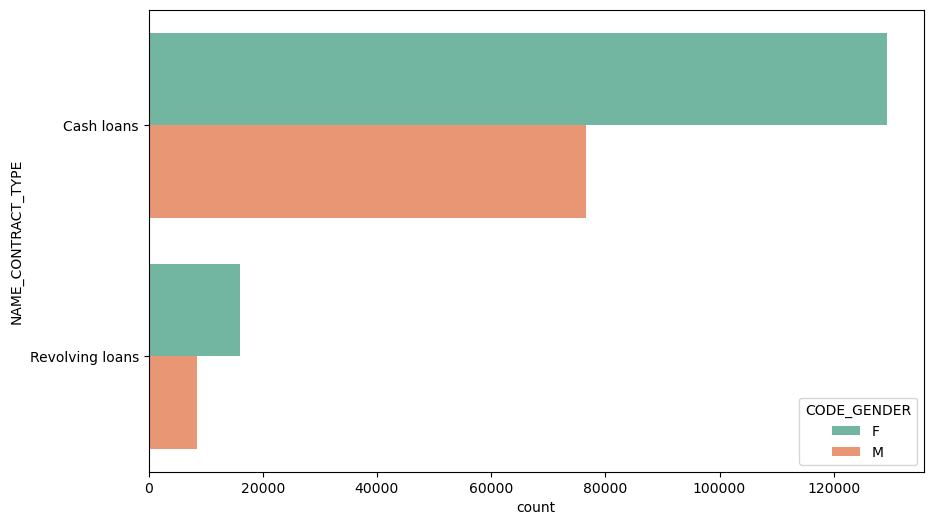

In [141]:
# Visualizing the distribution of contract types (NAME_CONTRACT_TYPE) among non-defaulters (TARGET = 0), segmented by gender (CODE_GENDER), using the 'Set2' color palette for clarity.
plt.figure(figsize=(10,6))
sns.countplot(data=target_0, y='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

The horizontal bar chart is showing the frequency distribution of different organization types among non-defaulters (TARGET = 0), ordered by frequency and displayed with

### <font color=red>3.a.1) Univariate Analysis for non-defaulters (TARGET = 0.<font>

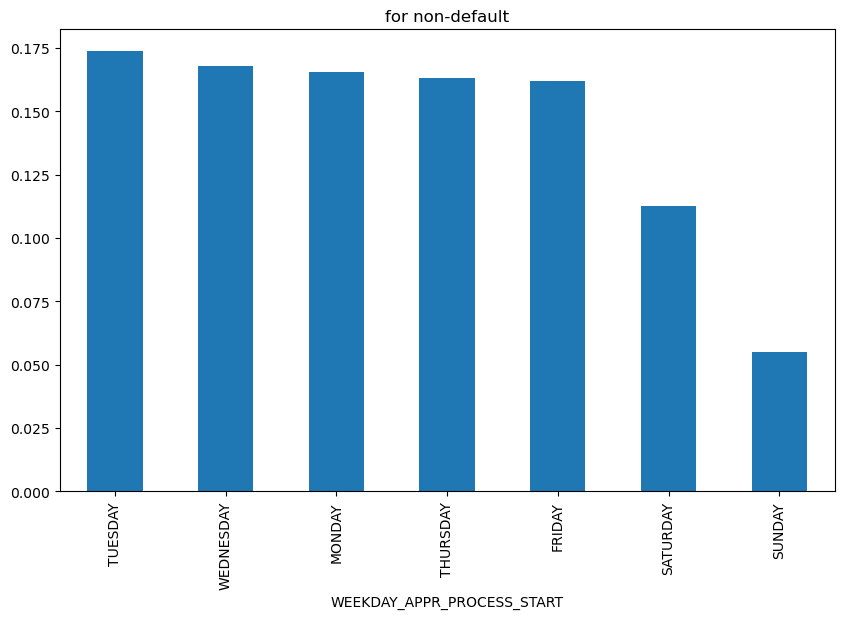

In [144]:
# Univariate analysis of the WEEKDAY_APPR_PROCESS_START categorical variable for non-defaulters (TARGET = 0), showing the normalized (relative) frequency distribution of the days when the application process started.
plt.figure(figsize=(10,6))
target_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

We can see from the graph that Saturday and Sunday tend to have fewer application launching processes.

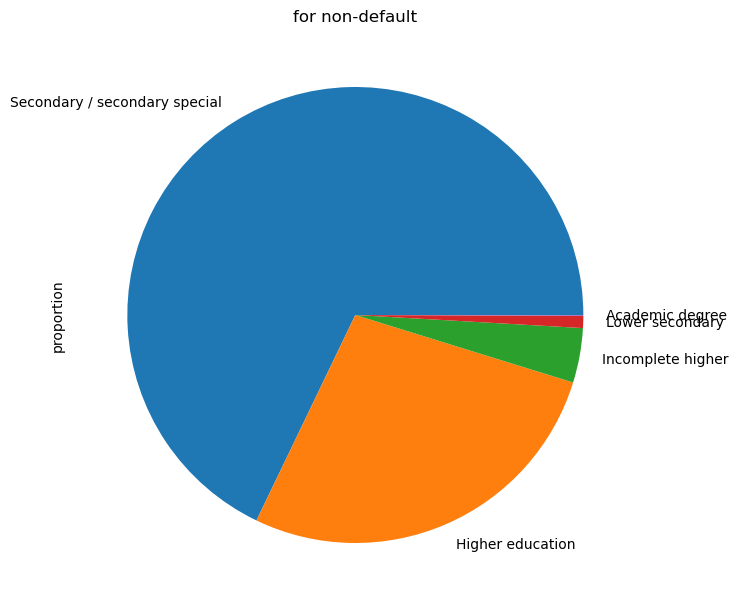

In [146]:
# Univariate analysis of the NAME_EDUCATION_TYPE categorical variable for non-defaulters (TARGET = 0), visualized as a pie chart showing the proportion of different education types.
plt.figure(figsize=(10,6))
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()

We can see from the **pie chart** plot below that a large proportion of secondary and special education students are requesting loans.

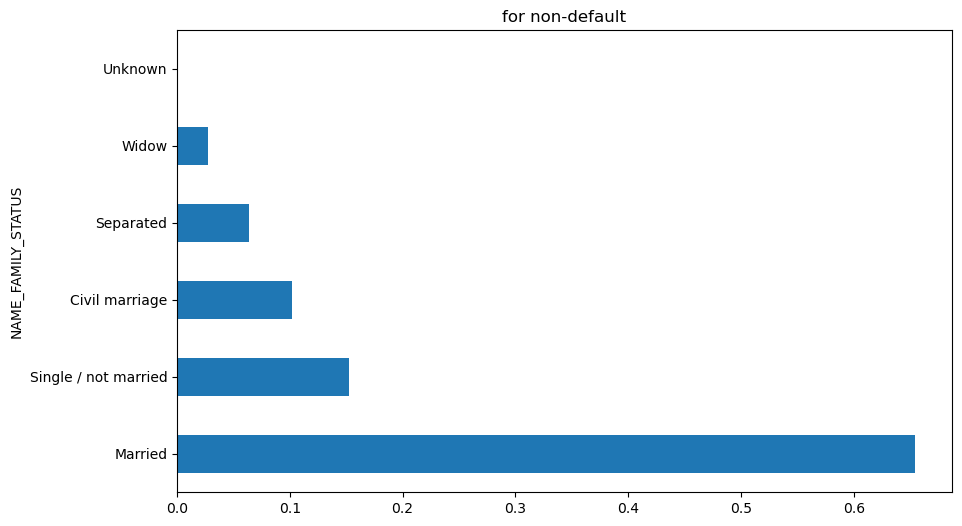

In [148]:
# Creating a horizontal bar chart to visualize the distribution of 'NAME_FAMILY_STATUS' among non-defaulters.
plt.figure(figsize=(10,6))
target_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

We can see from the **horizontal bar graph** that displays In comparison to other categories, we may claim that married persons often take out more loans.

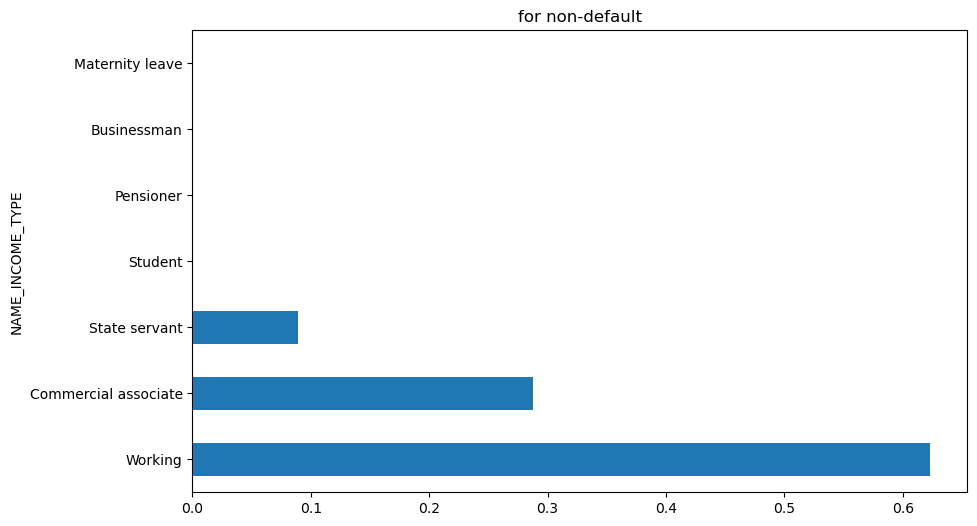

In [150]:
# Creating a horizontal bar chart to visualize the distribution of 'NAME_INCOME_TYPE' among non-defaulters.
plt.figure(figsize=(10,6))
target_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

We can see from the **horizontal bar graph** that  it demonstrates that the majority of defaulters have a working income.

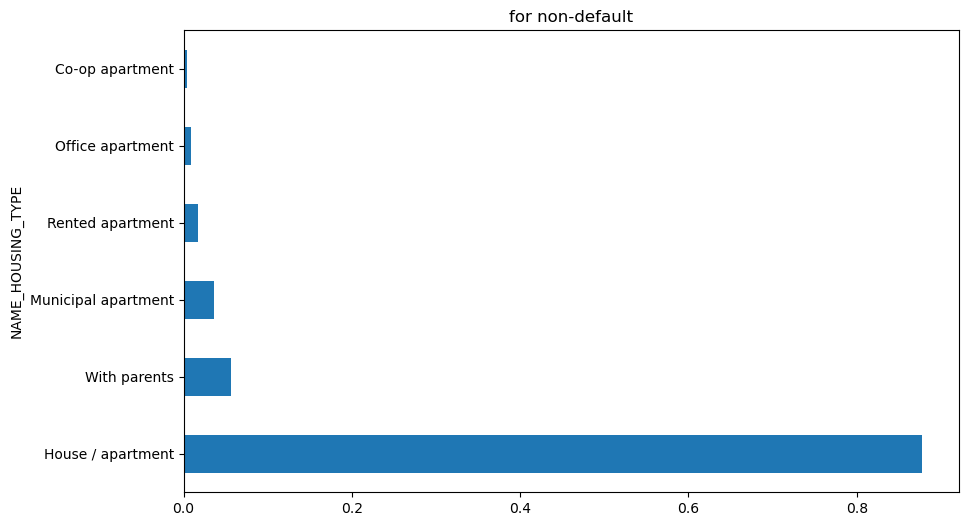

In [152]:
# Creating a horizontal bar chart to visualize the distribution of 'NAME_HOUSING_TYPE' among non-defaulters.
plt.figure(figsize=(10,6))
target_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()

We can see from the **horizontal bar** graph that it demonstrates that there exists people who have own house

In [154]:
data0.shape

(252137, 45)

In [155]:
# Displaying the first few records of defaulters (TARGET = 1) to inspect the data for further analysis.
target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
94      100112       1         Cash loans           M             0   

    AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         202,500.00   406,597.50    24,700.50       351,000.00   
26        112,500.00   979,992.00    27,076.50       702,000.00   
40        202,500.00 1,193,580.00    35,028.00       855,000.00   
42        135,000.00   288,873.00    16,258.50       238,500.00   
94        315,000.00   953,460.00    64,107.00       900,000.00   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
94          Family  Commercial associate              Incomplete higher   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                        0.02   
26                 Widow  House / apartment                        0.02   
40               Married  House / apartment                        0.03   
42        Civil marriage  House / apartment                        0.01   
94  Single / not married       With parents                        0.03   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         9461            637               3648             2120   
26       18724           2628               6573             1827   
40       17482           1262               1182             1029   
42       13384           3597                 45             4409   
94       10199           2015               4802             1038   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                 1                     2                            2   
26                1                     3                            2   
40                2                     2                            2   
42                2                     3                            3   
94                1                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
94                     SUNDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
94                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
94                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                 

       AMT_INCOME_TOTAL     TARGET
count        252,137.00 252,137.00
mean         175,914.07       0.09
std          258,851.59       0.28
min           25,650.00       0.00
25%          112,500.00       0.00
50%          157,500.00       0.00
75%          211,500.00       0.00
max      117,000,000.00       1.00


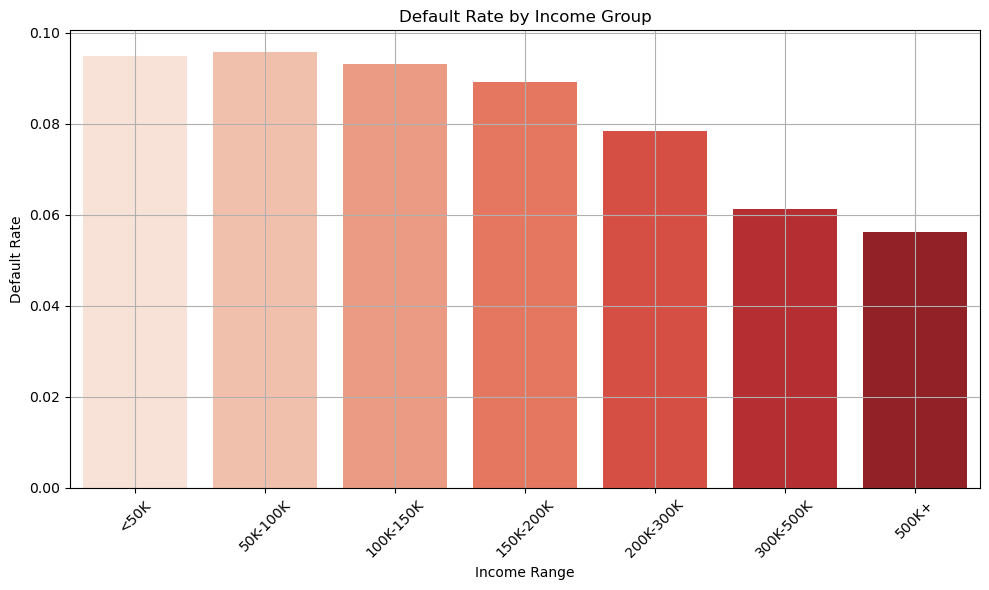

In [233]:
print(data0[['AMT_INCOME_TOTAL', 'TARGET']].describe())

# Optional: create income bins if continuous income is used
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1e10]
income_labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '300K-500K', '500K+']
data0['INCOME_GROUP'] = pd.cut(data0['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Calculate default rate per income group
default_rate = data0.groupby('INCOME_GROUP')['TARGET'].mean().reset_index()

# Plot default rate by income group
plt.figure(figsize=(10,6))
sns.barplot(x='INCOME_GROUP', y='TARGET', data=default_rate, palette='Reds')
plt.title('Default Rate by Income Group')
plt.xlabel('Income Range')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizing the distribution for defaulters (TARGET = 1) using a count plot.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-50000'),
  Text(2, 0, '50000-75000'),
  Text(3, 0, '75000,100000'),
  Text(4, 0, '100000-125000'),
  Text(5, 0, '125000-150000'),
  Text(6, 0, '150000-175000'),
  Text(7, 0, '175000-200000'),
  Text(8, 0, '200000-225000'),
  Text(9, 0, '225000-250000'),
  Text(10, 0, '250000-275000'),
  Text(11, 0, '275000-300000'),
  Text(12, 0, '300000-325000'),
  Text(13, 0, '325000-350000'),
  Text(14, 0, '350000-375000'),
  Text(15, 0, '375000-400000'),
  Text(16, 0, '400000-425000'),
  Text(17, 0, '425000-450000'),
  Text(18, 0, '450000-475000'),
  Text(19, 0, '475000-500000'),
  Text(20, 0, '500000 and above')])

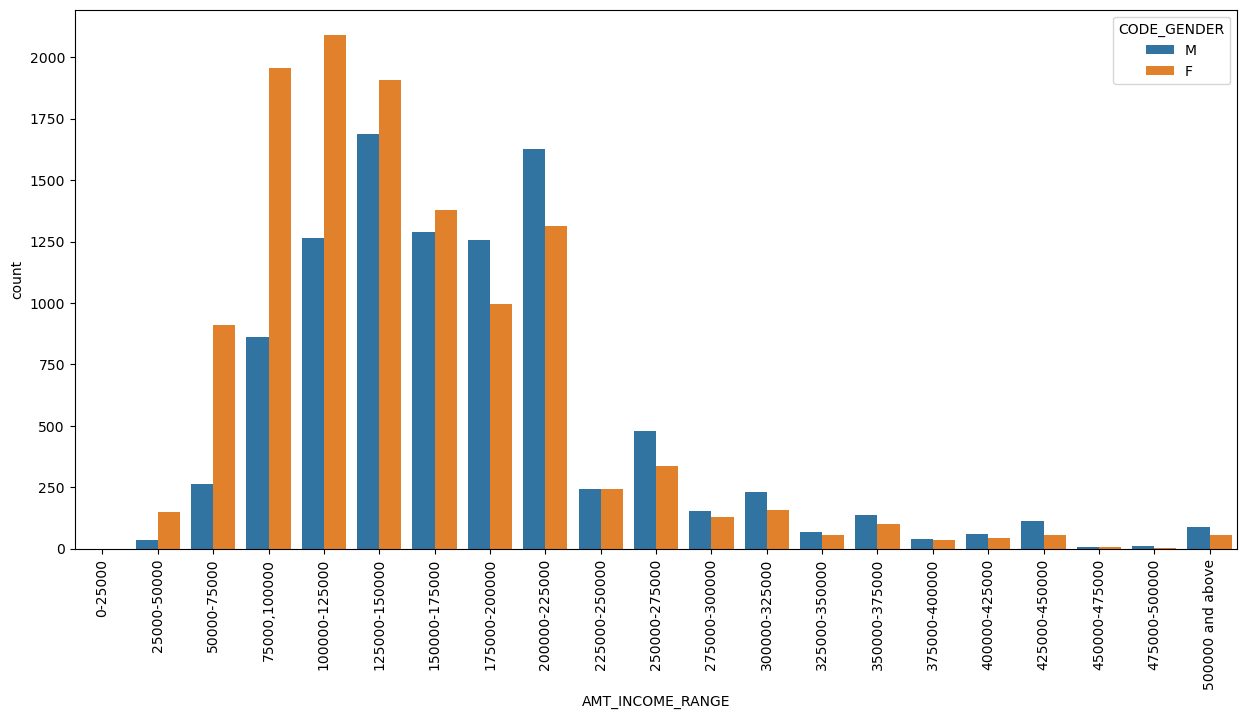

In [157]:
# Visualizing the distribution of income ranges ('AMT_INCOME_RANGE') by gender ('CODE_GENDER') for defaulters (TARGET = 1) using a count plot, with income ranges on the x-axis and gender-based hues.
plt.figure(figsize=(15,7))
sns.countplot(target_1,x="AMT_INCOME_RANGE",hue="CODE_GENDER")
plt.xticks(rotation=90)

The **Count Plot chart** depicts the distribution of income ranges ("AMT_INCOME_RANGE") for defaulters (TARGET=1) categorized by gender ("CODE_GENDER") using a count plot.

([0, 1, 2, 3],
 [Text(0, 0, 'Working'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'State servant'),
  Text(3, 0, 'Maternity leave')])

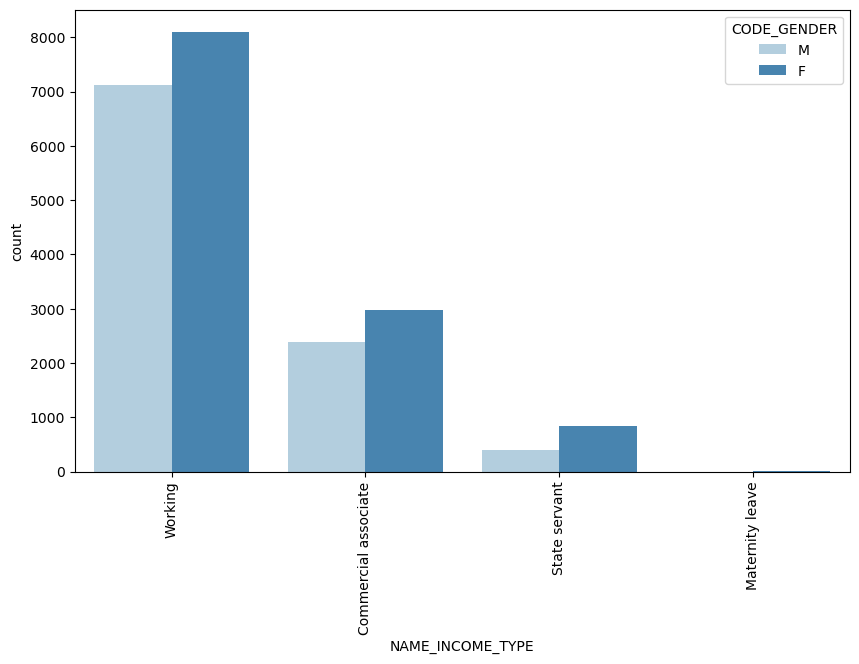

In [159]:
# Visualizing the distribution of income types (NAME_INCOME_TYPE) among defaulters (TARGET = 1), segmented by gender (CODE_GENDER), using the 'Blues' color palette for better clarity.
plt.figure(figsize=(10,6))
sns.countplot(target_1,x="NAME_INCOME_TYPE",hue="CODE_GENDER",palette="Blues")
plt.xticks(rotation=90)

The **Count Plot chart** depicts the distribution of income Types ("NAME_INCOME_TYPE") for defaulters (TARGET=1) categorized by gender ("CODE_GENDER") using a count plot.

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

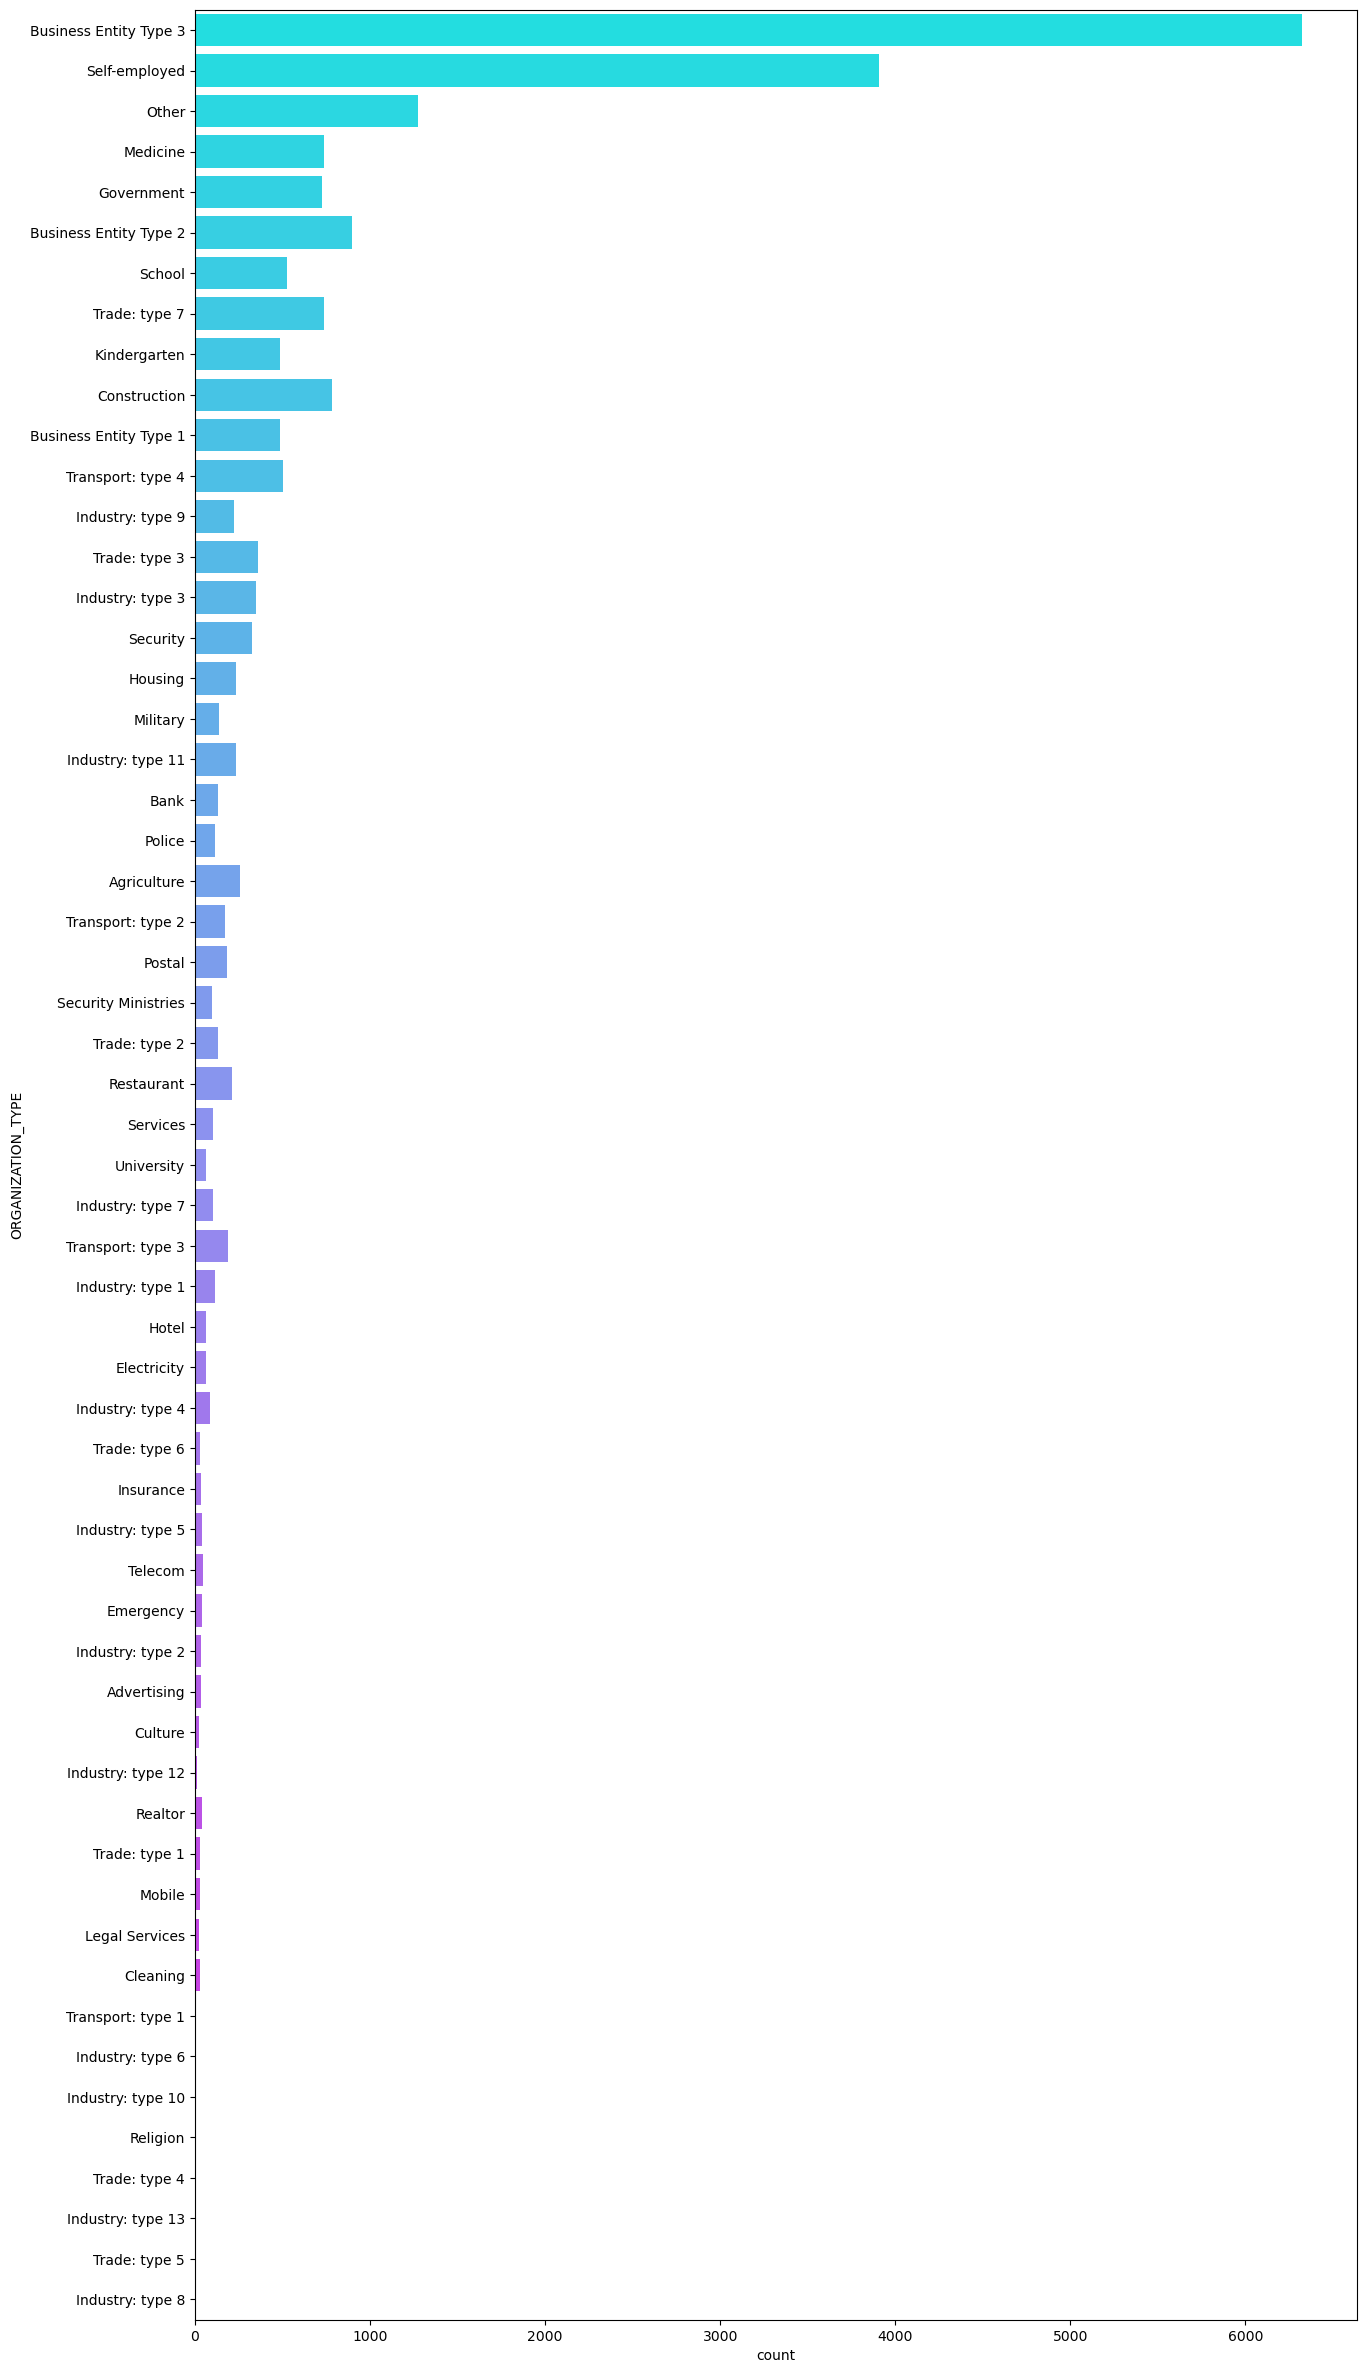

In [161]:
# Creating a count plot to visualize the distribution of organization types ('ORGANIZATION_TYPE') among defaulters (TARGET = 1), ordered by frequency from non-defaulters, and colored using a cool palette.
plt.figure(figsize=[15, 30])

sns.countplot(data=target_1, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')


The **Count Plot chart** depicts the distribution of income ranges ("AMT_INCOME_RANGE") for defaulters (TARGET=1) categorized by gender ("CODE_GENDER") using a count plot.

### <font color=red>3.a.1) Univariate Analysis for defaulters (TARGET = 1).<font>

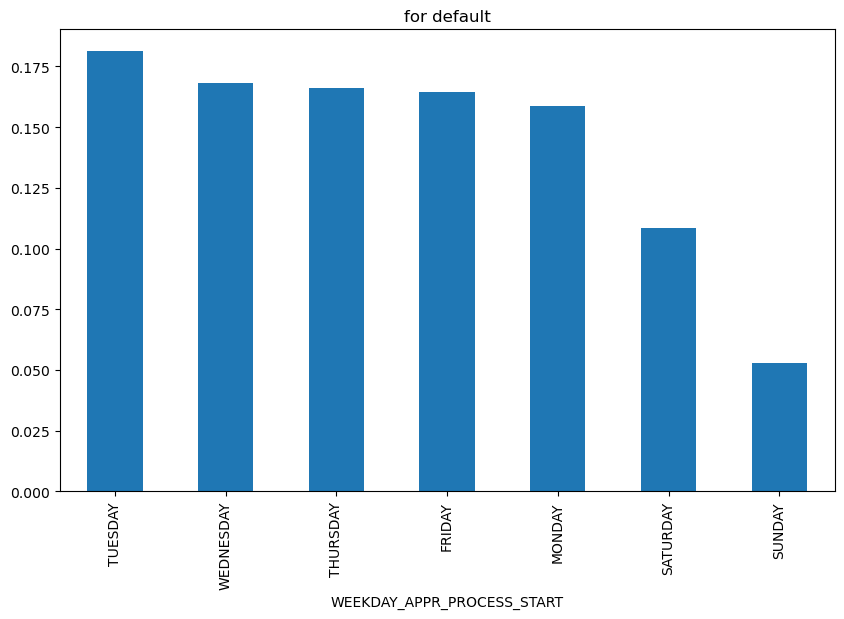

In [164]:
# Univariate analysis of the WEEKDAY_APPR_PROCESS_START categorical variable for defaulters (TARGET = 1), showing the normalized (relative) frequency distribution of the days when the application process started.
plt.figure(figsize=(10,6))
target_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()
# from the graph we can conclude that application starting processes are generally less in saturday and sunday.

We can see from the graph that Saturday and Sunday tend to have fewer application launching processes.

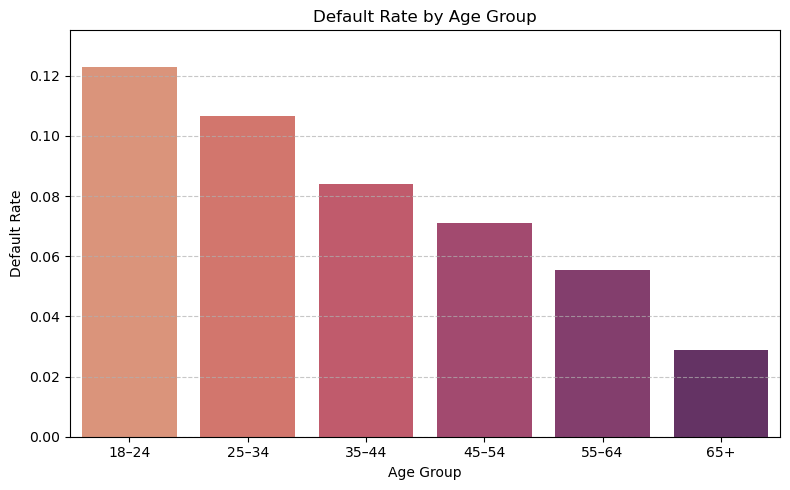

In [235]:
data0["AGE_YEARS"] = (data0["DAYS_BIRTH"].abs() / 365).astype(int)

# 2) Define age bins and labels
age_bins   = [18, 25, 35, 45, 55, 65, 100]
age_labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

data0["AGE_GROUP"] = pd.cut(data0["AGE_YEARS"], bins=age_bins, labels=age_labels, right=False)

# 3) Compute default rate per age group
age_default = data0.groupby("AGE_GROUP")["TARGET"].mean().reset_index()

# 4) Plot default rate by age group
plt.figure(figsize=(8,5))
sns.barplot(x="AGE_GROUP", y="TARGET", data=age_default, palette="flare")
plt.title("Default Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Default Rate")
plt.ylim(0, age_default["TARGET"].max() * 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

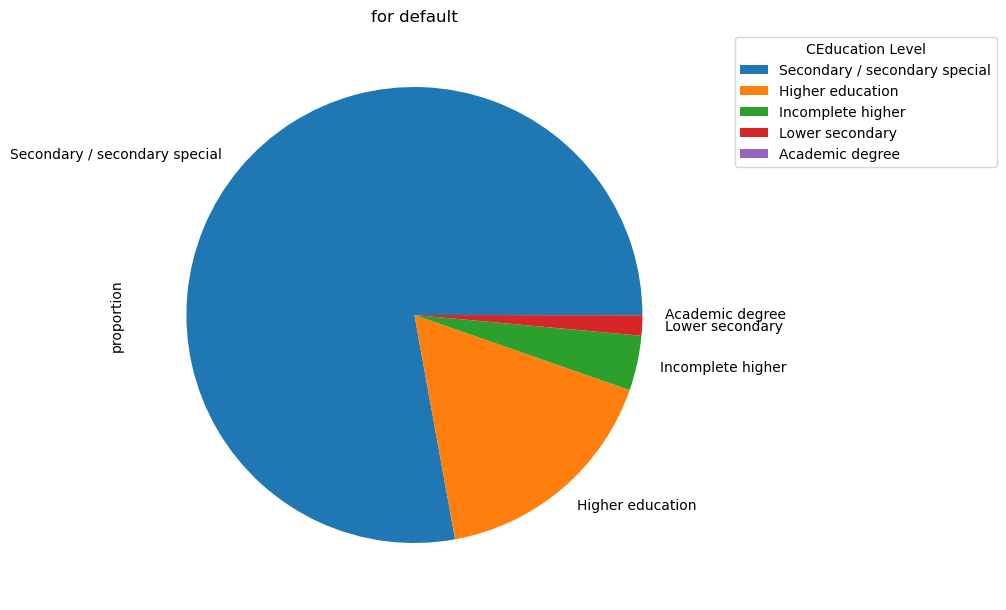

In [452]:
# pie chart shows that defaulters mainly have 'Higher education' or 'Secondary education', suggesting that education level may not be a significant factor in default behavior.
plt.figure(figsize=(10,6))
target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.legend(title="CEducation Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('for default')
plt.show()

We can see from the **pie chart** plot below that a large proportion of secondary and special education students are requesting loans.

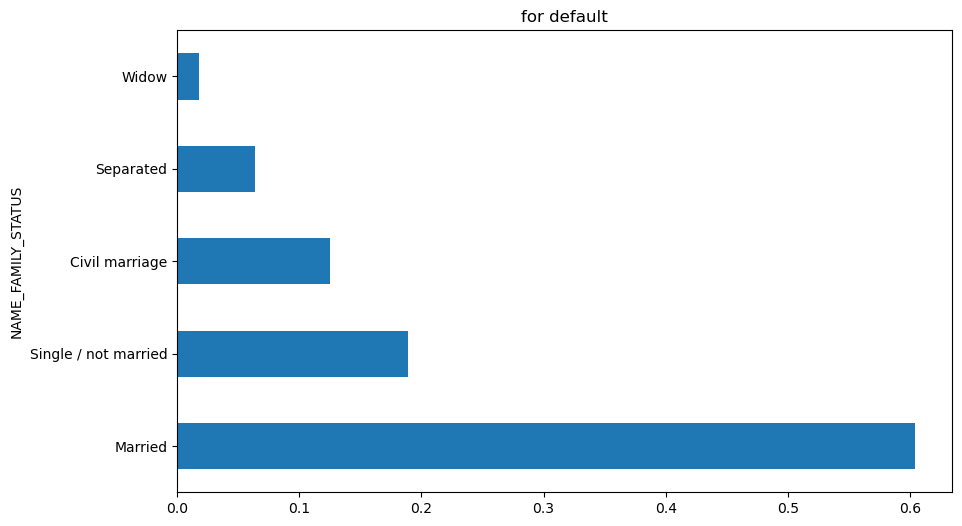

In [168]:
# Creating a horizontal bar chart to visualize the distribution of 'NAME_FAMILY_STATUS' among defaulters.
plt.figure(figsize=(10,6))
target_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

We can see from the **horizontal bar graph** that displays In comparison to other categories, we may claim that married persons often take out more loans.

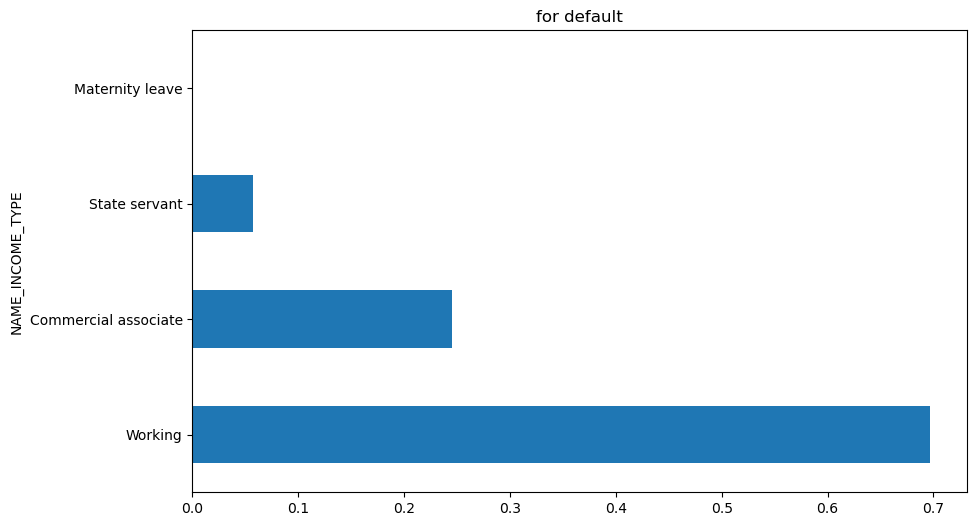

In [170]:
# Plotting a horizontal bar chart to show the relative distribution of 'NAME_INCOME_TYPE' among defaulters.
plt.figure(figsize=(10,6))
target_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

We can see from the **horizontal bar graph** that displays In comparison to other categories, we may claim that majority of defaulters income type is working.

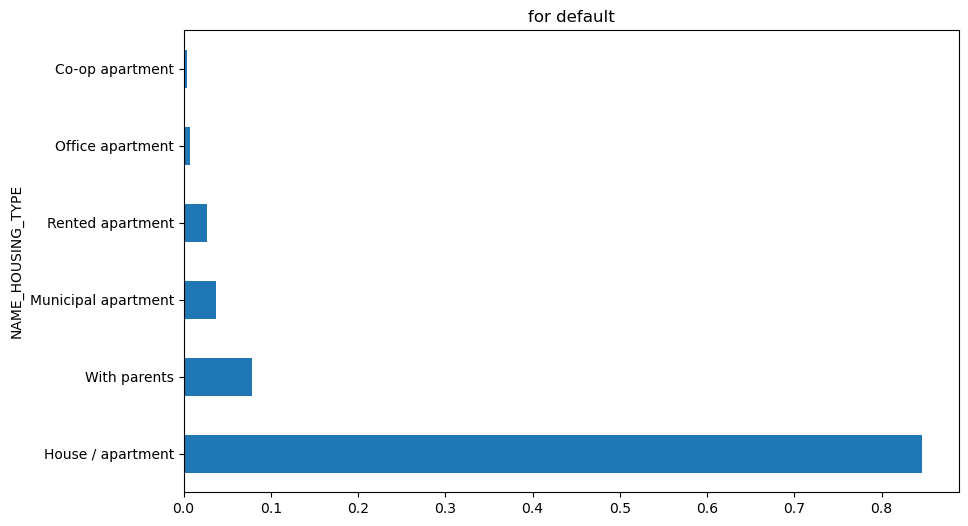

In [172]:
# Plotting a horizontal bar chart to visualize the normalized distribution of 'NAME_HOUSING_TYPE' for defaulters.
plt.figure(figsize=(10,6))
target_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

We can see from the **horizontal bar graph** that displays In comparison to other categories, we may claim that there exists people who have own house.

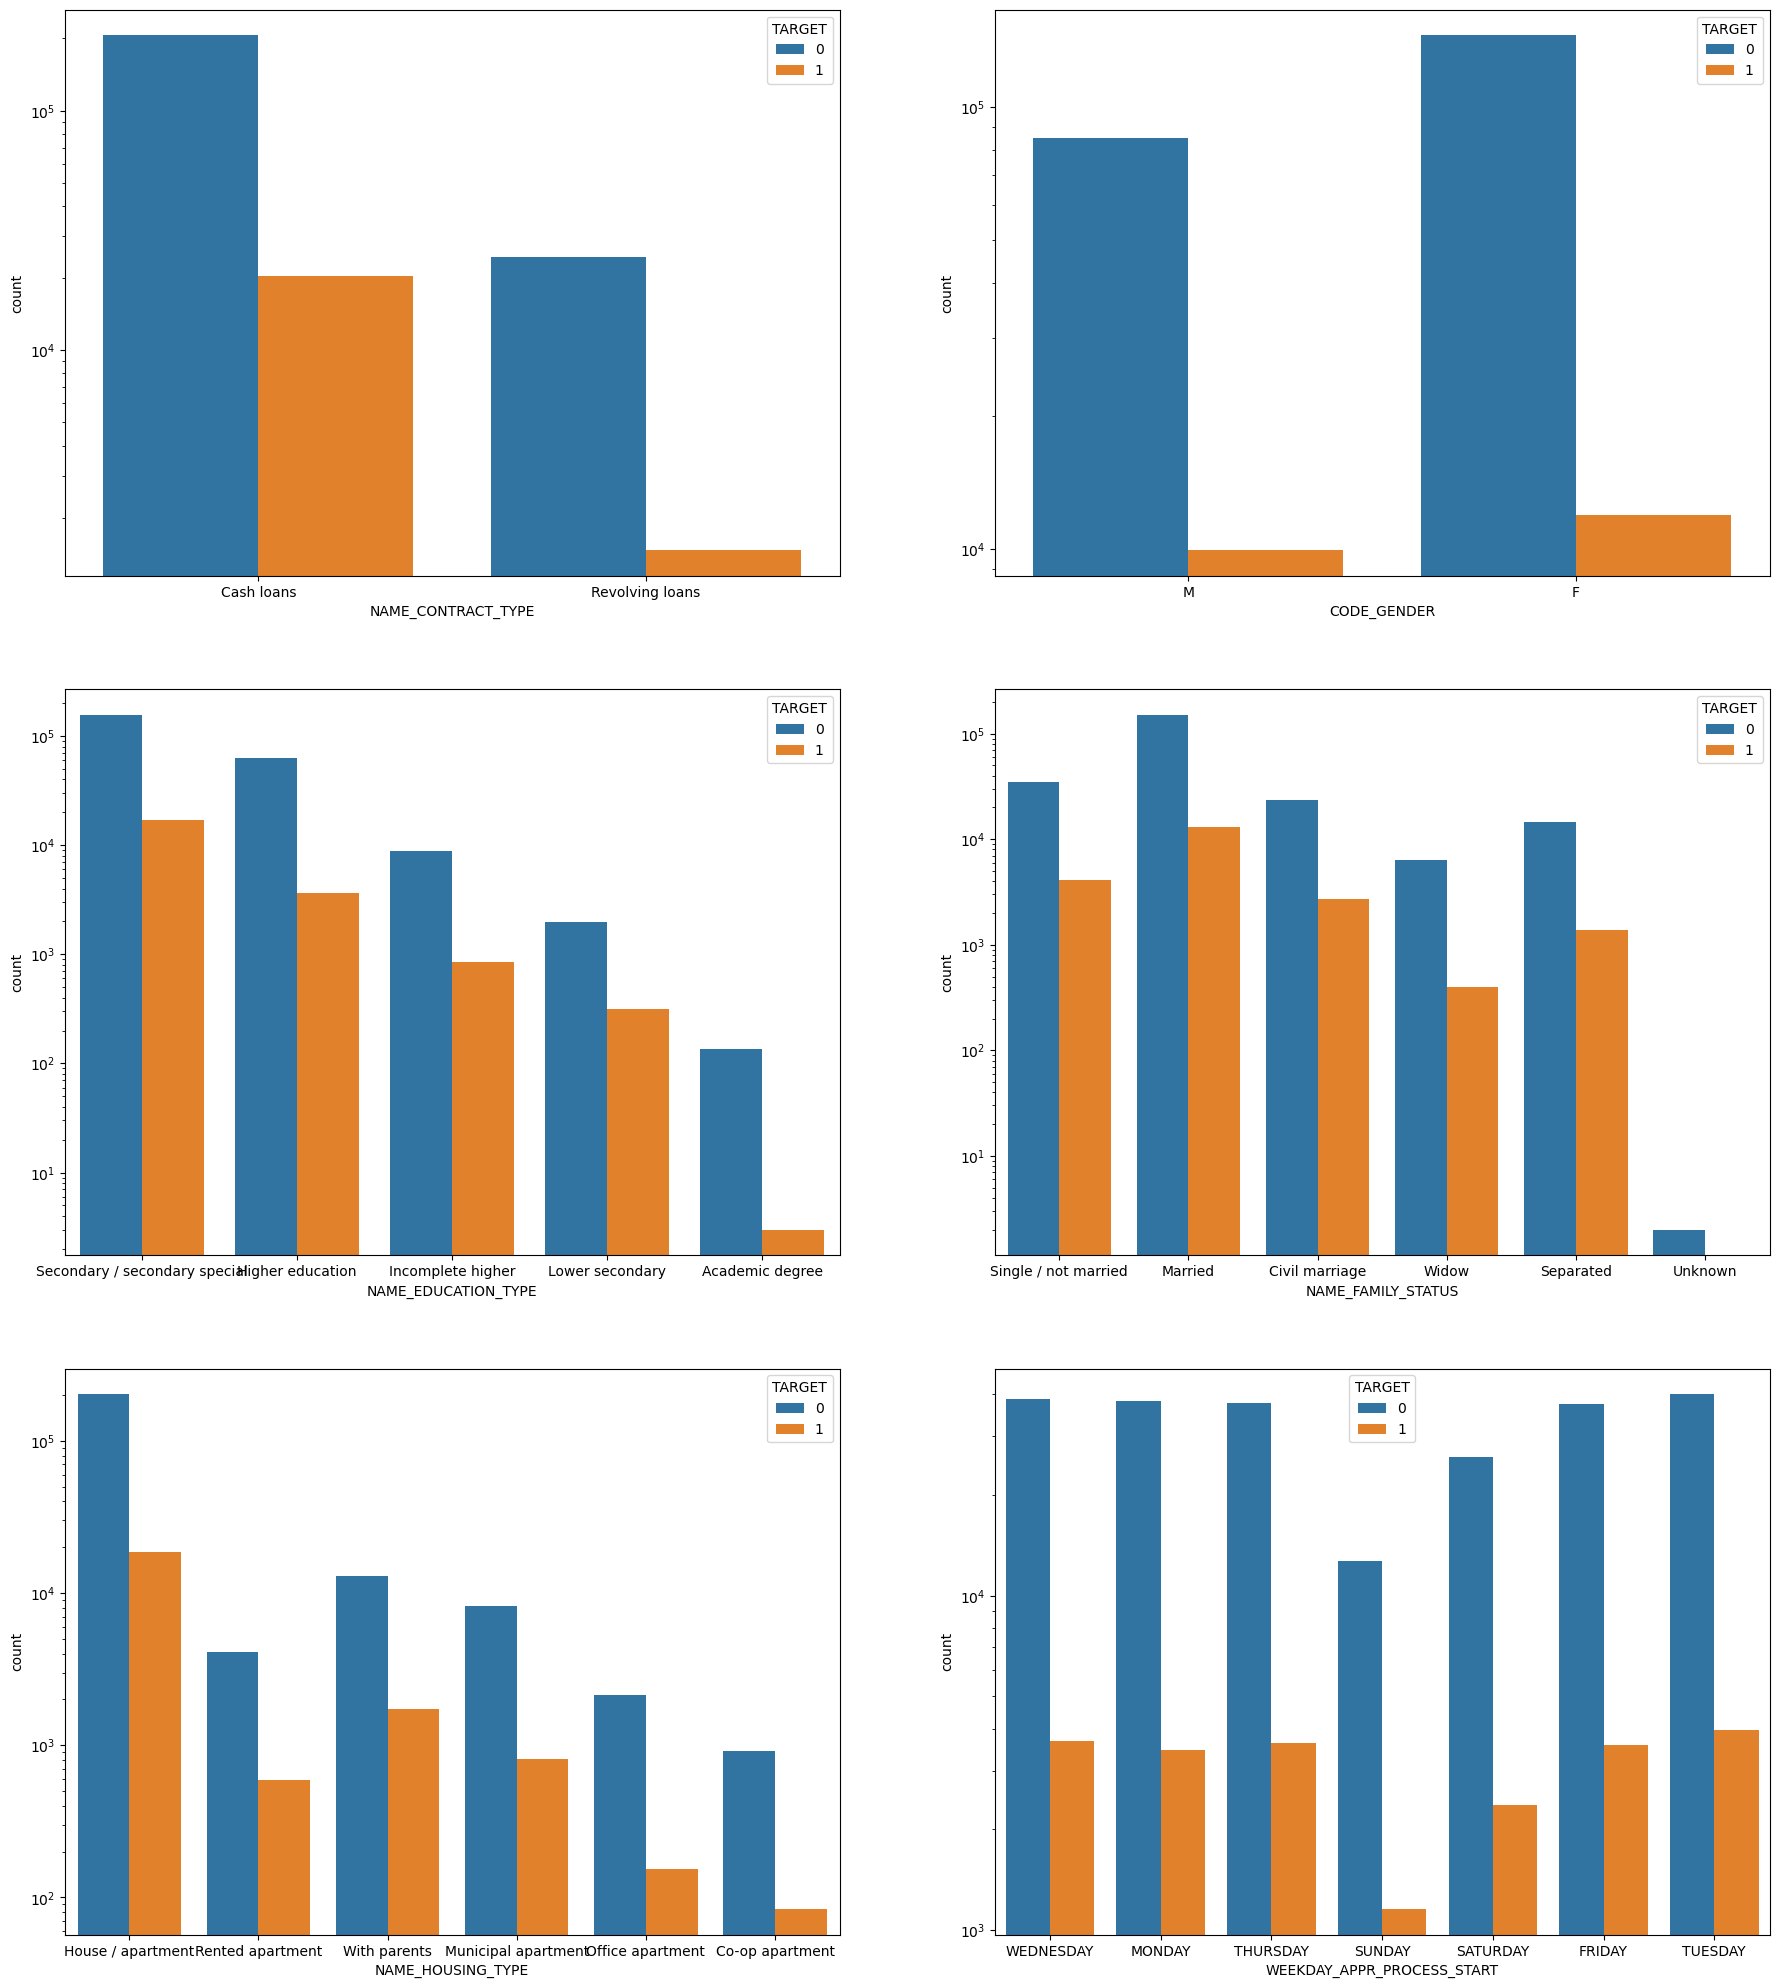

In [174]:
# Plotting count plots for 6 selected categorical columns against 'TARGET' to analyze the relationship between categories and loan default status.
# Each subplot compares the distribution of categories for defaulters (TARGET=1) and non-defaulters (TARGET=0).
# Using logarithmic scale on the y-axis for better visualization of significant differences across categories.

categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=data0)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

As we can see from graphs
-  People tend to take more cash loans, and default percentage of revolving loans is less.
-  Female tends to take more loans.
-  we can conclude that secondary/special educated people are applying loans in high in number
-  We can say more married people tend to take more Loan as compaired to other categories
-  People with house or appartment tend to take more loans
-  Saturday and sunday are less busy for bank in terms of loan applications

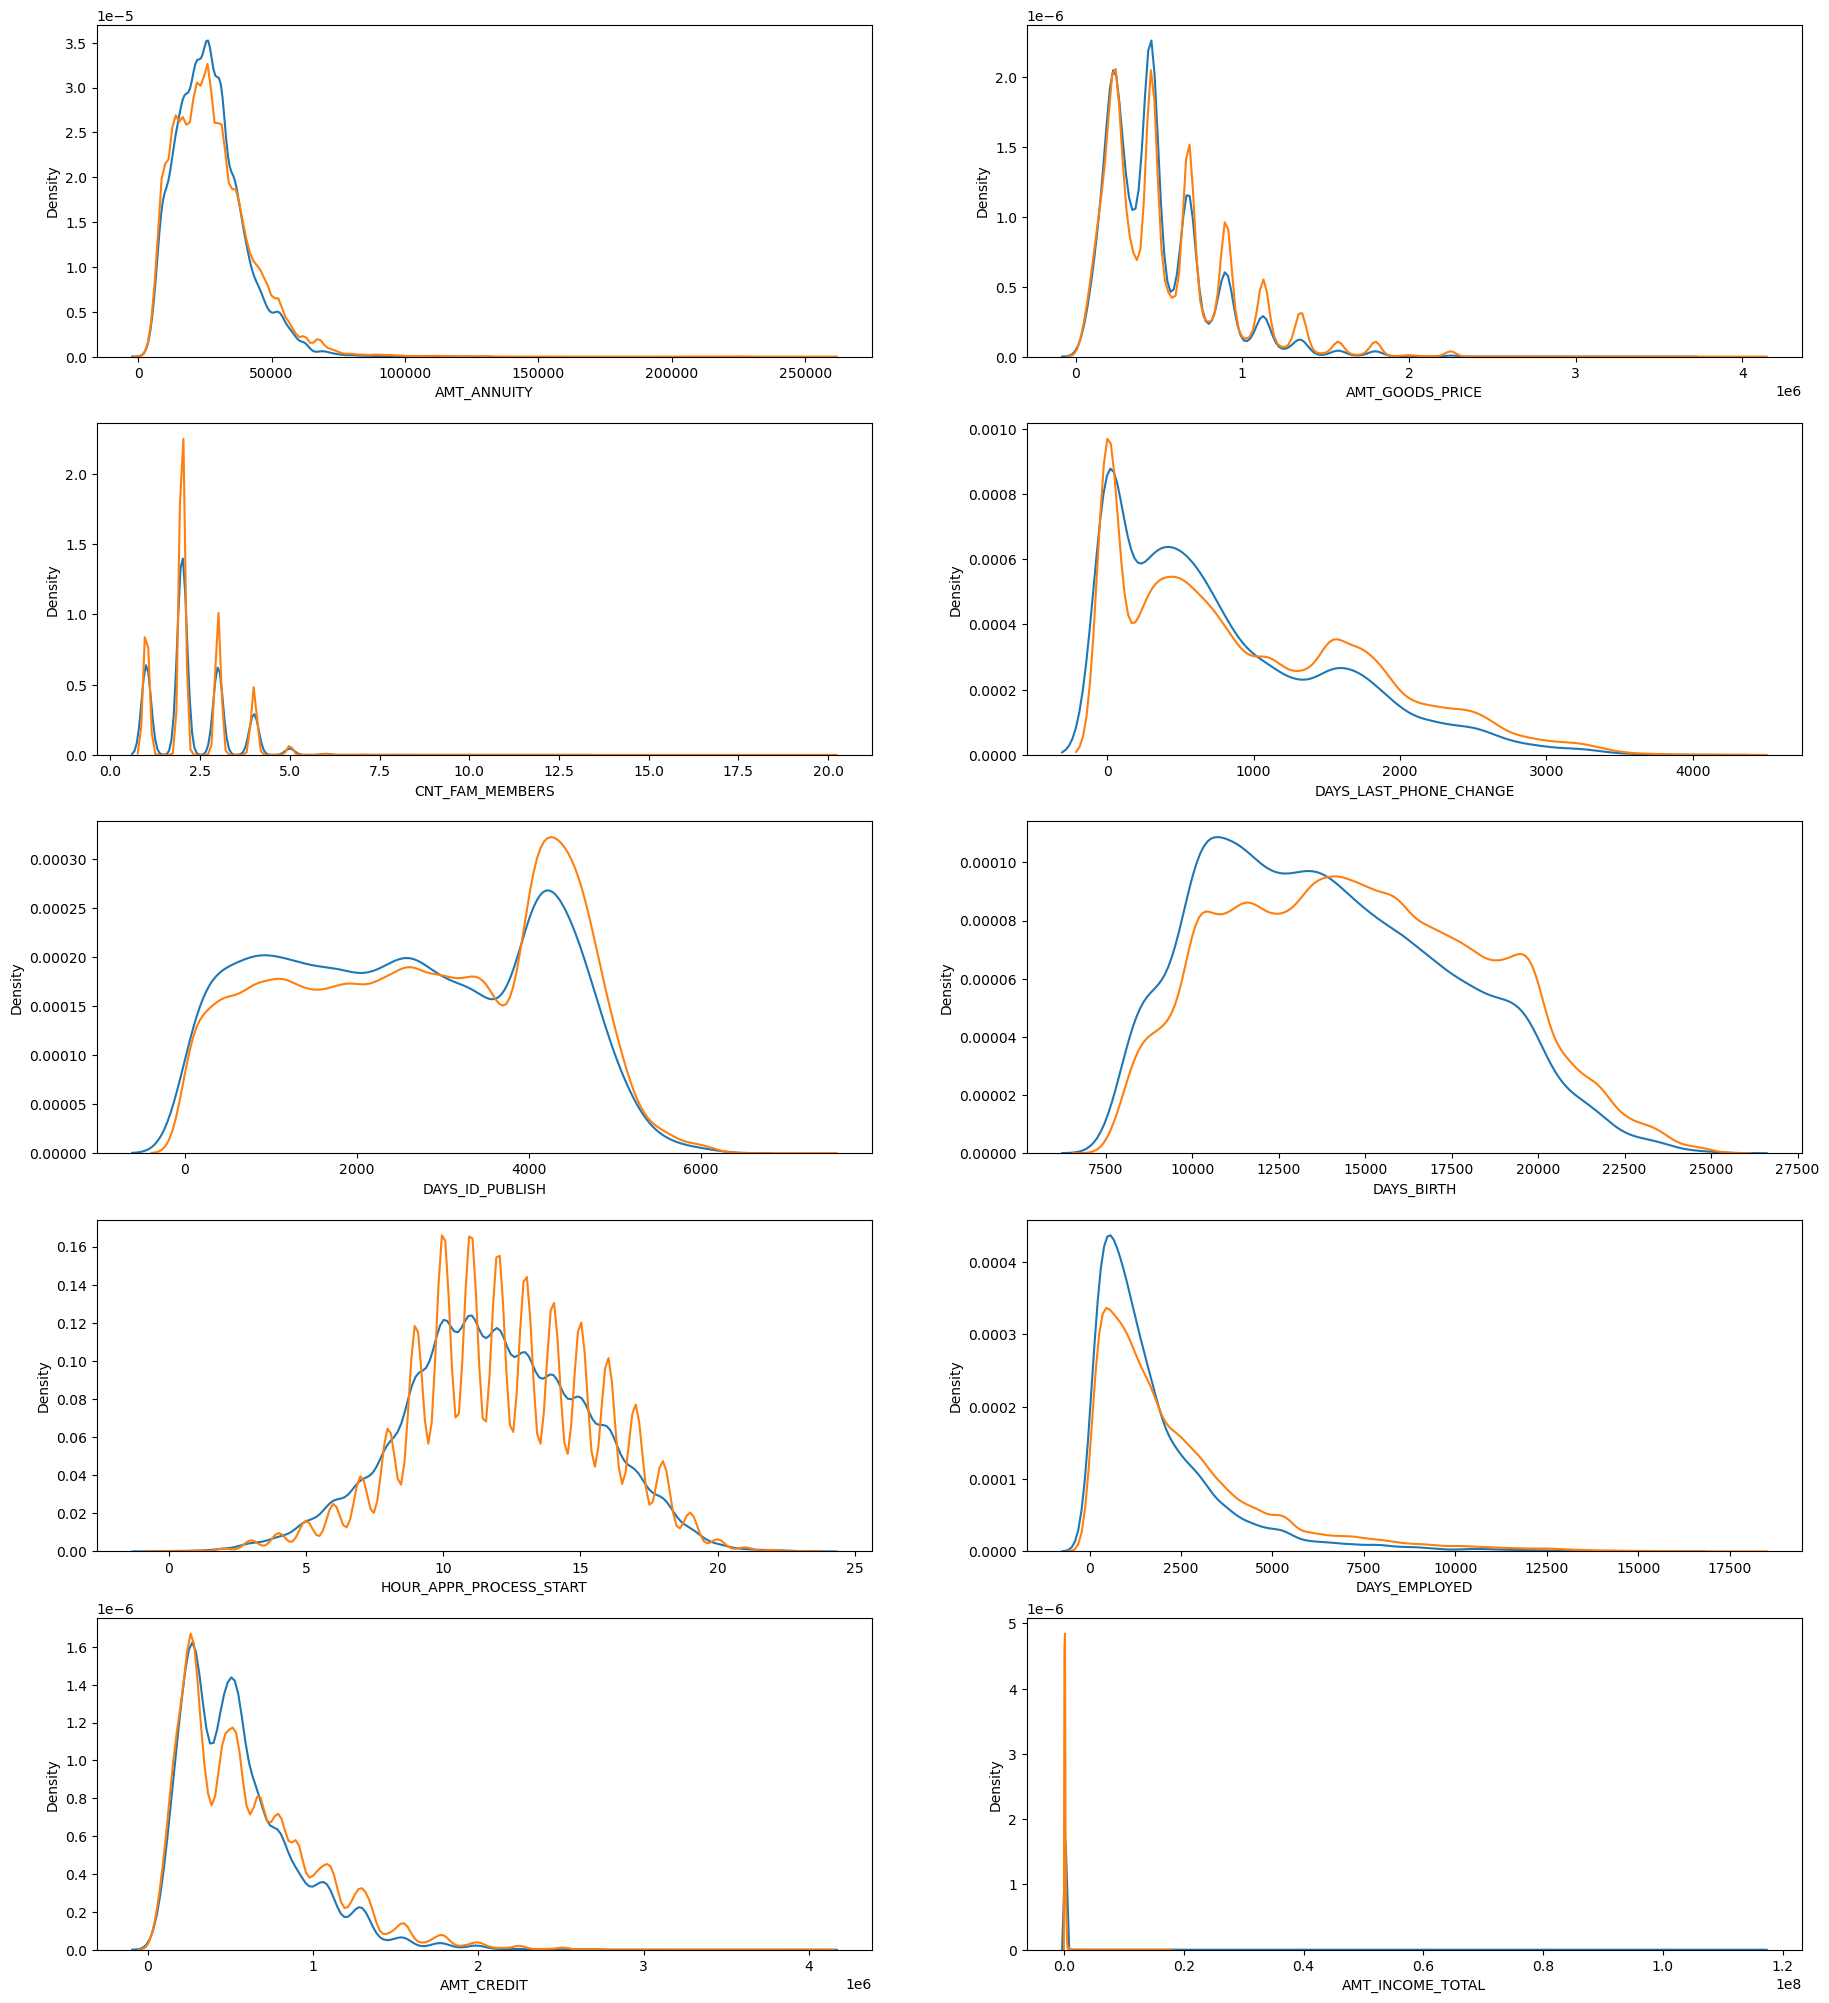

In [176]:
# Plotting kernel density estimates (KDE) for 10 continuous numerical columns to compare their distributions 
# between defaulters (TARGET=1) and non-defaulters (TARGET=0).
# Separate KDE plots for each variable, visualizing the differences in trends and overlapping distributions.
# The plots provide insights into how each feature's distribution aligns with loan default status.

continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(target_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(target_0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()  

As we can see from graphs

The likelihood of default is higher for those with lower total incomes.
New hires are more likely to take out loans.

Retired people typically take out more loans.

Individuals who have an ID that was published between 4,000 and 5,000 days ago are more likely to take out loans.

A nuclear family is more likely to borrow money for fewer items. 
quantity of loans that people take out
Numerous loans with a modest quantity of annuity


### <font color=red>3.b) Bivariate Analysis <font> 

-  Generating a crosstab between 'TARGET' and 'NAME_CONTRACT_TYPE' to analyze the distribution of contract types for defaulters (TARGET=1) and non-defaulters (TARGET=0).
-  The bar plot shows the comparison of the number of cash loans and other contract types across the two target categories.
-  The high number of cash loans suggests a possible correlation with loan default behavior.


NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       205853            24449
1                        20371             1464


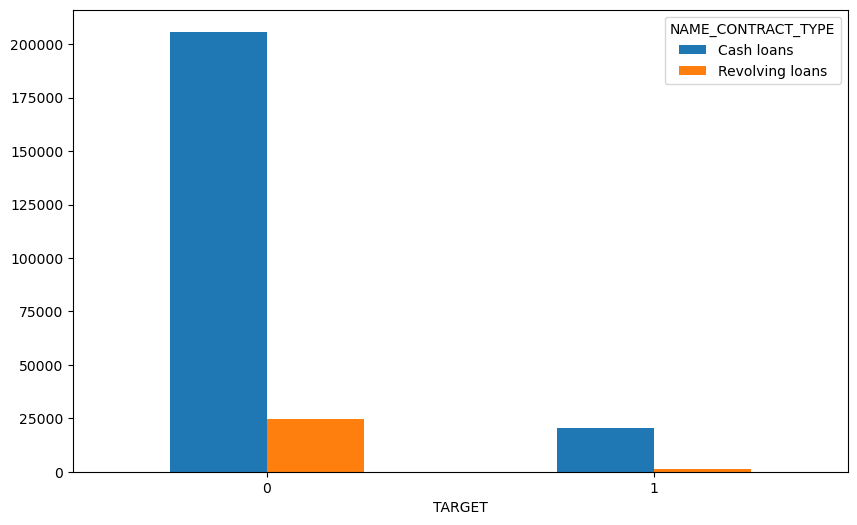

In [180]:
tab0= pd.crosstab(index=data0['TARGET'],columns=data0['NAME_CONTRACT_TYPE'])
print(tab0)
tab0.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()
# High number of cash loans

-  Creating a crosstab between 'TARGET' (default or non-default) and 'CODE_GENDER' (gender) to examine the gender distribution among defaulters and non-defaulters.
-  The bar plot visualizes the gender breakdown of defaulters (TARGET=1) and non-defaulters (TARGET=0), with females taking more loans on average.


CODE_GENDER       F      M
TARGET                    
0            145260  85042
1             11921   9914


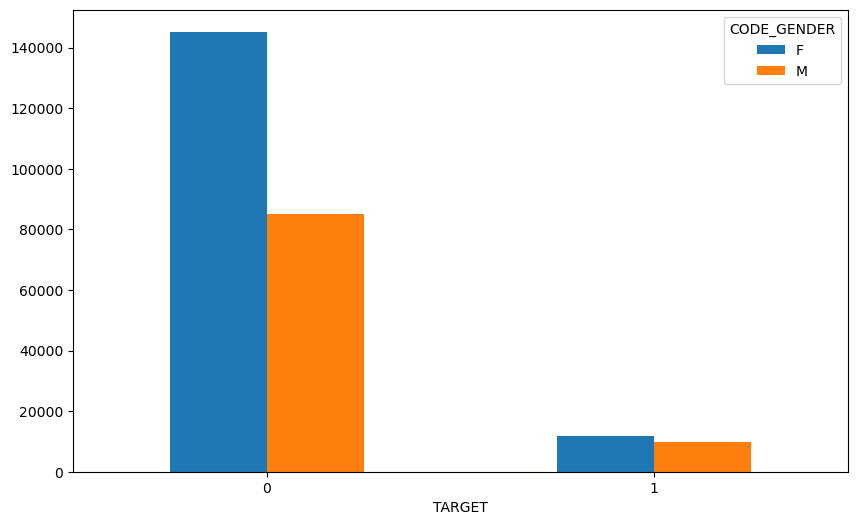

In [182]:
tab1= pd.crosstab(index=data0['TARGET'],columns=data0['CODE_GENDER'])
print(tab1)
tab1.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()
#Females take more loans

-  Creating a crosstab between 'TARGET' (default or non-default) and 'NAME_TYPE_SUITE' (suite type) to analyze the presence of companions when taking a loan.
-  The bar plot shows that most individuals take out loans alone, indicating that loan applicants generally do not have company during the application process.


NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    2081   29140              194      693     1318   
1                     169    2519               22       69      155   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                           8857         188019  
1                            806          18095  


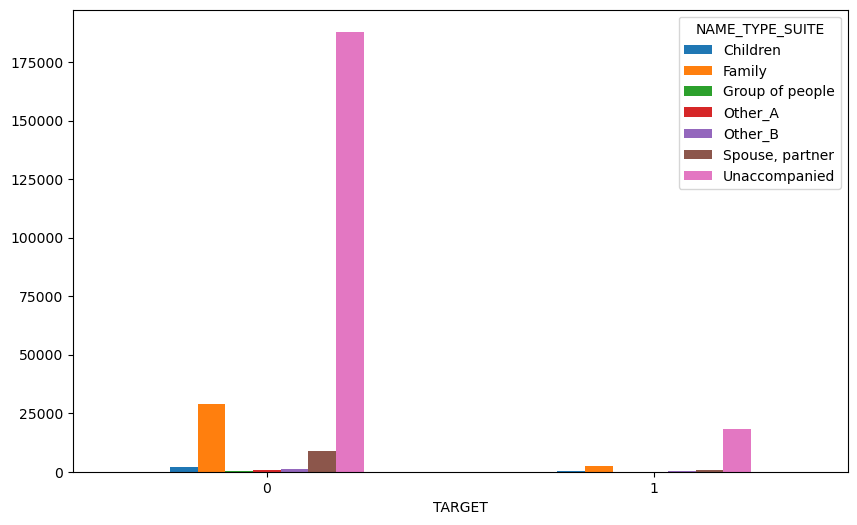

In [184]:
tab2= pd.crosstab(index=data0['TARGET'],columns=data0['NAME_TYPE_SUITE'])
print(tab2)
tab2.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()
# Most of the people come alone while taking a loan

-  Analyzing the relationship between 'TARGET' (default or non-default) and 'NAME_INCOME_TYPE' (income type) to understand the default rate across different income groups.
-  The bar plot shows that working individuals tend to take more loans, which could imply that higher income or stable employment status influences loan applications.


NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Working  
TARGET                                                        
0                        10          20454       18   143550  
1                         0           1249        0    15224  


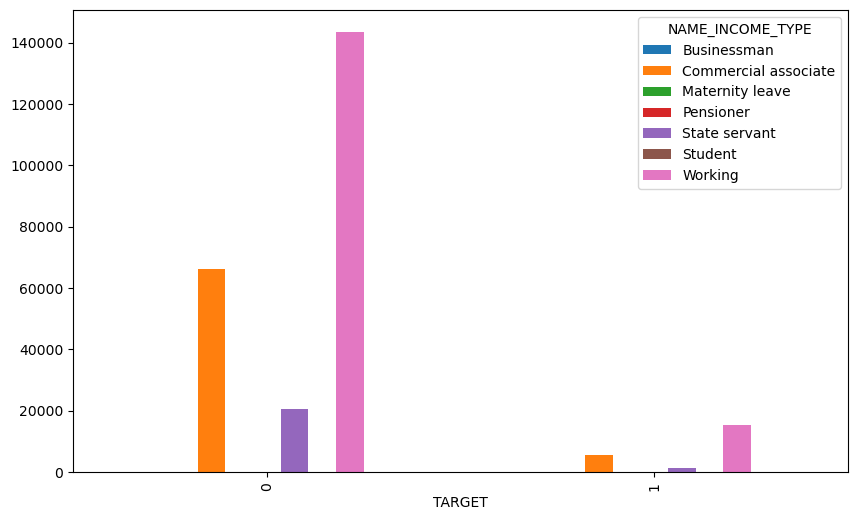

In [186]:
tab3= pd.crosstab(index=data0['TARGET'],columns=data0['NAME_INCOME_TYPE'])
print(tab3)
tab3.plot(kind="bar", figsize=(10,6),stacked=False)
plt.show()
# working people take more loans

-  Analyzing the relationship between 'TARGET' (default or non-default) and 'NAME_HOUSING_TYPE' (housing type) to understand loan defaults based on housing status.
-  The bar plot suggests that people with a house or apartment tend to take more loans, possibly due to financial stability or asset ownership which may make them eligible for higher loan amounts.

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                              922             202011                 8236   
1                               84              18472                  814   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2148              4089         12896  
1                               153               587          1725  


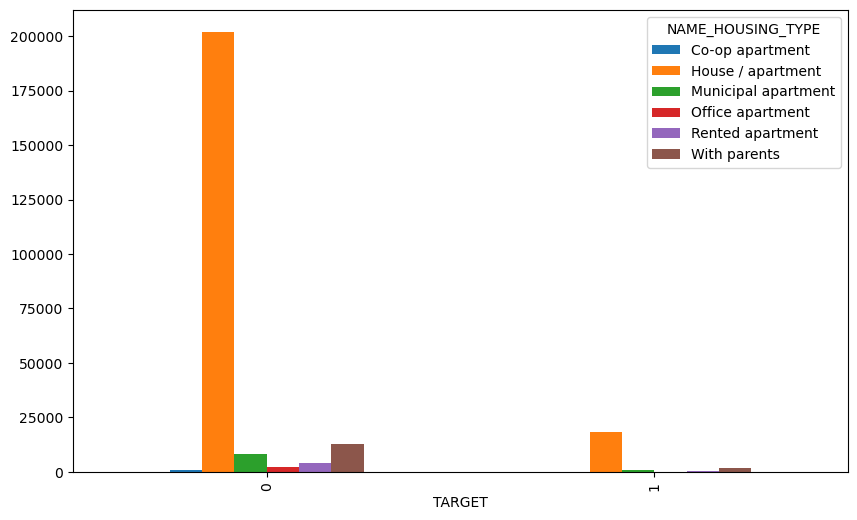

In [188]:
tab4= pd.crosstab(index=data0['TARGET'],columns=data0['NAME_HOUSING_TYPE'])
print(tab4)
tab4.plot(kind="bar", figsize=(10,6),stacked=False)
plt.show()
# People having house/appartment tend to take more loans

-  Performing bi-variate analysis using boxplots to visualize the distribution of continuous features for both default and non-default loan applicants.
-  The log scale helps in visualizing the spread of the data when there are large differences in the values.


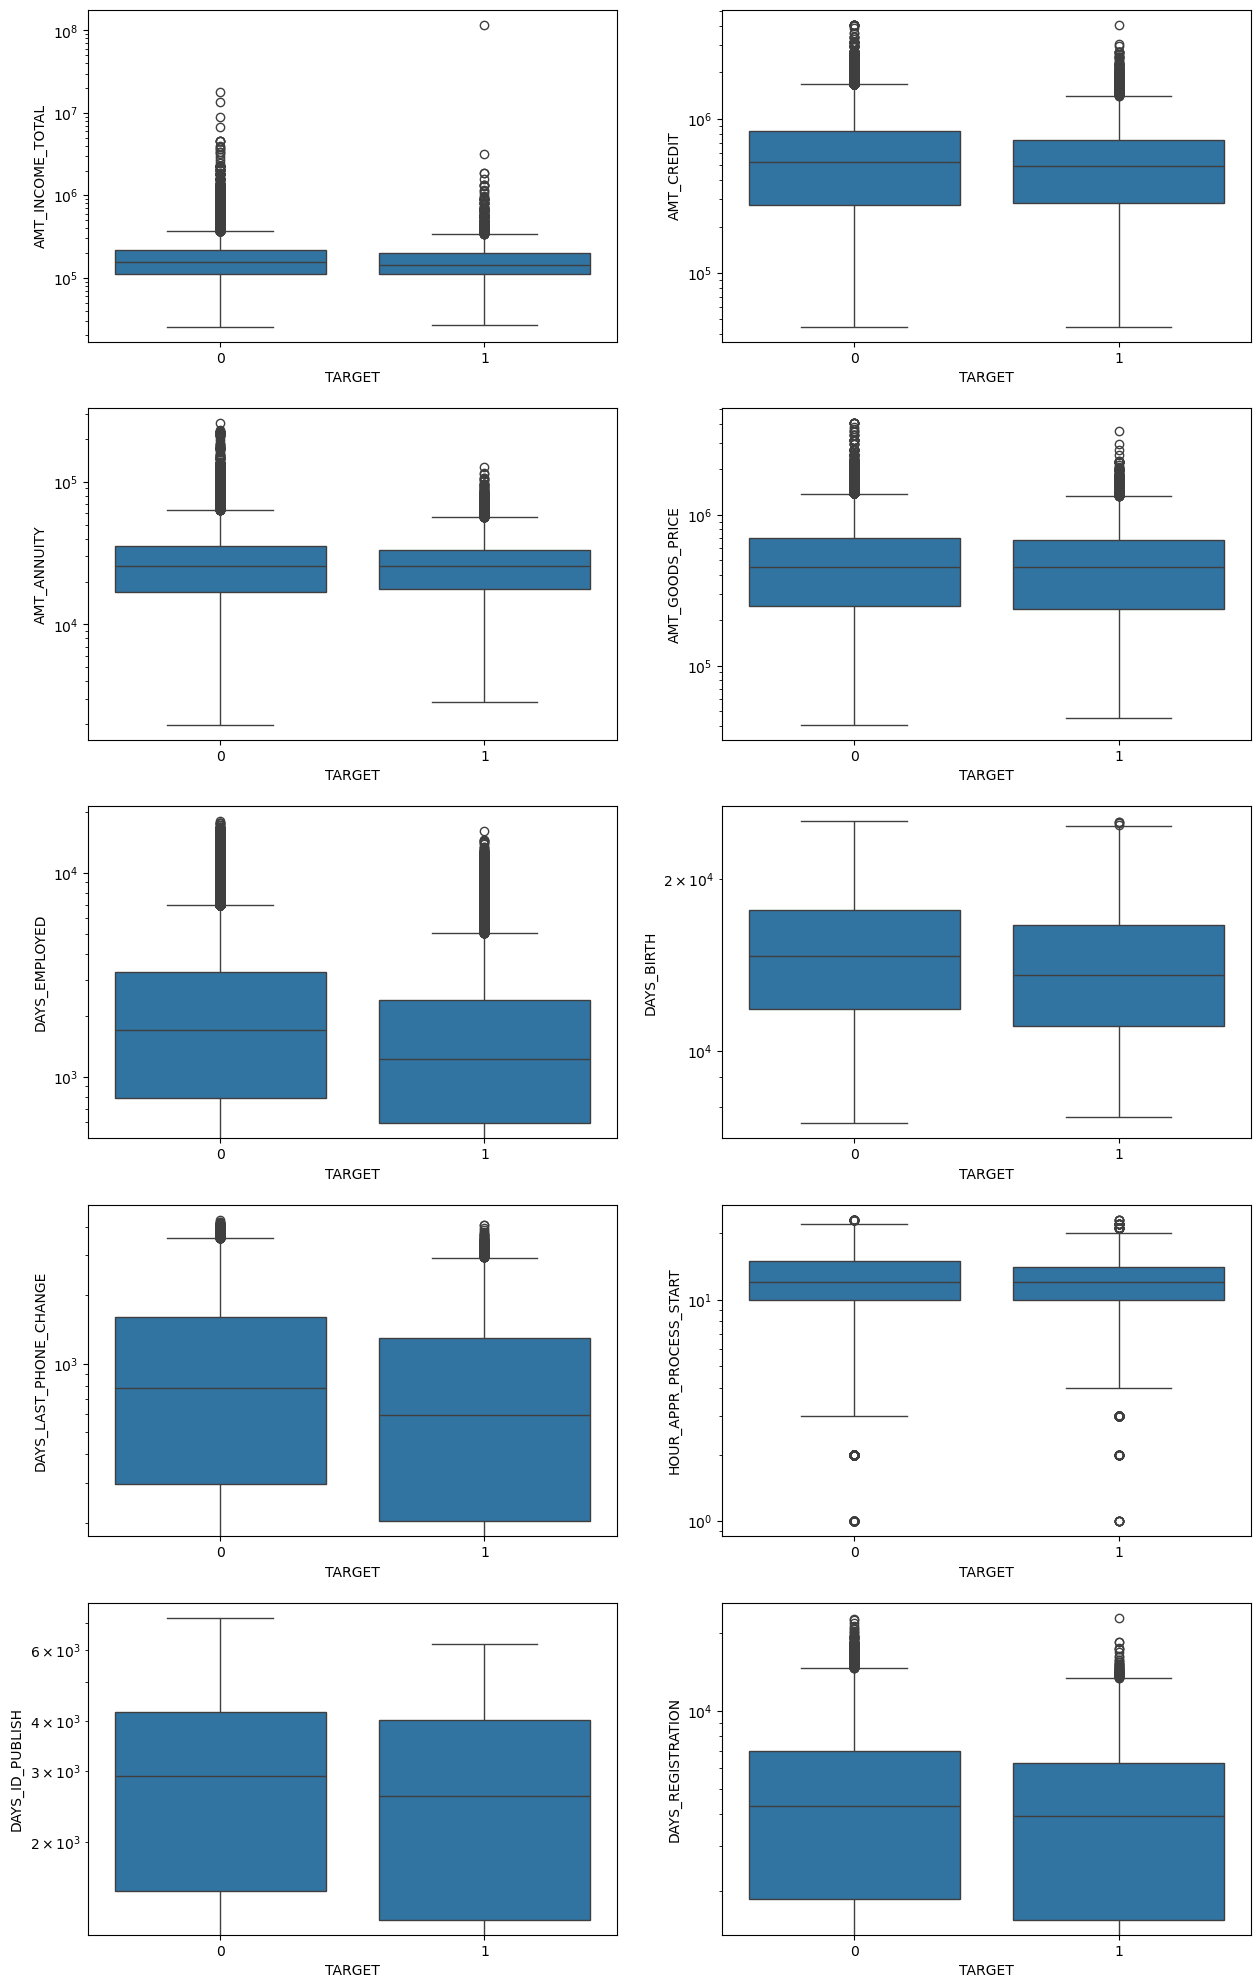

In [190]:
#Bi-variate continous plots to observe the outliers
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=data0[i[1]].dropna(),data=data0)
    plt.yscale('log')
plt.show()

In [191]:
data0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
1       100003       0         Cash loans           F             0   
2       100004       0    Revolving loans           M             0   
3       100006       0         Cash loans           F             0   
4       100007       0         Cash loans           M             0   
5       100008       0         Cash loans           M             0   
6       100009       0         Cash loans           F             1   
7       100010       0         Cash loans           M             0   
9       100012       0    Revolving loans           M             0   
10      100014       0         Cash loans           F             1   

    AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         202,500.00   406,597.50    24,700.50       351,000.00   
1         270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2          67,500.00   135,000.00     6,750.00       135,000.00   
3         135,000.00   312,682.50    29,686.50       297,000.00   
4         121,500.00   513,000.00    21,865.50       513,000.00   
5          99,000.00   490,495.50    27,517.50       454,500.00   
6         171,000.00 1,560,726.00    41,301.00     1,395,000.00   
7         360,000.00 1,530,000.00    42,075.00     1,530,000.00   
9         135,000.00   405,000.00    20,250.00       405,000.00   
10        112,500.00   652,500.00    21,177.00       652,500.00   

    NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied               Working  Secondary / secondary special   
1            Family         State servant               Higher education   
2     Unaccompanied               Working  Secondary / secondary special   
3     Unaccompanied               Working  Secondary / secondary special   
4     Unaccompanied               Working  Secondary / secondary special   
5   Spouse, partner         State servant  Secondary / secondary special   
6     Unaccompanied  Commercial associate               Higher education   
7     Unaccompanied         State servant               Higher education   
9     Unaccompanied               Working  Secondary / secondary special   
10    Unaccompanied               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                        0.02   
1                Married  House / apartment                        0.00   
2   Single / not married  House / apartment                        0.01   
3         Civil marriage  House / apartment                        0.01   
4   Single / not married  House / apartment                        0.03   
5                Married  House / apartment                        0.04   
6                Married  House / apartment                        0.04   
7                Married  House / apartment                        0.00   
9   Single / not married  House / apartment                        0.02   
10               Married  House / apartment                        0.02   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         9461            637               3648             2120   
1        16765           1188               1186              291   
2        19046            225               4260             2531   
3        19005           3039               9833             2437   
4        19932           3038               4311             3458   
5        16941           1588               4970              477   
6        13778           3130               1213              619   
7        18850            449               4597             2379   
9        14469           2019              14437             3992   
10       10197            679               4427              738   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIE

### <font color=red>3.c) Correlation Observations <font> 

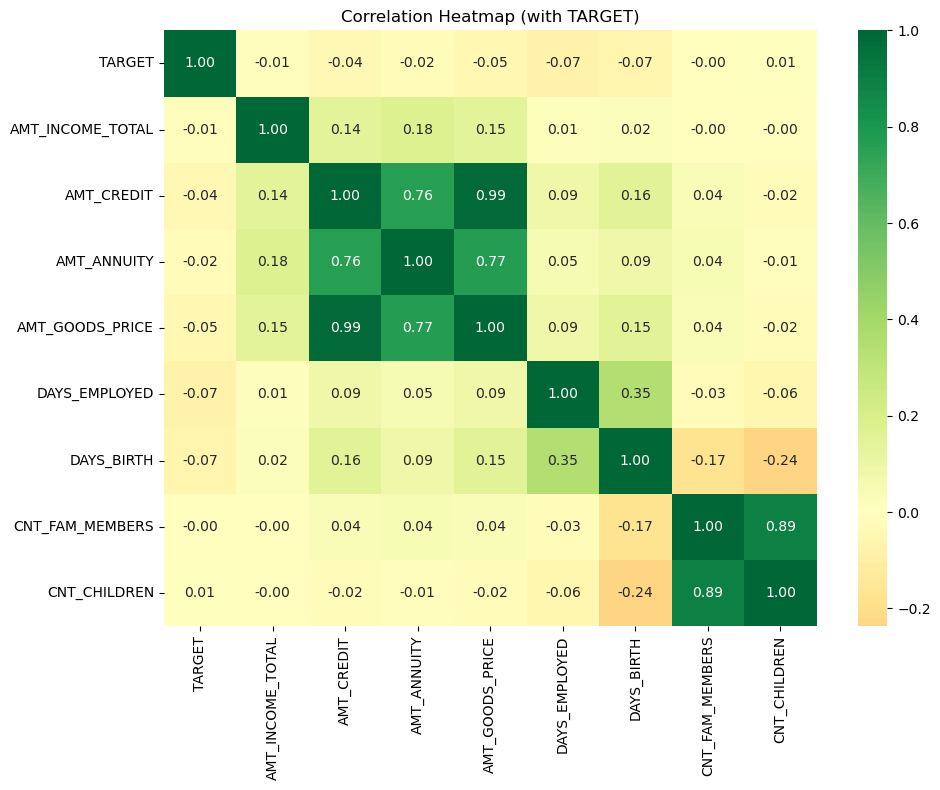

In [371]:
# Convert negative days to positive for interpretation
data0['DAYS_EMPLOYED'] = data0['DAYS_EMPLOYED'].abs()
data0['DAYS_BIRTH'] = data0['DAYS_BIRTH'].abs()

# Select relevant numeric columns (you can adjust this list)
num_cols = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
    'CNT_FAM_MEMBERS', 'CNT_CHILDREN'
]

# Filter only numeric columns (if unsure, use df.select_dtypes)
corr_matrix = data0[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Correlation Heatmap (with TARGET)')
plt.tight_layout()
plt.show()

## <font color=red>4) Detect Potential Outliers<font>

In [ ]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'CNT_CHILDREN' feature.
data0["CNT_CHILDREN"].plot.box()

The values greater than 3 are considered to be outliers

In [ ]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_CREDIT' feature.
data0["AMT_CREDIT"].plot.box()

The amount credited greater than 1616625.0 can be considered as an outlier

In [ ]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_ANNUITY' feature.
data0["AMT_ANNUITY"].plot.box()

Population relative count greater than 61704.0 is considered to be an outlier

<Axes: >

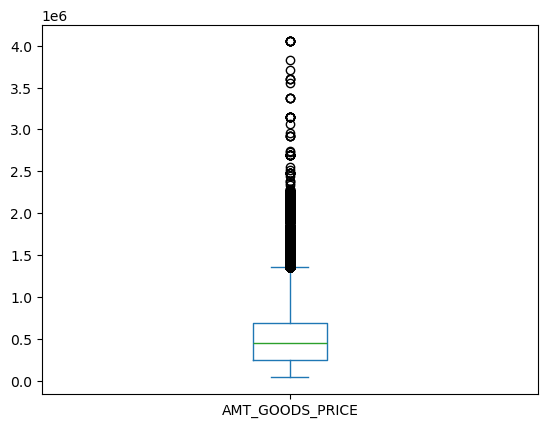

In [242]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_GOODS_PRICE' feature.
data0["AMT_GOODS_PRICE"].plot.box()

Population relative count greater than 1341000.0 is considered to be an outlier

<Axes: >

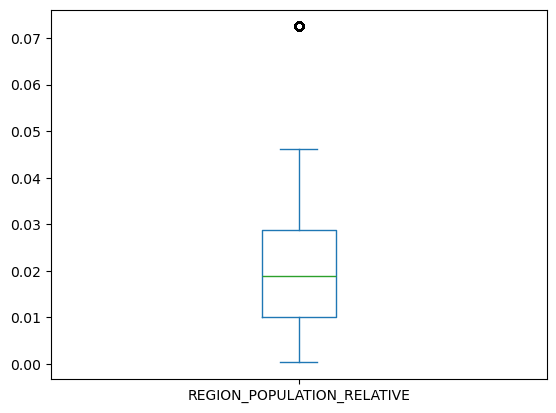

In [244]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'REGION_POPULATION_RELATIVE' feature.
data0["REGION_POPULATION_RELATIVE"].plot.box()

Population relative count greater than 0.056648500000000004 is considered to be an outlier

In [247]:
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00   406,597.50    24,700.50       351,000.00   
1        270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2         67,500.00   135,000.00     6,750.00       135,000.00   
3        135,000.00   312,682.50    29,686.50       297,000.00   
4        121,500.00   513,000.00    21,865.50       513,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2  Single / not married  House / apartment                        0.01   
3        Civil marriage  House / apartment                        0.01   
4  Single / not married  House / apartment                        0.03   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1   

## <font color=red>1) Data Cleaning<font>

#### Read in the Data set <font color=blue> previous_application.csv </font>.

#### **previous_application.csv** 
  -  contains information about the client’s previous loan data. 
  -  It contains the data on whether the previous application had been <font color=blue> *Approved, Cancelled, Refused or Unused offer* </font>.

In [252]:
# Load previous_application.csv
data1 = pd.read_csv("previous_application.csv")

In [253]:
#let's check the first five columns of the data frame data1.
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1,730.43        17,145.00   
1     2802425      108129         Cash loans    25,188.62       607,500.00   
2     2523466      122040         Cash loans    15,060.74       112,500.00   
3     2819243      176158         Cash loans    47,041.33       450,000.00   
4     1784265      202054         Cash loans    31,924.40       337,500.00   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0   17,145.00              0.00        17,145.00                   SATURDAY   
1  679,671.00               NaN       607,500.00                   THURSDAY   
2  136,444.50               NaN       112,500.00                    TUESDAY   
3  470,790.00               NaN       450,000.00                     MONDAY   
4  404,055.00               NaN       337,500.00                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1               0.00                   0.18   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                      0.87                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        12.00           middle  POS mobile with interest          365,243.00   
1        36.00       low_action          Cash X-Sell: low          365,243.00   
2        12.00             high         Cash X-Sell: high          365,243.00   
3        12.00           middle       Cash X-Sell: middle          365,243.00   
4        24.00             high         Cash Street: high                 NaN   

   D

In [254]:
#let's check the shape of the data frame data0.
shape=data1.shape
print('The shape',shape)

The shape (1670214, 37)


In [255]:
#let's check the information of the data frame data1.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [256]:
#let's check the describe of the data frame data1.
data1.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1,670,214.00 1,670,214.00 1,297,979.00     1,670,214.00 1,670,213.00   
mean  1,923,089.14   278,357.17    15,955.12       175,233.86   196,114.02   
std     532,597.96   102,814.82    14,782.14       292,779.76   318,574.62   
min   1,000,001.00   100,001.00         0.00             0.00         0.00   
25%   1,461,857.25   189,329.00     6,321.78        18,720.00    24,160.50   
50%   1,923,110.50   278,714.50    11,250.00        71,046.00    80,541.00   
75%   2,384,279.75   367,514.00    20,658.42       180,360.00   216,418.50   
max   2,845,382.00   456,255.00   418,058.15     6,905,160.00 6,905,160.00   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774,370.00     1,284,699.00             1,670,214.00   
mean           6,697.40       227,847.28                    12.48   
std           20,921.50       315,396.56                     3.33   
min               -0.90             0.00                     0.00   
25%                0.00        50,841.00                    10.00   
50%            1,638.00       112,320.00                    12.00   
75%            7,740.00       234,000.00                    15.00   
max        3,060,045.00     6,905,160.00                    23.00   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1,670,214.00         774,370.00               5,951.00   
mean                     1.00               0.08                   0.19   
std                      0.06               0.11                   0.09   
min                      0.00              -0.00                   0.03   
25%                      1.00               0.00                   0.16   
50%                      1.00               0.05                   0.19   
75%                      1.00               0.11                   0.19   
max                      1.00               1.00                   1.00   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5,951.00   1,670,214.00      1,670,214.00 1,297,984.00   
mean                       0.77        -880.68            313.95        16.05   
std                        0.10         779.10          7,127.44        14.57   
min                        0.37      -2,922.00             -1.00         0.00   
25%                        0.72      -1,300.00             -1.00         6.00   
50%                        0.84        -581.00              3.00        12.00   
75%                        0.85        -280.00             82.00        24.00   
max                        1.00          -1.00      4,000,000.00        84.00   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997,149.00      997,149.00                 997,149.00   
mean           342,209.86       13,826.27                  33,767.77   
std             88,916.12       72,444.87                 106,857.03   
min             -2,922.00       -2,892.00                  -2,801.00   
25%            365,243.00       -1,628.00                  -1,242.00   
50%            365,243.00         -831.00                    -361.00   
75%            365,243.00         -411.00                     129.00   
max            365,243.00      365,243.00                 365,243.00   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997,149.00        997,149.00                 997,149.00  
mean       76,582.40         81,992.34                       0.33  
std       149,647.42        153,303.52                       0.47  
min        -2,889.00         -2,874.00                       0.00  
25%        -1,314.00         -1,270.00                       0.00  
50%          -537.00           -499.00                       0.00  
75%           -74.00            -44.00                       1.00  
max       365,243.00        365,243.00                       1.00

In [257]:
len(data1.columns)

37

In [258]:
data1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## <font color=red>2) Impute/Remove missing values</font>

#### let's check the missing values in column.

In [261]:
# let's check the sum of missing values in column.
data1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [265]:
#let's check the percentage of missing values in column.
data1.isnull().mean()

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.22
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_DOWN_PAYMENT              0.54
AMT_GOODS_PRICE               0.23
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
FLAG_LAST_APPL_PER_CONTRACT   0.00
NFLAG_LAST_APPL_IN_DAY        0.00
RATE_DOWN_PAYMENT             0.54
RATE_INTEREST_PRIMARY         1.00
RATE_INTEREST_PRIVILEGED      1.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_TYPE_SUITE               0.49
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
CNT_PAYMENT         

### Retain columns with 19% or less missing values

In [267]:
#Retain columns with missing value which has percentage of missing values less than 19%
data1=data1.loc[:,data1.isna().mean()<=.19]
len(data1.columns)

23

In [268]:
#let's check if the above changes has occured.
data1.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [269]:
#let's check if the above changes has occured.
data1.isnull().mean()

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
FLAG_LAST_APPL_PER_CONTRACT   0.00
NFLAG_LAST_APPL_IN_DAY        0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
NAME_YIELD_GROUP              0.00
PRODUCT_COMBINATION           0.00
dtype: float64

#### let's convert all negative values to positive values.

In [271]:
data1['DAYS_DECISION']=data1['DAYS_DECISION'].abs()
data1['SELLERPLACE_AREA']=data1['SELLERPLACE_AREA'].abs()

In [272]:
data0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
1       100003       0         Cash loans           F             0   
2       100004       0    Revolving loans           M             0   
3       100006       0         Cash loans           F             0   
4       100007       0         Cash loans           M             0   
5       100008       0         Cash loans           M             0   
6       100009       0         Cash loans           F             1   
7       100010       0         Cash loans           M             0   
9       100012       0    Revolving loans           M             0   
10      100014       0         Cash loans           F             1   

    AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         202,500.00   406,597.50    24,700.50       351,000.00   
1         270,000.00 1,293,502.50    35,698.50     1,129,500.00   
2          67,500.00   135,000.00     6,750.00       135,000.00   
3         135,000.00   312,682.50    29,686.50       297,000.00   
4         121,500.00   513,000.00    21,865.50       513,000.00   
5          99,000.00   490,495.50    27,517.50       454,500.00   
6         171,000.00 1,560,726.00    41,301.00     1,395,000.00   
7         360,000.00 1,530,000.00    42,075.00     1,530,000.00   
9         135,000.00   405,000.00    20,250.00       405,000.00   
10        112,500.00   652,500.00    21,177.00       652,500.00   

    NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied               Working  Secondary / secondary special   
1            Family         State servant               Higher education   
2     Unaccompanied               Working  Secondary / secondary special   
3     Unaccompanied               Working  Secondary / secondary special   
4     Unaccompanied               Working  Secondary / secondary special   
5   Spouse, partner         State servant  Secondary / secondary special   
6     Unaccompanied  Commercial associate               Higher education   
7     Unaccompanied         State servant               Higher education   
9     Unaccompanied               Working  Secondary / secondary special   
10    Unaccompanied               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                        0.02   
1                Married  House / apartment                        0.00   
2   Single / not married  House / apartment                        0.01   
3         Civil marriage  House / apartment                        0.01   
4   Single / not married  House / apartment                        0.03   
5                Married  House / apartment                        0.04   
6                Married  House / apartment                        0.04   
7                Married  House / apartment                        0.00   
9   Single / not married  House / apartment                        0.02   
10               Married  House / apartment                        0.02   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0         9461            637               3648             2120   
1        16765           1188               1186              291   
2        19046            225               4260             2531   
3        19005           3039               9833             2437   
4        19932           3038               4311             3458   
5        16941           1588               4970              477   
6        13778           3130               1213              619   
7        18850            449               4597             2379   
9        14469           2019              14437             3992   
10       10197            679               4427              738   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIE

#### let's check the missing values in NAME_TYPE_SUITE column.

In [274]:
# Display summary statistics (count, unique values, top value, and frequency) for the "PRODUCT_COMBINATION" column
data1['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [275]:
# Count the occurrences of each unique value in the "PRODUCT_COMBINATION" column, sorted in descending order of frequency
data1['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [276]:
# let's Find and display the most frequently occurring value (mode) in the "PRODUCT_COMBINATION" column
data1['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [277]:
# Replace all missing (NaN) values in the "PRODUCT_COMBINATION" column with the string "Unaccompanied".
# The `inplace=True` parameter ensures that the replacement is done directly in the existing DataFrame without creating a copy.
data1['PRODUCT_COMBINATION'].fillna(value='Cash',inplace=True)

In [278]:
# let's check the total number of missing (NaN) values in the "PRODUCT_COMBINATION" column.
data1['PRODUCT_COMBINATION'].isnull().sum()

0

In [279]:
#let's check if the above changes has occured.
data1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [280]:
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1             Approved            164                    XNA   
2             Approved            301  Cash through the bank   
3             Approved            512  Cash through the bank   
4              Refused            781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                 1   
2            x-sell  Credit and cash offices                 1   
3            x-sell  Credit and cash offices                 1   
4           walk-in  Credit and cash offices                 1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

#### let's check missing values in 'AMT_CREDIT' column


In [282]:
# Provides a summary of descriptive statistics for the column "AMT_CREDIT" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data1['AMT_CREDIT'].describe()

count   1,670,213.00
mean      196,114.02
std       318,574.62
min             0.00
25%        24,160.50
50%        80,541.00
75%       216,418.50
max     6,905,160.00
Name: AMT_CREDIT, dtype: float64

In [283]:
#let's check the total number of missing values in the "AMT_CREDIT" 
data1['AMT_CREDIT'].isna().sum()

1

In [284]:
# let's check the mean of the "AMT_CREDIT" column.
data1["AMT_CREDIT"].mean()

196114.0212179794

In [285]:
# let's check the median of the "AMT_CREDIT" column.
data1["AMT_CREDIT"].median()

80541.0

In [286]:
data1['AMT_CREDIT'].fillna(data1['AMT_CREDIT'].median(),inplace=True)

In [287]:
#let's check the total number of missing values in the "AMT_CREDIT" 
data1['AMT_CREDIT'].isna().sum()

0

<Axes: >

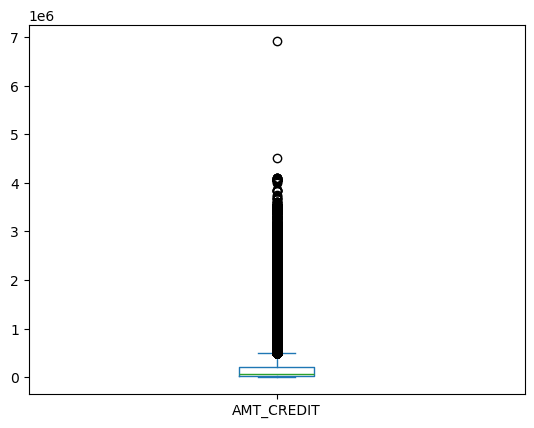

In [288]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_CREDIT' feature.
data1['AMT_CREDIT'].plot.box()

#### Count the occurrences of each unique value in the 'NAME_CASH_LOAN_PURPOSE' column to analyze gender distribution.

In [290]:
# Provides a summary of descriptive statistics for the column "NAME_CASH_LOAN_PURPOSE" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data1['NAME_CASH_LOAN_PURPOSE'].describe()

count     1670214
unique         25
top           XAP
freq       922661
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [291]:
# Display the count of each unique value in the "NAME_CASH_LOAN_PURPOSE" column to understand its distribution.
data1['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

#### Count the occurrences of each unique value in the 'CODE_REJECT_REASON' column to analyze gender distribution.

In [293]:
# Provides a summary of descriptive statistics for the column "CODE_REJECT_REASON" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data1['CODE_REJECT_REASON'].describe()

count     1670214
unique          9
top           XAP
freq      1353093
Name: CODE_REJECT_REASON, dtype: object

In [294]:
# Display the count of each unique value in the "CODE_REJECT_REASON" column to understand its distribution.
data1['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

In [295]:
# let's check the structure of the dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [296]:
# Print the value counts for all columns with object (categorical/string) data types to explore the distribution of their values.
for col in data1.columns:
    if data1[col].dtype=="object":
        print(data1[col].value_counts())
        print("----"*20)

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64
--------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
--------------------------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday ex

#### Count the occurrences of each unique value in the 'NAME_CONTRACT_TYPE' column to analyze gender distribution.

In [298]:
# Display the count of each unique value in the "NAME_CONTRACT_TYPE" column to understand its distribution.
data1['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [299]:
# let's Find and display the most frequently occurring value (mode) in the "NAME_CONTRACT_TYPE" column
data1['NAME_CONTRACT_TYPE'].mode()[0]

'Cash loans'

In [303]:
# Replace anomalous 'XNA' values in the 'NAME_CONTRACT_TYPE' column with 'Cash loans' for consistency in gender classification.
data1["NAME_CONTRACT_TYPE"].replace(to_replace="XNA",value="Cash loans",inplace=True)

In [304]:
# Count the occurrences of each unique value in the 'NAME_CONTRACT_TYPE' column to analyze gender distribution.
data1['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

#### For each column in the dataset, calculate and display the percentage of rows containing 'XNA' or 'XAP' values.

In [306]:
# For each column in the dataset, calculate and display the percentage of rows containing 'XNA' or 'XAP' values.
for column in data1.columns:
    xna_percentage = data1[column].isin(['XNA', 'XAP']).mean() * 100
    print(f"{column}: {xna_percentage:.2f}%")

SK_ID_PREV: 0.00%
SK_ID_CURR: 0.00%
NAME_CONTRACT_TYPE: 0.00%
AMT_APPLICATION: 0.00%
AMT_CREDIT: 0.00%
WEEKDAY_APPR_PROCESS_START: 0.00%
HOUR_APPR_PROCESS_START: 0.00%
FLAG_LAST_APPL_PER_CONTRACT: 0.00%
NFLAG_LAST_APPL_IN_DAY: 0.00%
NAME_CASH_LOAN_PURPOSE: 95.83%
NAME_CONTRACT_STATUS: 0.00%
DAYS_DECISION: 0.00%
NAME_PAYMENT_TYPE: 37.56%
CODE_REJECT_REASON: 81.33%
NAME_CLIENT_TYPE: 0.12%
NAME_GOODS_CATEGORY: 56.93%
NAME_PORTFOLIO: 22.29%
NAME_PRODUCT_TYPE: 63.68%
CHANNEL_TYPE: 0.00%
SELLERPLACE_AREA: 0.00%
NAME_SELLER_INDUSTRY: 51.23%
NAME_YIELD_GROUP: 30.97%
PRODUCT_COMBINATION: 0.00%


#### From the above we can drop columns which has more than 50% of Thresholds.

In [308]:
# Identify columns where more than 50% of the values are 'XNA' or 'XAP' and prepare to drop them due to the high percentage of placeholder values.
cut_off=50
cols_to_Drop=list(data1.columns[100*data1.isin(['XNA', 'XAP']).mean()>cut_off])
print(cols_to_Drop,len(cols_to_Drop))

['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY'] 5


In [309]:
# Drop columns that have more than 50% of their values as 'XNA' or 'XAP', as they likely contain placeholder or non-informative data.
data1.drop(columns=cols_to_Drop, inplace=True)

In [310]:
# For each column in the dataset, calculate and display the percentage of rows containing 'XNA' or 'XAP' values.
for column in data1.columns:
    xna_percentage = data1[column].isin(['XNA', 'XAP']).mean() * 100
    print(f"{column}: {xna_percentage:.2f}%")

SK_ID_PREV: 0.00%
SK_ID_CURR: 0.00%
NAME_CONTRACT_TYPE: 0.00%
AMT_APPLICATION: 0.00%
AMT_CREDIT: 0.00%
WEEKDAY_APPR_PROCESS_START: 0.00%
HOUR_APPR_PROCESS_START: 0.00%
FLAG_LAST_APPL_PER_CONTRACT: 0.00%
NFLAG_LAST_APPL_IN_DAY: 0.00%
NAME_CONTRACT_STATUS: 0.00%
DAYS_DECISION: 0.00%
NAME_PAYMENT_TYPE: 37.56%
NAME_CLIENT_TYPE: 0.12%
NAME_PORTFOLIO: 22.29%
CHANNEL_TYPE: 0.00%
SELLERPLACE_AREA: 0.00%
NAME_YIELD_GROUP: 30.97%
PRODUCT_COMBINATION: 0.00%


In [311]:
#let's check if the above changes has occured.
data1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
NAME_CLIENT_TYPE               0
NAME_PORTFOLIO                 0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [312]:
# Print the value counts for all columns with object (categorical/string) data types to explore the distribution of their values.
for col in data1.columns:
    if data1[col].dtype=="object":
        print(data1[col].value_counts())
        print("----"*20)

NAME_CONTRACT_TYPE
Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64
--------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
--------------------------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64
--------------------------------------------------------------------------------
NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from

#### Count the occurrences of each unique value in the 'NAME_PAYMENT_TYPE' column to analyze gender distribution.

In [314]:
# Display the count of each unique value in the "NAME_PAYMENT_TYPE" column to understand its distribution.
data1['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

In [315]:
# let's Find and display the most frequently occurring value (mode) in the "NAME_PAYMENT_TYPE" column
data1['NAME_PAYMENT_TYPE'].mode()[0]

'Cash through the bank'

In [316]:
# Replace anomalous 'XNA' values in the 'NAME_PAYMENT_TYPE' column with 'Cash through the bank' for consistency in gender classification.
data1["NAME_PAYMENT_TYPE"].replace(to_replace="XNA",value="Cash through the bank",inplace=True)

In [317]:
# Display the count of each unique value in the "NAME_PAYMENT_TYPE" column to understand its distribution
data1['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1660936
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

#### Count the occurrences of each unique value in the 'NAME_CLIENT_TYPE' column to analyze gender distribution.

In [319]:
# Count the occurrences of each unique value in the 'NAME_CLIENT_TYPE' column to analyze gender distribution.
data1['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

In [320]:
# let's Find and display the most frequently occurring value (mode) in the "NAME_CLIENT_TYPE" column
data1['NAME_CLIENT_TYPE'].mode()[0]

'Repeater'

In [321]:
# Replace anomalous 'XNA' values in the 'NAME_CLIENT_TYPE' column with 'Repeater' for consistency in gender classification.
data1['NAME_CLIENT_TYPE'].replace(to_replace="XNA",value='Repeater',inplace=True)

In [322]:
# Count the occurrences of each unique value in the 'NAME_CLIENT_TYPE' column to analyze gender distribution.
data1['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1233202
New           301363
Refreshed     135649
Name: count, dtype: int64

#### Count the occurrences of each unique value in the 'NAME_PORTFOLIO' column to analyze gender distribution.

In [324]:
# Count the occurrences of each unique value in the 'NAME_PORTFOLIO' column to analyze gender distribution.
data1['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: count, dtype: int64

In [325]:
# let's Find and display the most frequently occurring value (mode) in the "NAME_PORTFOLIO" column
data1['NAME_PORTFOLIO'].mode()[0]

'POS'

In [326]:
# Replace anomalous 'XNA' values in the 'NAME_PORTFOLIO' column with 'POS' for consistency in gender classification.
data1['NAME_PORTFOLIO'].replace(to_replace='XNA',value='POS',inplace=True)

In [327]:
# Count the occurrences of each unique value in the 'NAME_PORTFOLIO' column to analyze gender distribution.
data1['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      1063241
Cash      461563
Cards     144985
Cars         425
Name: count, dtype: int64

#### Count the occurrences of each unique value in the 'NAME_YIELD_GROUP' column to analyze gender distribution.

In [329]:
# Count the occurrences of each unique value in the 'NAME_YIELD_GROUP' column to analyze gender distribution.
data1['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [330]:
# Replace anomalous 'XNA' values in the 'NAME_YIELD_GROUP' column with 'middle' for consistency in gender classification.
data1['NAME_YIELD_GROUP'].replace(to_replace='XNA',value='middle',inplace=True)

In [331]:
# Count the occurrences of each unique value in the 'NAME_YIELD_GROUP' column to analyze gender distribution.
data1['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
middle        902747
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [332]:
# Provides a summary of descriptive statistics for the column "AMT_CREDIT" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data1["AMT_CREDIT"].describe()

count   1,670,214.00
mean      196,113.95
std       318,574.53
min             0.00
25%        24,160.50
50%        80,541.00
75%       216,418.50
max     6,905,160.00
Name: AMT_CREDIT, dtype: float64

<Axes: >

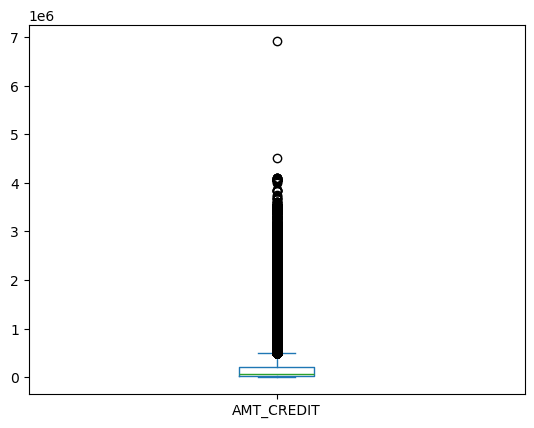

In [333]:
# Plotting a box plot to visualize the distribution and detect potential outliers in the 'AMT_CREDIT' feature.
data1['AMT_CREDIT'].plot.box()

#### creating bins for AMT_CREDIT , AMT_APPLICATION

In [335]:
# let's check the first 5 rows and columns presentin the dataset
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             73  Cash through the bank         Repeater            POS   
1            164  Cash through the bank         Repeater           Cash   
2            301  Cash through the bank         Repeater           Cash   
3            512  Cash through the bank         Repeater           Cash   
4            781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                 1       low_action   
2  Credit and cash offices                 1             high   
3  Credit and cash offices                 1           middle   
4  Credit and cash offices                 1             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [336]:
# To facilitate segmentation and analysis, create a new column called AMT_CREDIT_RANGE that groups AMT_CREDIT into predetermined income bands according to designated bins and labels.
bins_credit = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots_credit = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data1["AMT_CREDIT_RANGE"]=pd.cut(data1["AMT_CREDIT"],bins=bins_credit,labels=slots_credit)
data1["AMT_CREDIT_RANGE"].head()

0             0-25000
1    500000 and above
2       125000-150000
3       450000-475000
4       400000-425000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [337]:
# The new column 'AMT_CREDIT_RANGE' has been generated. Let's verify.
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             73  Cash through the bank         Repeater            POS   
1            164  Cash through the bank         Repeater           Cash   
2            301  Cash through the bank         Repeater           Cash   
3            512  Cash through the bank         Repeater           Cash   
4            781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                 1       low_action   
2  Credit and cash offices                 1             high   
3  Credit and cash offices                 1           middle   
4  Credit and cash offices                 1             high   

        PRODUCT_COMBINATION  AMT_CREDIT_RANGE  
0  POS mobile with interest           0-25000  
1          Cash X-Sell: low  500000 and above  
2         Cash X-Sell: high     125000-150000  
3       Cash X-Sell: middle     450000-475000  
4         Cash Street: high     400000-425000

In [338]:
# Provides a summary of descriptive statistics for the column "AMT_APPLICATION" in the dataset.
# It includes metrics such as count, mean, standard deviation, min, max, and quartiles.
data1['AMT_APPLICATION'].describe()

count   1,670,214.00
mean      175,233.86
std       292,779.76
min             0.00
25%        18,720.00
50%        71,046.00
75%       180,360.00
max     6,905,160.00
Name: AMT_APPLICATION, dtype: float64

In [339]:
# For simpler segmentation and analysis, create a new column called AMT_APPLICATION_RANGE that groups AMT_APPLICATION into predetermined income bands according to designated bins and labels.
bins_app = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_app = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data1["AMT_APPLICATION_RANGE"]=pd.cut(data1["AMT_APPLICATION"],bins=bins_app,labels=slot_app)
data1["AMT_APPLICATION_RANGE"].head()

0             0-25000
1    500000 and above
2       100000-125000
3       425000-450000
4       325000-350000
Name: AMT_APPLICATION_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [340]:
# let's check the new column 'AMT_APPLICATION_RANGE' has been created.
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             73  Cash through the bank         Repeater            POS   
1            164  Cash through the bank         Repeater           Cash   
2            301  Cash through the bank         Repeater           Cash   
3            512  Cash through the bank         Repeater           Cash   
4            781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                 1       low_action   
2  Credit and cash offices                 1             high   
3  Credit and cash offices                 1           middle   
4  Credit and cash offices                 1             high   

        PRODUCT_COMBINATION  AMT_CREDIT_RANGE AMT_APPLICATION_RANGE  
0  POS mobile with interest           0-25000               0-25000  
1          Cash X-Sell: low  500000 and above      500000 and above  
2         Cash X-Sell: high     125000-150000         100000-125000  
3       Cash X-Sell: middle     450000-475000         425000-450000  
4         Cash Street: high     400000-425000         325000-350000

### <font color=red>3.a.1) Univariate Analysis.<font>

In [342]:
data1.shape

(1670214, 20)

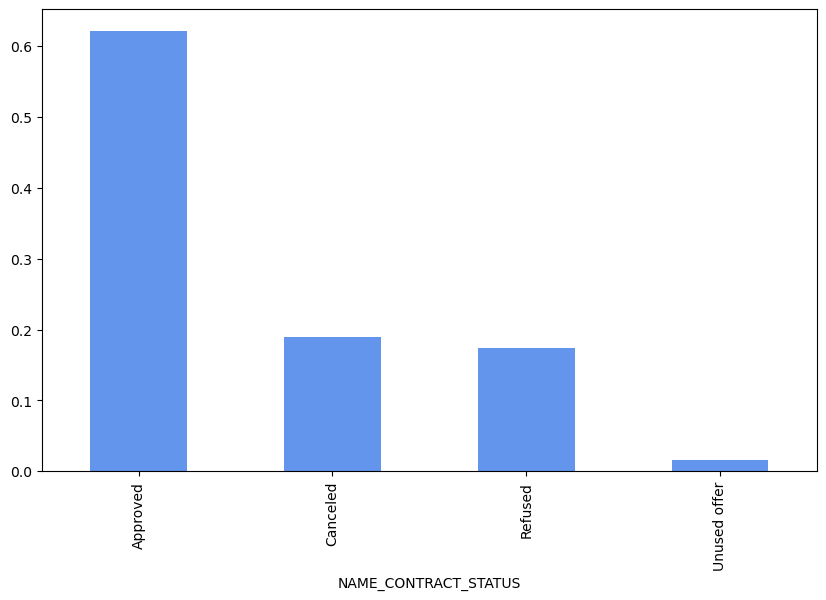

In [377]:
# Creating a bar chart to visualize the distribution of 'NAME_CONTRACT_STATUS'.
plt.figure(figsize=(10,6))
(data1.NAME_CONTRACT_STATUS.value_counts()/len(data1)).plot.bar(color='cornflowerblue')
plt.show()

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the loans are approved.

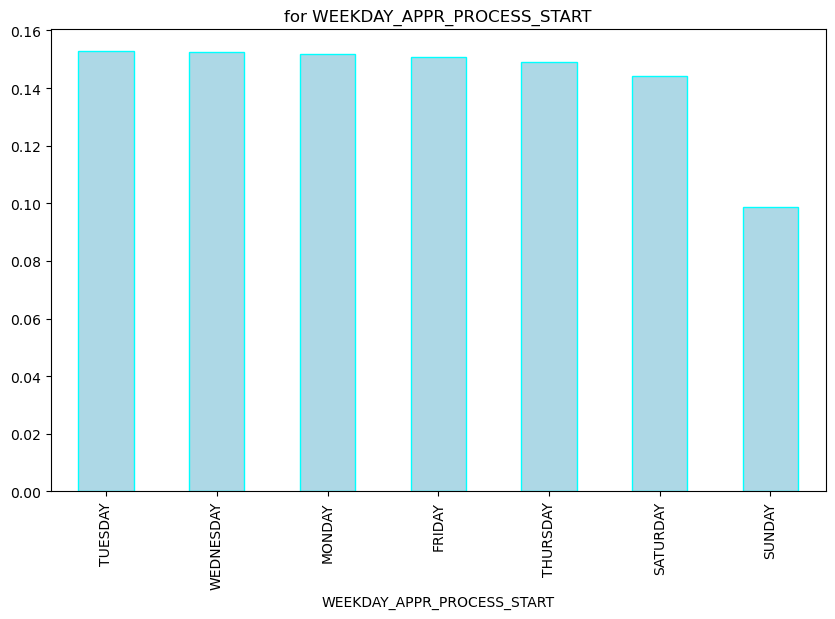

In [345]:
# Creating a bar chart to visualize the distribution of 'WEEKDAY_APPR_PROCESS_START'.
plt.figure(figsize=(10,6))
data1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar(edgecolor='cyan', color='lightblue')
plt.title('for WEEKDAY_APPR_PROCESS_START')
plt.show()
# from the graph we can conclude that application starting processes are generally less in saturday and sunday.

We can see from the **bar graph** that the graph we can conclude that application starting processes are generally less in saturday and sunday.

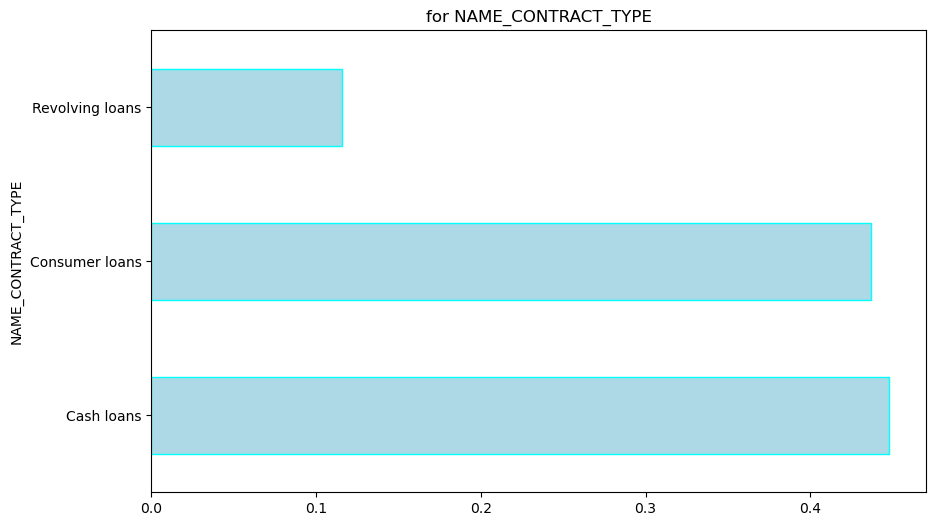

In [347]:
# Creating a horizontal bar chart to visualize the distribution of 'NAME_FAMILY_STATUS'.
plt.figure(figsize=(10,6))
data1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh(edgecolor='cyan', color='lightblue')
plt.title('for NAME_CONTRACT_TYPE')
plt.show()

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the cash loans are approved.

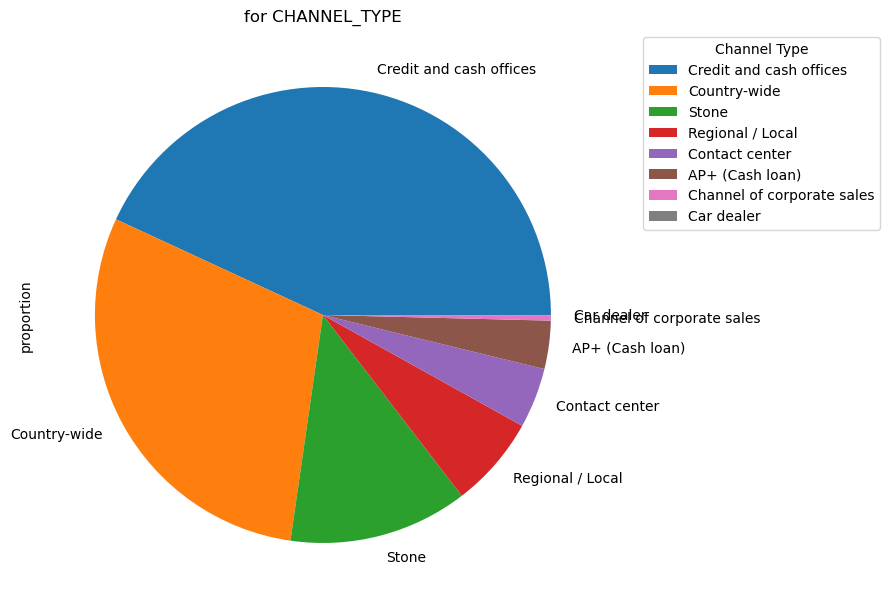

In [450]:
# pie chart shows the CHANNEL_TYPE 
plt.figure(figsize=(10,6))
data1.CHANNEL_TYPE.value_counts(normalize=True).plot.pie()
plt.legend(title="Channel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('for CHANNEL_TYPE')
plt.show()

We can see from the **pie chart** plot below that a large proportion of cash/credit loans.


In [355]:
num_cols=list(data1.dtypes[data1.dtypes!='object'].index)
data1[num_cols].head()

SK_ID_PREV  SK_ID_CURR  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877        17,145.00   17,145.00   
1     2802425      108129       607,500.00  679,671.00   
2     2523466      122040       112,500.00  136,444.50   
3     2819243      176158       450,000.00  470,790.00   
4     1784265      202054       337,500.00  404,055.00   

   HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
0                       15                       1             73   
1                       11                       1            164   
2                       11                       1            301   
3                        7                       1            512   
4                        9                       1            781   

   SELLERPLACE_AREA  AMT_CREDIT_RANGE AMT_APPLICATION_RANGE  
0                35           0-25000               0-25000  
1                 1  500000 and above      500000 and above  
2                 1     125000-150000         100000-125000  
3                 1     450000-475000         425000-450000  
4                 1     400000-425000         325000-350000

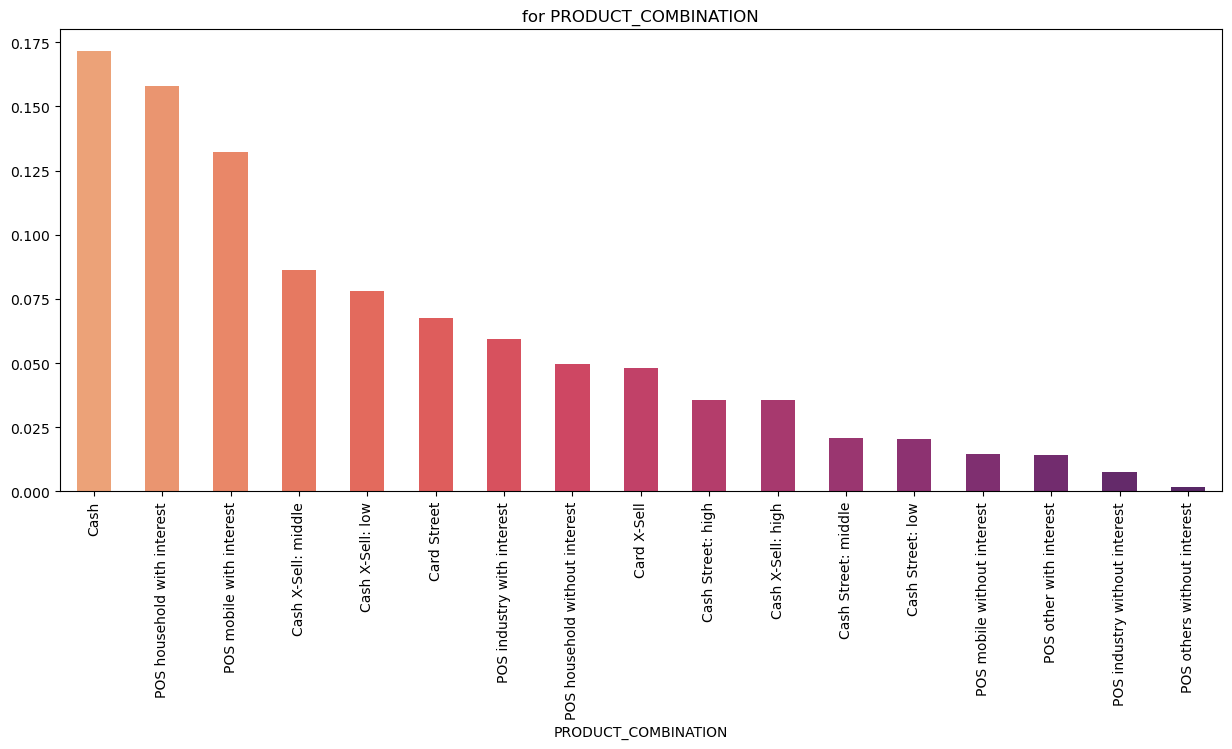

In [379]:
# Creating a bar chart to visualize the distribution of 'PRODUCT_COMBINATION'.
colors = sns.color_palette("flare", len(data1.PRODUCT_COMBINATION.value_counts()))

plt.figure(figsize=(15, 6))
data1.PRODUCT_COMBINATION.value_counts(normalize=True).plot.bar(color=colors)
plt.title('for PRODUCT_COMBINATION')
plt.show()

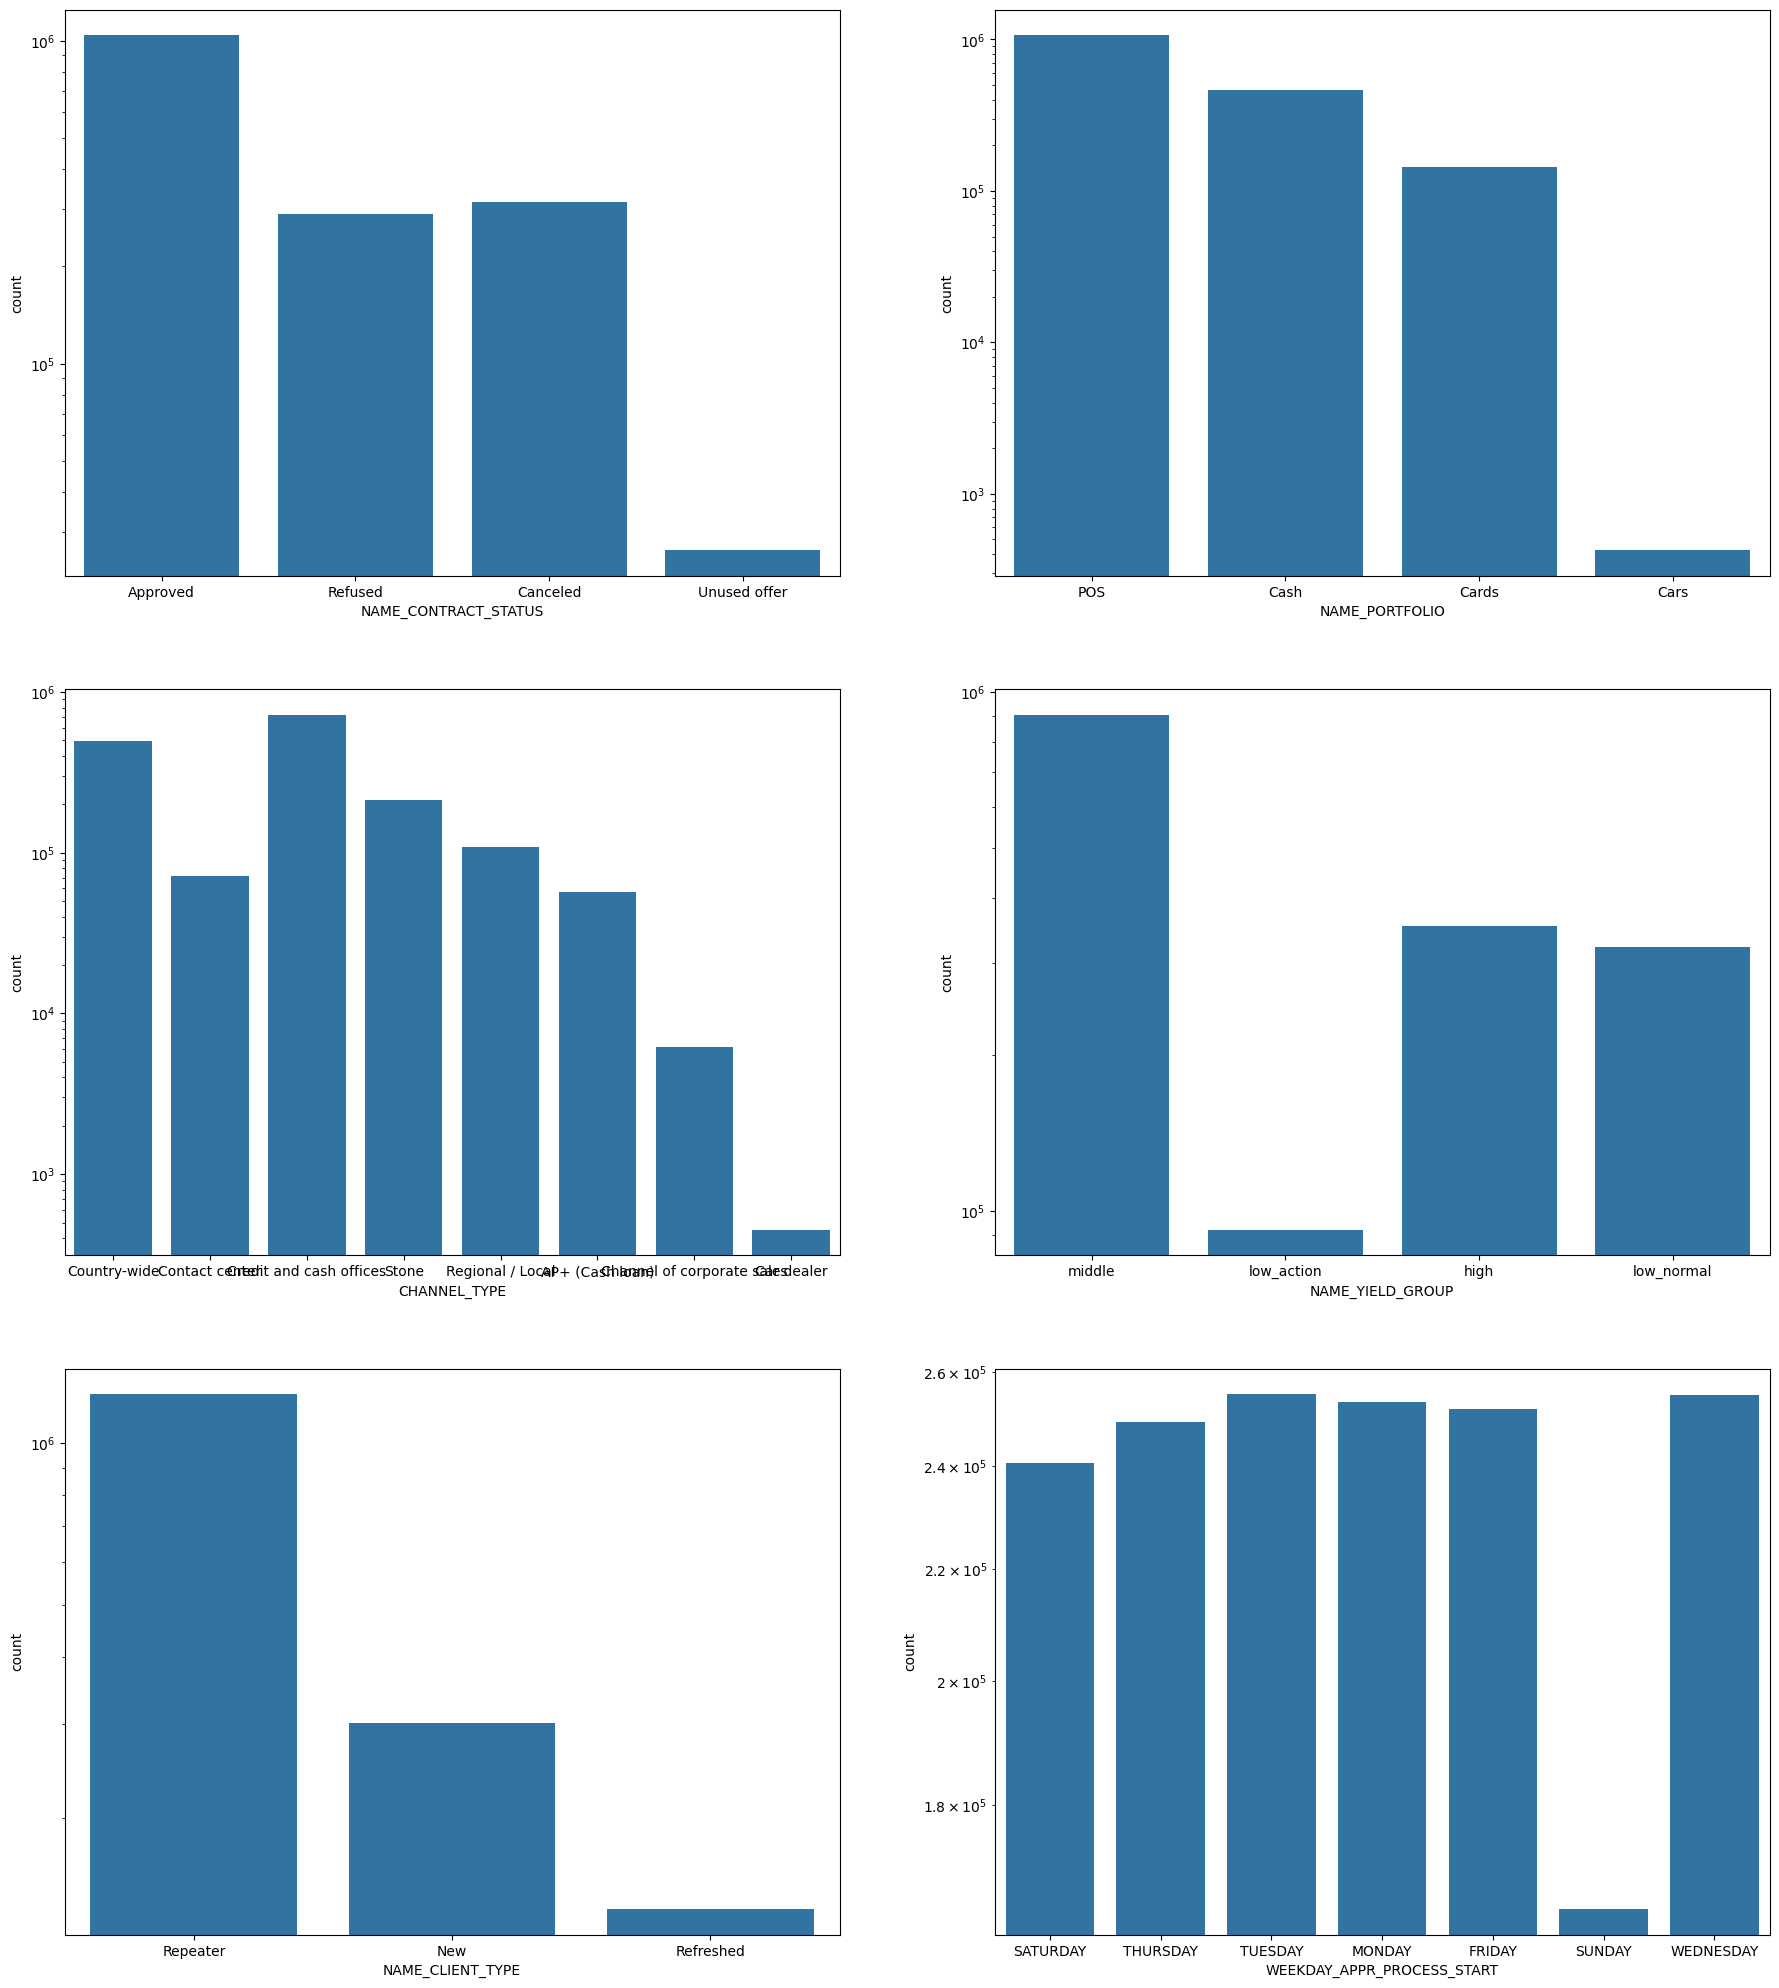

In [357]:
categorical_columns=['NAME_CONTRACT_STATUS','NAME_PORTFOLIO',
                     'CHANNEL_TYPE','NAME_YIELD_GROUP','NAME_CLIENT_TYPE',
                    'WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],data=data1)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

As we can see from graphs
-  Approved loans tends to be more.
-  People tend to take POS loans more.
-  Credit and Cash type of Channel tends to be more.
-  People Who are repeater tends to take more loan.
-  People who started application process on Saturday and sunday are less likely to default

### <font color=red>3.b) Bivariate Analysis.<font>

In [360]:
# let's check the new column 'AMT_APPLICATION_RANGE' has been created.
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans        17,145.00   17,145.00   
1     2802425      108129         Cash loans       607,500.00  679,671.00   
2     2523466      122040         Cash loans       112,500.00  136,444.50   
3     2819243      176158         Cash loans       450,000.00  470,790.00   
4     1784265      202054         Cash loans       337,500.00  404,055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             73  Cash through the bank         Repeater            POS   
1            164  Cash through the bank         Repeater           Cash   
2            301  Cash through the bank         Repeater           Cash   
3            512  Cash through the bank         Repeater           Cash   
4            781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                 1       low_action   
2  Credit and cash offices                 1             high   
3  Credit and cash offices                 1           middle   
4  Credit and cash offices                 1             high   

        PRODUCT_COMBINATION  AMT_CREDIT_RANGE AMT_APPLICATION_RANGE  
0  POS mobile with interest           0-25000               0-25000  
1          Cash X-Sell: low  500000 and above      500000 and above  
2         Cash X-Sell: high     125000-150000         100000-125000  
3       Cash X-Sell: middle     450000-475000         425000-450000  
4         Cash Street: high     400000-425000         325000-350000

NAME_CONTRACT_TYPE    Cash loans  Consumer loans  Revolving loans
NAME_CONTRACT_STATUS                                             
Approved                  312540          626470            97771
Canceled                  268906            1559            45854
Refused                   165959           75185            49534
Unused offer                 494           25937                5


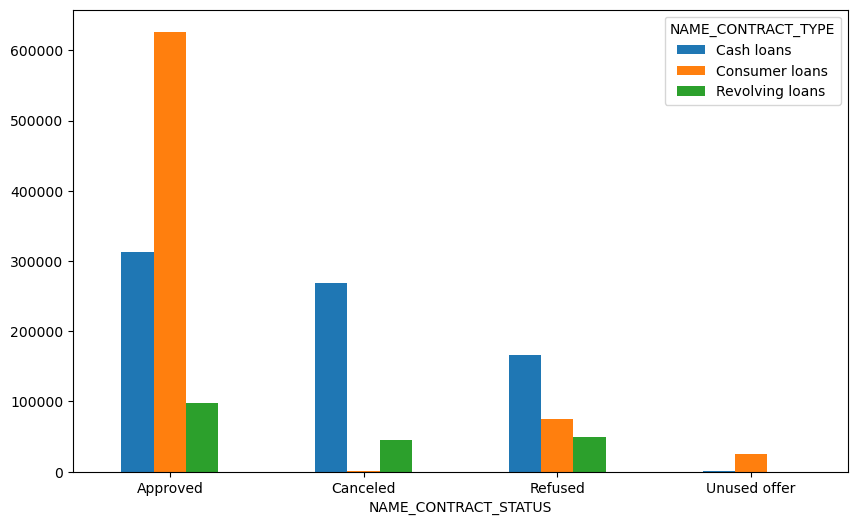

In [361]:
tab2= pd.crosstab(index=data1['NAME_CONTRACT_STATUS'],columns=data1['NAME_CONTRACT_TYPE'])
print(tab2)
tab2.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the people tends to take consumer loans.

NAME_CLIENT_TYPE                              New  Refreshed  Repeater
NAME_PAYMENT_TYPE                                                     
Cash through the bank                      298288     134957   1227691
Cashless from the account of the employer     333         79       673
Non-cash from your account                   2742        613      4838


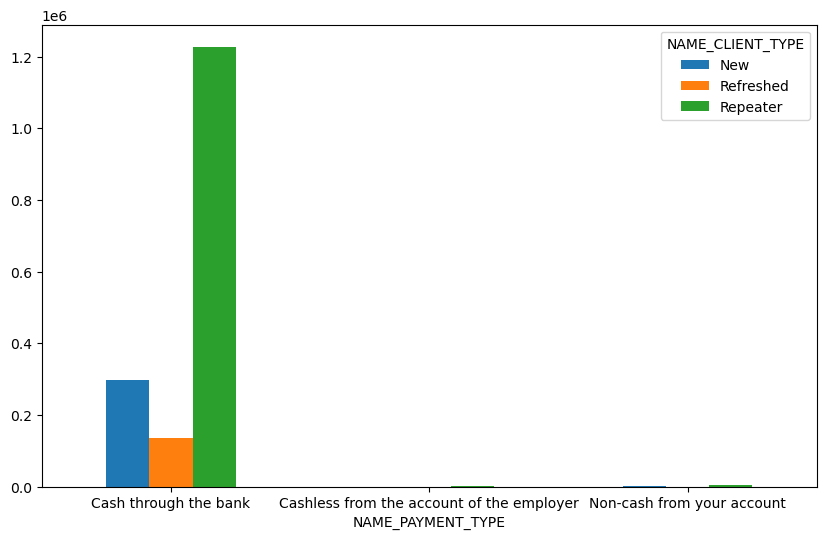

In [363]:
tab2= pd.crosstab(index=data1['NAME_PAYMENT_TYPE'],columns=data1['NAME_CLIENT_TYPE'])
print(tab2)
tab2.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the people who take loan repeatedly tends to take cash through the bank .loans.

NAME_PORTFOLIO        Cards  Cars    Cash     POS
NAME_CONTRACT_STATUS                             
Approved              97771   263  312536  626211
Canceled                473    44    9823  305979
Refused               46739   118  139204  104617
Unused offer              2     0       0   26434


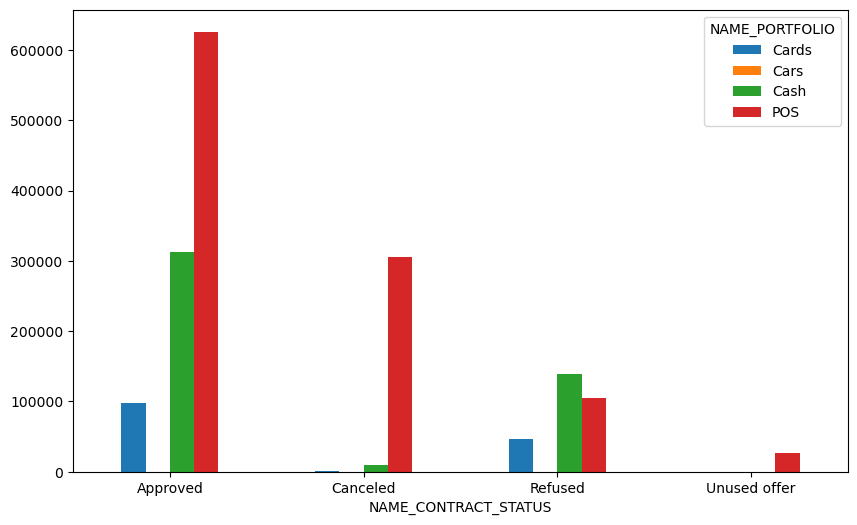

In [365]:
tab2= pd.crosstab(index=data1['NAME_CONTRACT_STATUS'],columns=data1['NAME_PORTFOLIO'])
print(tab2)
tab2.plot(kind="bar", figsize=(10,6),stacked=False)
plt.xticks(rotation=0)
plt.show()

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the people tends to take Cash Loan.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT'>

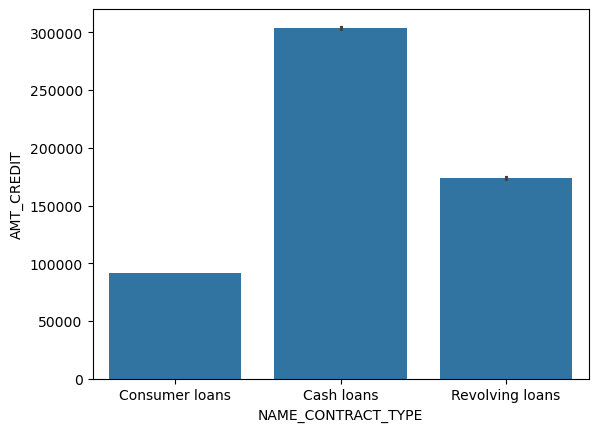

In [367]:
sns.barplot(data=data1,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT')

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the people tends to take cash loans.

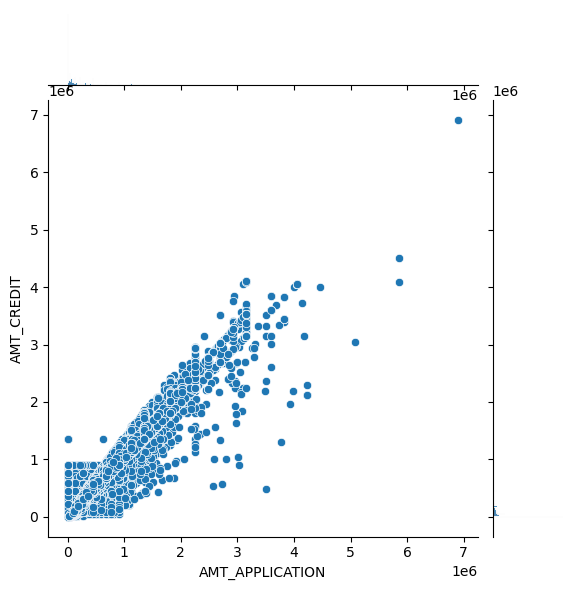

In [369]:
sns.jointplot(data=data1,x='AMT_APPLICATION',y='AMT_CREDIT')

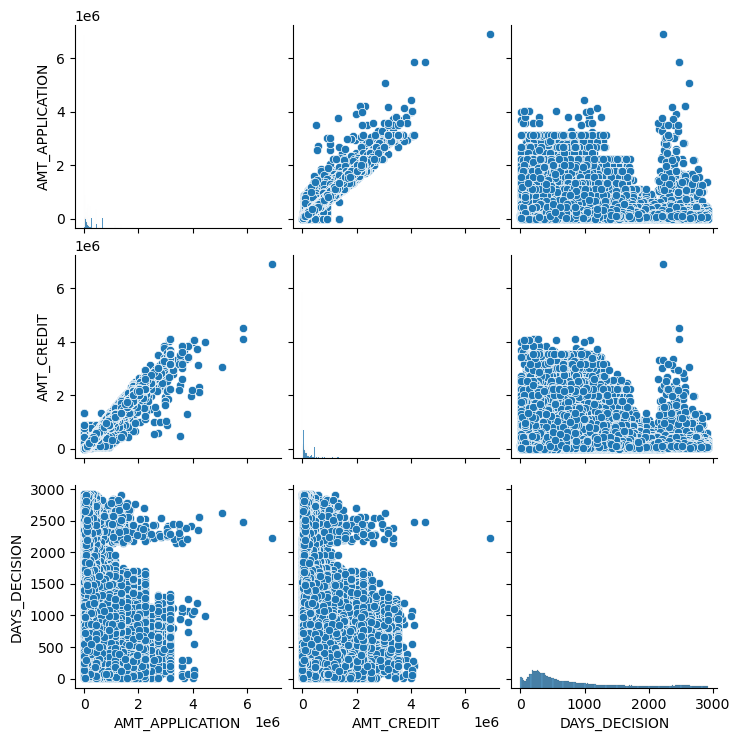

In [381]:
#plot the pair plot of AMT_APPLICATION, AMT_CREDIT and DAYS_DECISION in data1 dataframe.
sns.pairplot(data=data1, vars=["AMT_APPLICATION","AMT_CREDIT", "DAYS_DECISION"])
plt.show()

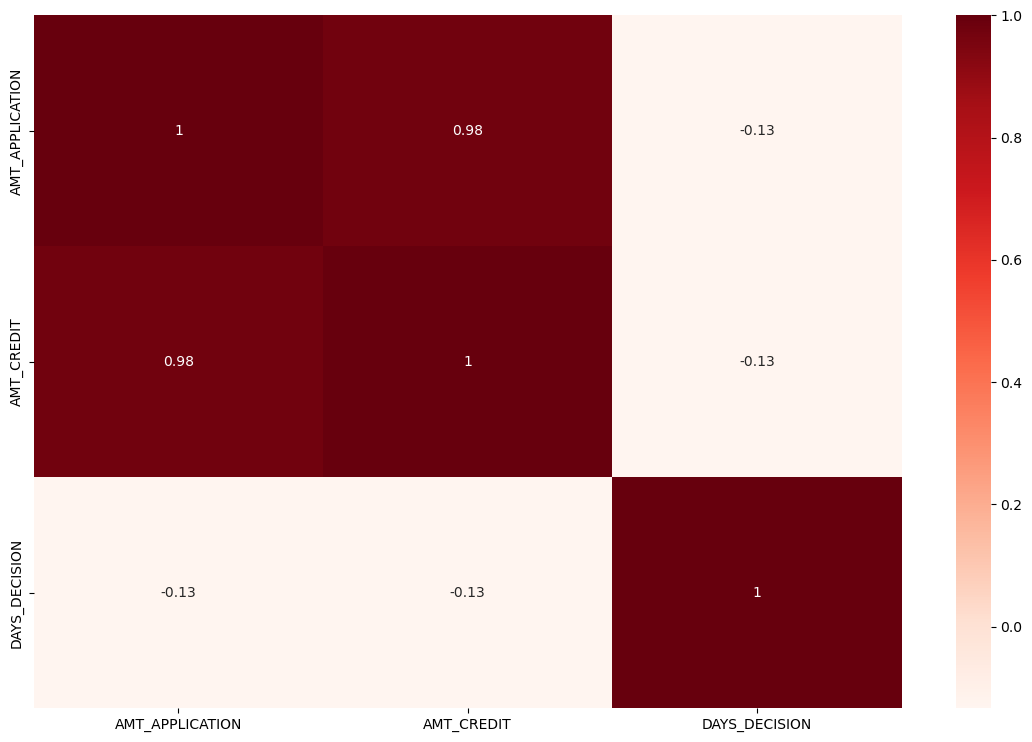

In [382]:
#plot the correlation matrix of AMT_APPLICATION, AMT_CREDIT and DAYS_DECISION in data1 dataframe.
plt.figure(figsize=[14,9])
sns.heatmap( data1[["AMT_APPLICATION","AMT_CREDIT", "DAYS_DECISION"]].corr(), annot= True, cmap= "Reds")
plt.show()

## <font color=red>Merge Data0 And Data1<font>

In [401]:
data0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'A

In [403]:
data1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AMT_CREDIT_RANGE', 'AMT_APPLICATION_RANGE'],
      dtype='object')

In [405]:
merged_df=pd.merge(data0,data1,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_Current CODE_GENDER  CNT_CHILDREN  \
0      100002       1                 Cash loans           M             0   
1      100003       0                 Cash loans           F             0   
2      100003       0                 Cash loans           F             0   
3      100003       0                 Cash loans           F             0   
4      100004       0            Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_Current  AMT_ANNUITY  AMT_GOODS_PRICE  \
0        202,500.00          406,597.50    24,700.50       351,000.00   
1        270,000.00        1,293,502.50    35,698.50     1,129,500.00   
2        270,000.00        1,293,502.50    35,698.50     1,129,500.00   
3        270,000.00        1,293,502.50    35,698.50     1,129,500.00   
4         67,500.00          135,000.00     6,750.00       135,000.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                        0.02   
1               Married  House / apartment                        0.00   
2               Married  House / apartment                        0.00   
3               Married  House / apartment                        0.00   
4  Single / not married  House / apartment                        0.01   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       16765           1188               1186              291   
3       16765           1188               1186              291   
4       19046            225               4260             2531   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                2                     1                            1   
3                2                     1                            1   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START_Current  HOUR_APPR_PROCESS_START_Current  \
0                          WEDNESDAY                               10   
1                             MONDAY                               11   
2                             MONDAY                               11   
3                             MONDAY                               11   
4                             MONDAY                                9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School  

In [406]:
merged_df.shape

(1153787, 67)

In [407]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_Current', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_Current', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_Current', 'HOUR_APPR_PROCESS_START_Current',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_R

### <font color=red>A) Categorical Analysis<font>

In [409]:
cat_cols=list(merged_df.dtypes[merged_df.dtypes=='object'].index)
merged_df[cat_cols].head()

NAME_CONTRACT_TYPE_Current CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0                 Cash loans           M   Unaccompanied          Working   
1                 Cash loans           F          Family    State servant   
2                 Cash loans           F          Family    State servant   
3                 Cash loans           F          Family    State servant   
4            Revolving loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  WEEKDAY_APPR_PROCESS_START_Current       ORGANIZATION_TYPE  \
0                          WEDNESDAY  Business Entity Type 3   
1                             MONDAY                  School   
2                             MONDAY                  School   
3                             MONDAY                  School   
4                             MONDAY              Government   

  NAME_CONTRACT_TYPE_Previous WEEKDAY_APPR_PROCESS_START_Previous  \
0              Consumer loans                            SATURDAY   
1                  Cash loans                              FRIDAY   
2              Consumer loans                              SUNDAY   
3              Consumer loans                            SATURDAY   
4              Consumer loans                              FRIDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                           Y             Approved  Cash through the bank   
1                           Y             Approved  Cash through the bank   
2                           Y             Approved  Cash through the bank   
3                           Y             Approved  Cash through the bank   
4                           Y             Approved  Cash through the bank   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE NAME_YIELD_GROUP  \
0              New            POS                    Stone       low_normal   
1         Repeater           Cash  Credit and cash offices       low_normal   
2        Refreshed            POS                    Stone           middle   
3        Refreshed            POS             Country-wide           middle   
4              New            POS         Regional / Local           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

In [410]:
# Get categorical columns
cat_cols = list(merged_df.select_dtypes(include='object').columns)
merged_df[cat_cols].head()


NAME_CONTRACT_TYPE_Current CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0                 Cash loans           M   Unaccompanied          Working   
1                 Cash loans           F          Family    State servant   
2                 Cash loans           F          Family    State servant   
3                 Cash loans           F          Family    State servant   
4            Revolving loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  WEEKDAY_APPR_PROCESS_START_Current       ORGANIZATION_TYPE  \
0                          WEDNESDAY  Business Entity Type 3   
1                             MONDAY                  School   
2                             MONDAY                  School   
3                             MONDAY                  School   
4                             MONDAY              Government   

  NAME_CONTRACT_TYPE_Previous WEEKDAY_APPR_PROCESS_START_Previous  \
0              Consumer loans                            SATURDAY   
1                  Cash loans                              FRIDAY   
2              Consumer loans                              SUNDAY   
3              Consumer loans                            SATURDAY   
4              Consumer loans                              FRIDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                           Y             Approved  Cash through the bank   
1                           Y             Approved  Cash through the bank   
2                           Y             Approved  Cash through the bank   
3                           Y             Approved  Cash through the bank   
4                           Y             Approved  Cash through the bank   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE NAME_YIELD_GROUP  \
0              New            POS                    Stone       low_normal   
1         Repeater           Cash  Credit and cash offices       low_normal   
2        Refreshed            POS                    Stone           middle   
3        Refreshed            POS             Country-wide           middle   
4              New            POS         Regional / Local           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

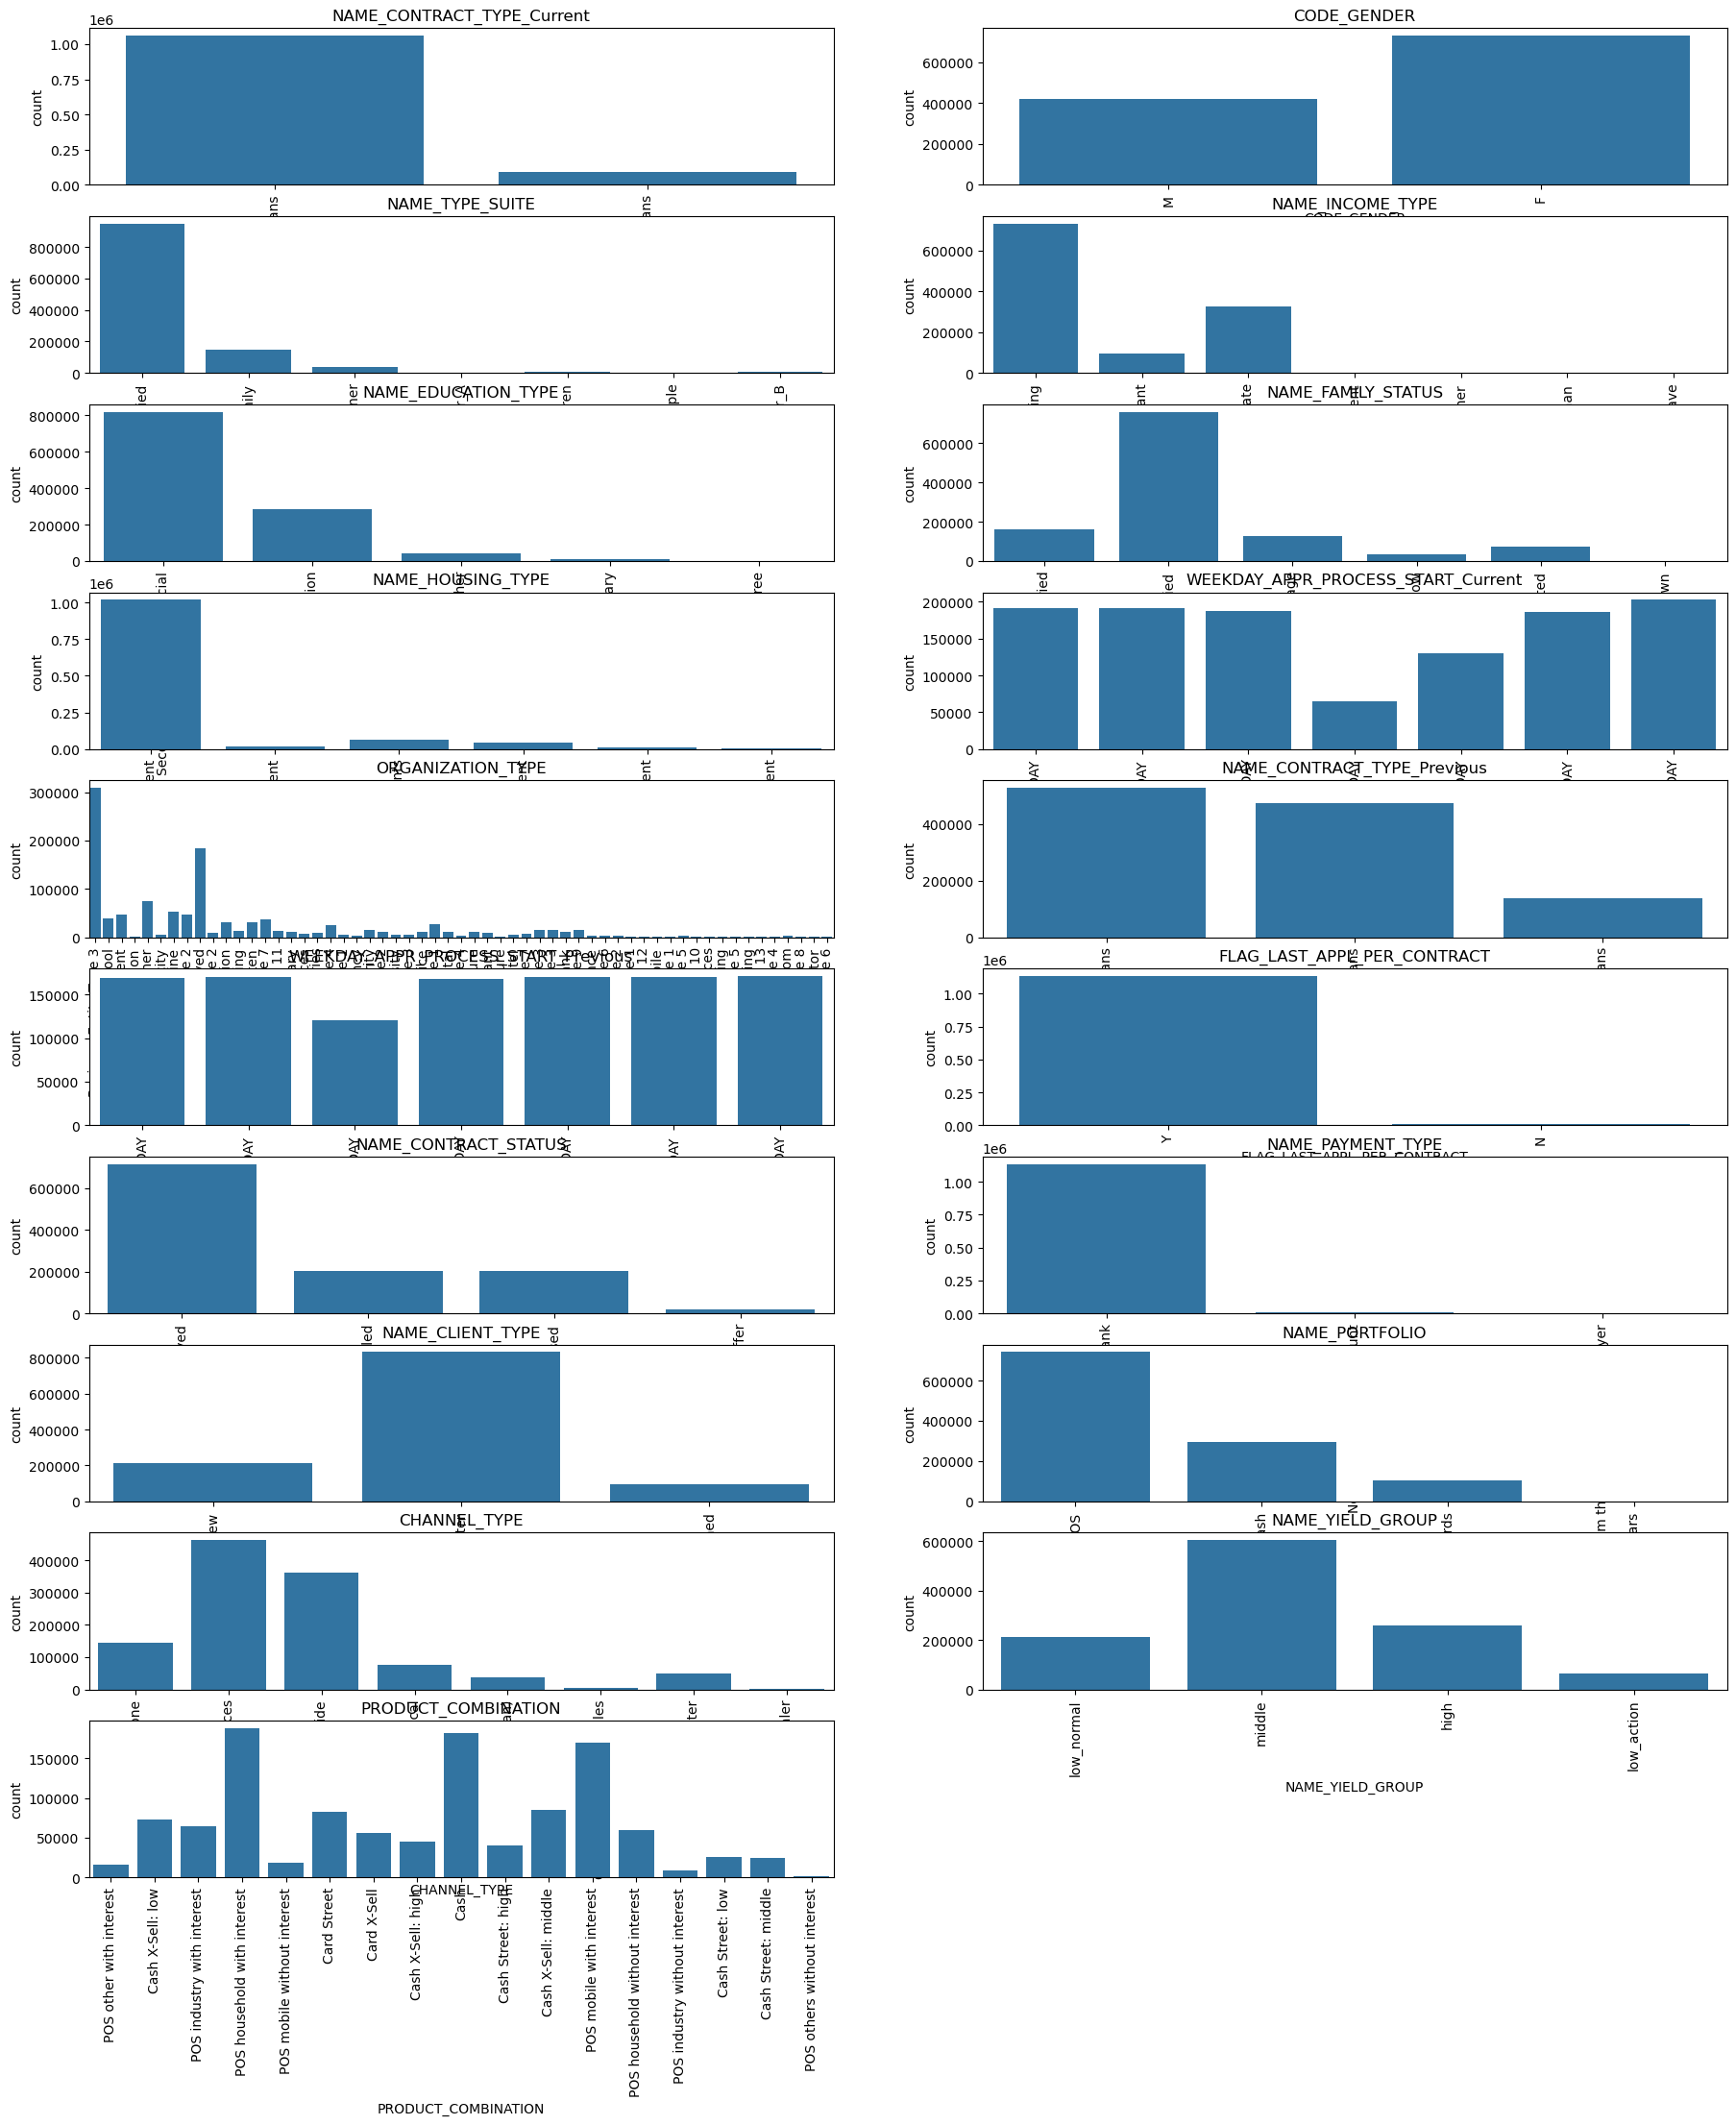

In [411]:
# Plotting count plots for each categorical column
plt.figure(figsize=(22, 25))
for idx, col in enumerate(cat_cols):
    plt.subplot((len(cat_cols) + 1) // 2, 2, idx + 1)  # Ensure rows and columns are calculated correctly
    sns.countplot(x=col, data=merged_df)
    plt.title(col)  # Add a title for each plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Avoid overlap of plots and titles
plt.show()

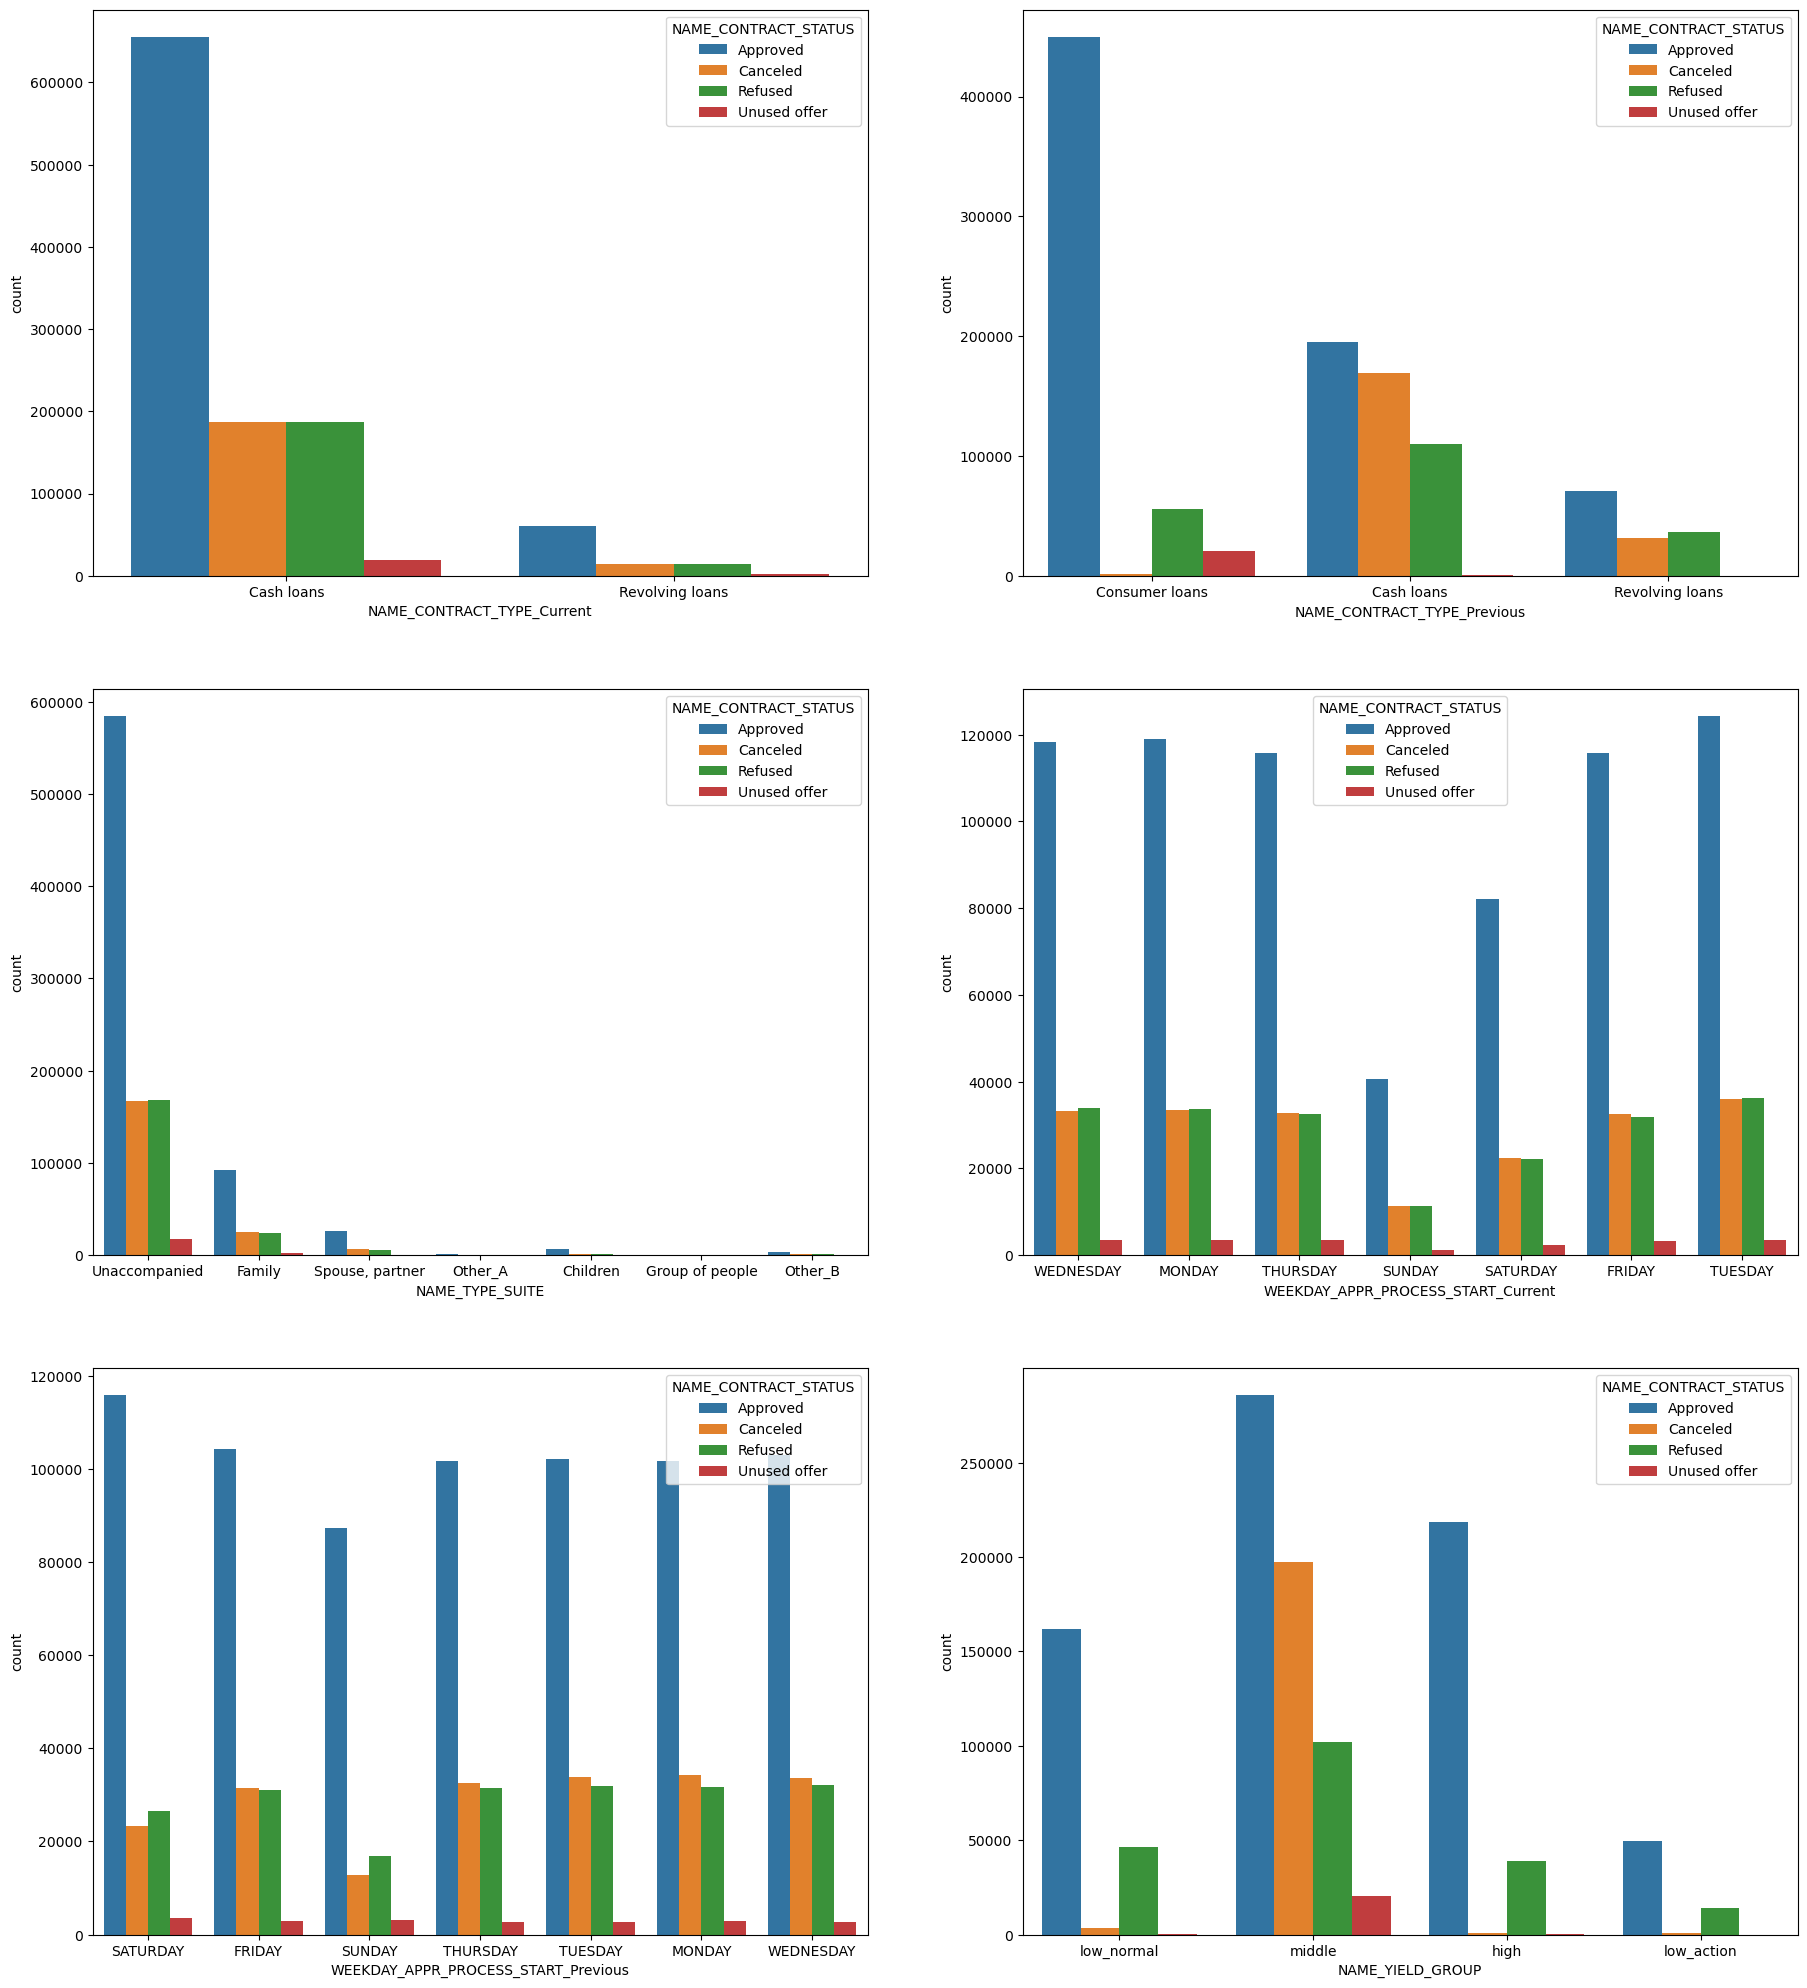

In [412]:
# Univariate Categorical analysis
#categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous','NAME_TYPE_SUIT','WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous','AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START_Current',
                     'WEEKDAY_APPR_PROCESS_START_Previous','NAME_YIELD_GROUP']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

As we can seefrom the graph
-  Previously bank was providing Cash, Revolving and Consumer loans.
-  currently bank is only giving two types of loans -Cash and Revolving Loans.
- both in NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current unaccompanied has the highest number.
-  but in current application it is tuesday.
-  in previous application saturday has the highest approval rate.
-  Middle NAME_YIELD_GROUP has highest approval.

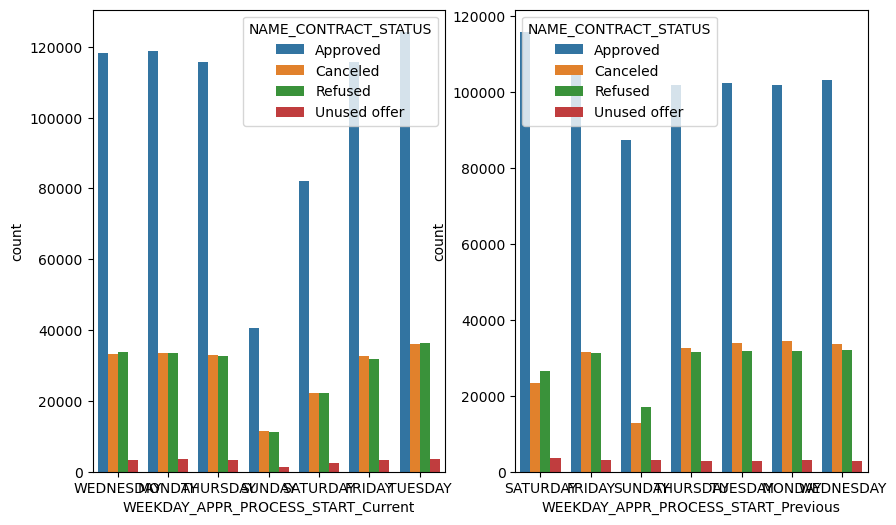

In [414]:
# Univariate Categorical analysis
#categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous','NAME_TYPE_SUIT','WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous','AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']
categorical_columns=['WEEKDAY_APPR_PROCESS_START_Current',
                     'WEEKDAY_APPR_PROCESS_START_Previous']

plt.figure(figsize=(10,6))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

### <font color=red>B) Numerical Analysis<font>

In [416]:
# Extracting numerical columns from merged_df
num_mer_cols = list(merged_df.select_dtypes(exclude='object').columns)

# Display the first few rows of numerical columns in merged_df
merged_df[num_mer_cols].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0      100002       1             0        202,500.00          406,597.50   
1      100003       0             0        270,000.00        1,293,502.50   
2      100003       0             0        270,000.00        1,293,502.50   
3      100003       0             0        270,000.00        1,293,502.50   
4      100004       0             0         67,500.00          135,000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0    24,700.50       351,000.00                        0.02        9461   
1    35,698.50     1,129,500.00                        0.00       16765   
2    35,698.50     1,129,500.00                        0.00       16765   
3    35,698.50     1,129,500.00                        0.00       16765   
4     6,750.00       135,000.00                        0.01       19046   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637               3648             2120                1   
1           1188               1186              291                2   
2           1188               1186              291                2   
3           1188               1186              291                2   
4            225               4260             2531                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   HOUR_APPR_PROCESS_START_Current  REG_REGION_NOT_LIVE_REGION  \
0                               10                           0   
1                               11                           0   
2                               11                           0   
3                               11                           0   
4                                9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.26                         2                         2   
1          0.62                         1                         0   
2          0.62                         1                         0   
3          0.62                         1                         0   
4          0.56                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                1,134.00   
1                         1                         0                  828.00   
2                         1                         0                  828.00   
3                         1                         0                  828.00   
4                         0                         0                  815.00   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0           

In [417]:
num_er_cols=list(merged_df.dtypes[merged_df.dtypes!='object'].index)
merged_df[num_mer_cols].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0      100002       1             0        202,500.00          406,597.50   
1      100003       0             0        270,000.00        1,293,502.50   
2      100003       0             0        270,000.00        1,293,502.50   
3      100003       0             0        270,000.00        1,293,502.50   
4      100004       0             0         67,500.00          135,000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0    24,700.50       351,000.00                        0.02        9461   
1    35,698.50     1,129,500.00                        0.00       16765   
2    35,698.50     1,129,500.00                        0.00       16765   
3    35,698.50     1,129,500.00                        0.00       16765   
4     6,750.00       135,000.00                        0.01       19046   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637               3648             2120                1   
1           1188               1186              291                2   
2           1188               1186              291                2   
3           1188               1186              291                2   
4            225               4260             2531                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   HOUR_APPR_PROCESS_START_Current  REG_REGION_NOT_LIVE_REGION  \
0                               10                           0   
1                               11                           0   
2                               11                           0   
3                               11                           0   
4                                9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.26                         2                         2   
1          0.62                         1                         0   
2          0.62                         1                         0   
3          0.62                         1                         0   
4          0.56                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                1,134.00   
1                         1                         0                  828.00   
2                         1                         0                  828.00   
3                         1                         0                  828.00   
4                         0                         0                  815.00   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0           

In [418]:
merged_df[num_mer_cols].columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_Current', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START_Current', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE_Current', 'INCOME_GROUP',
    

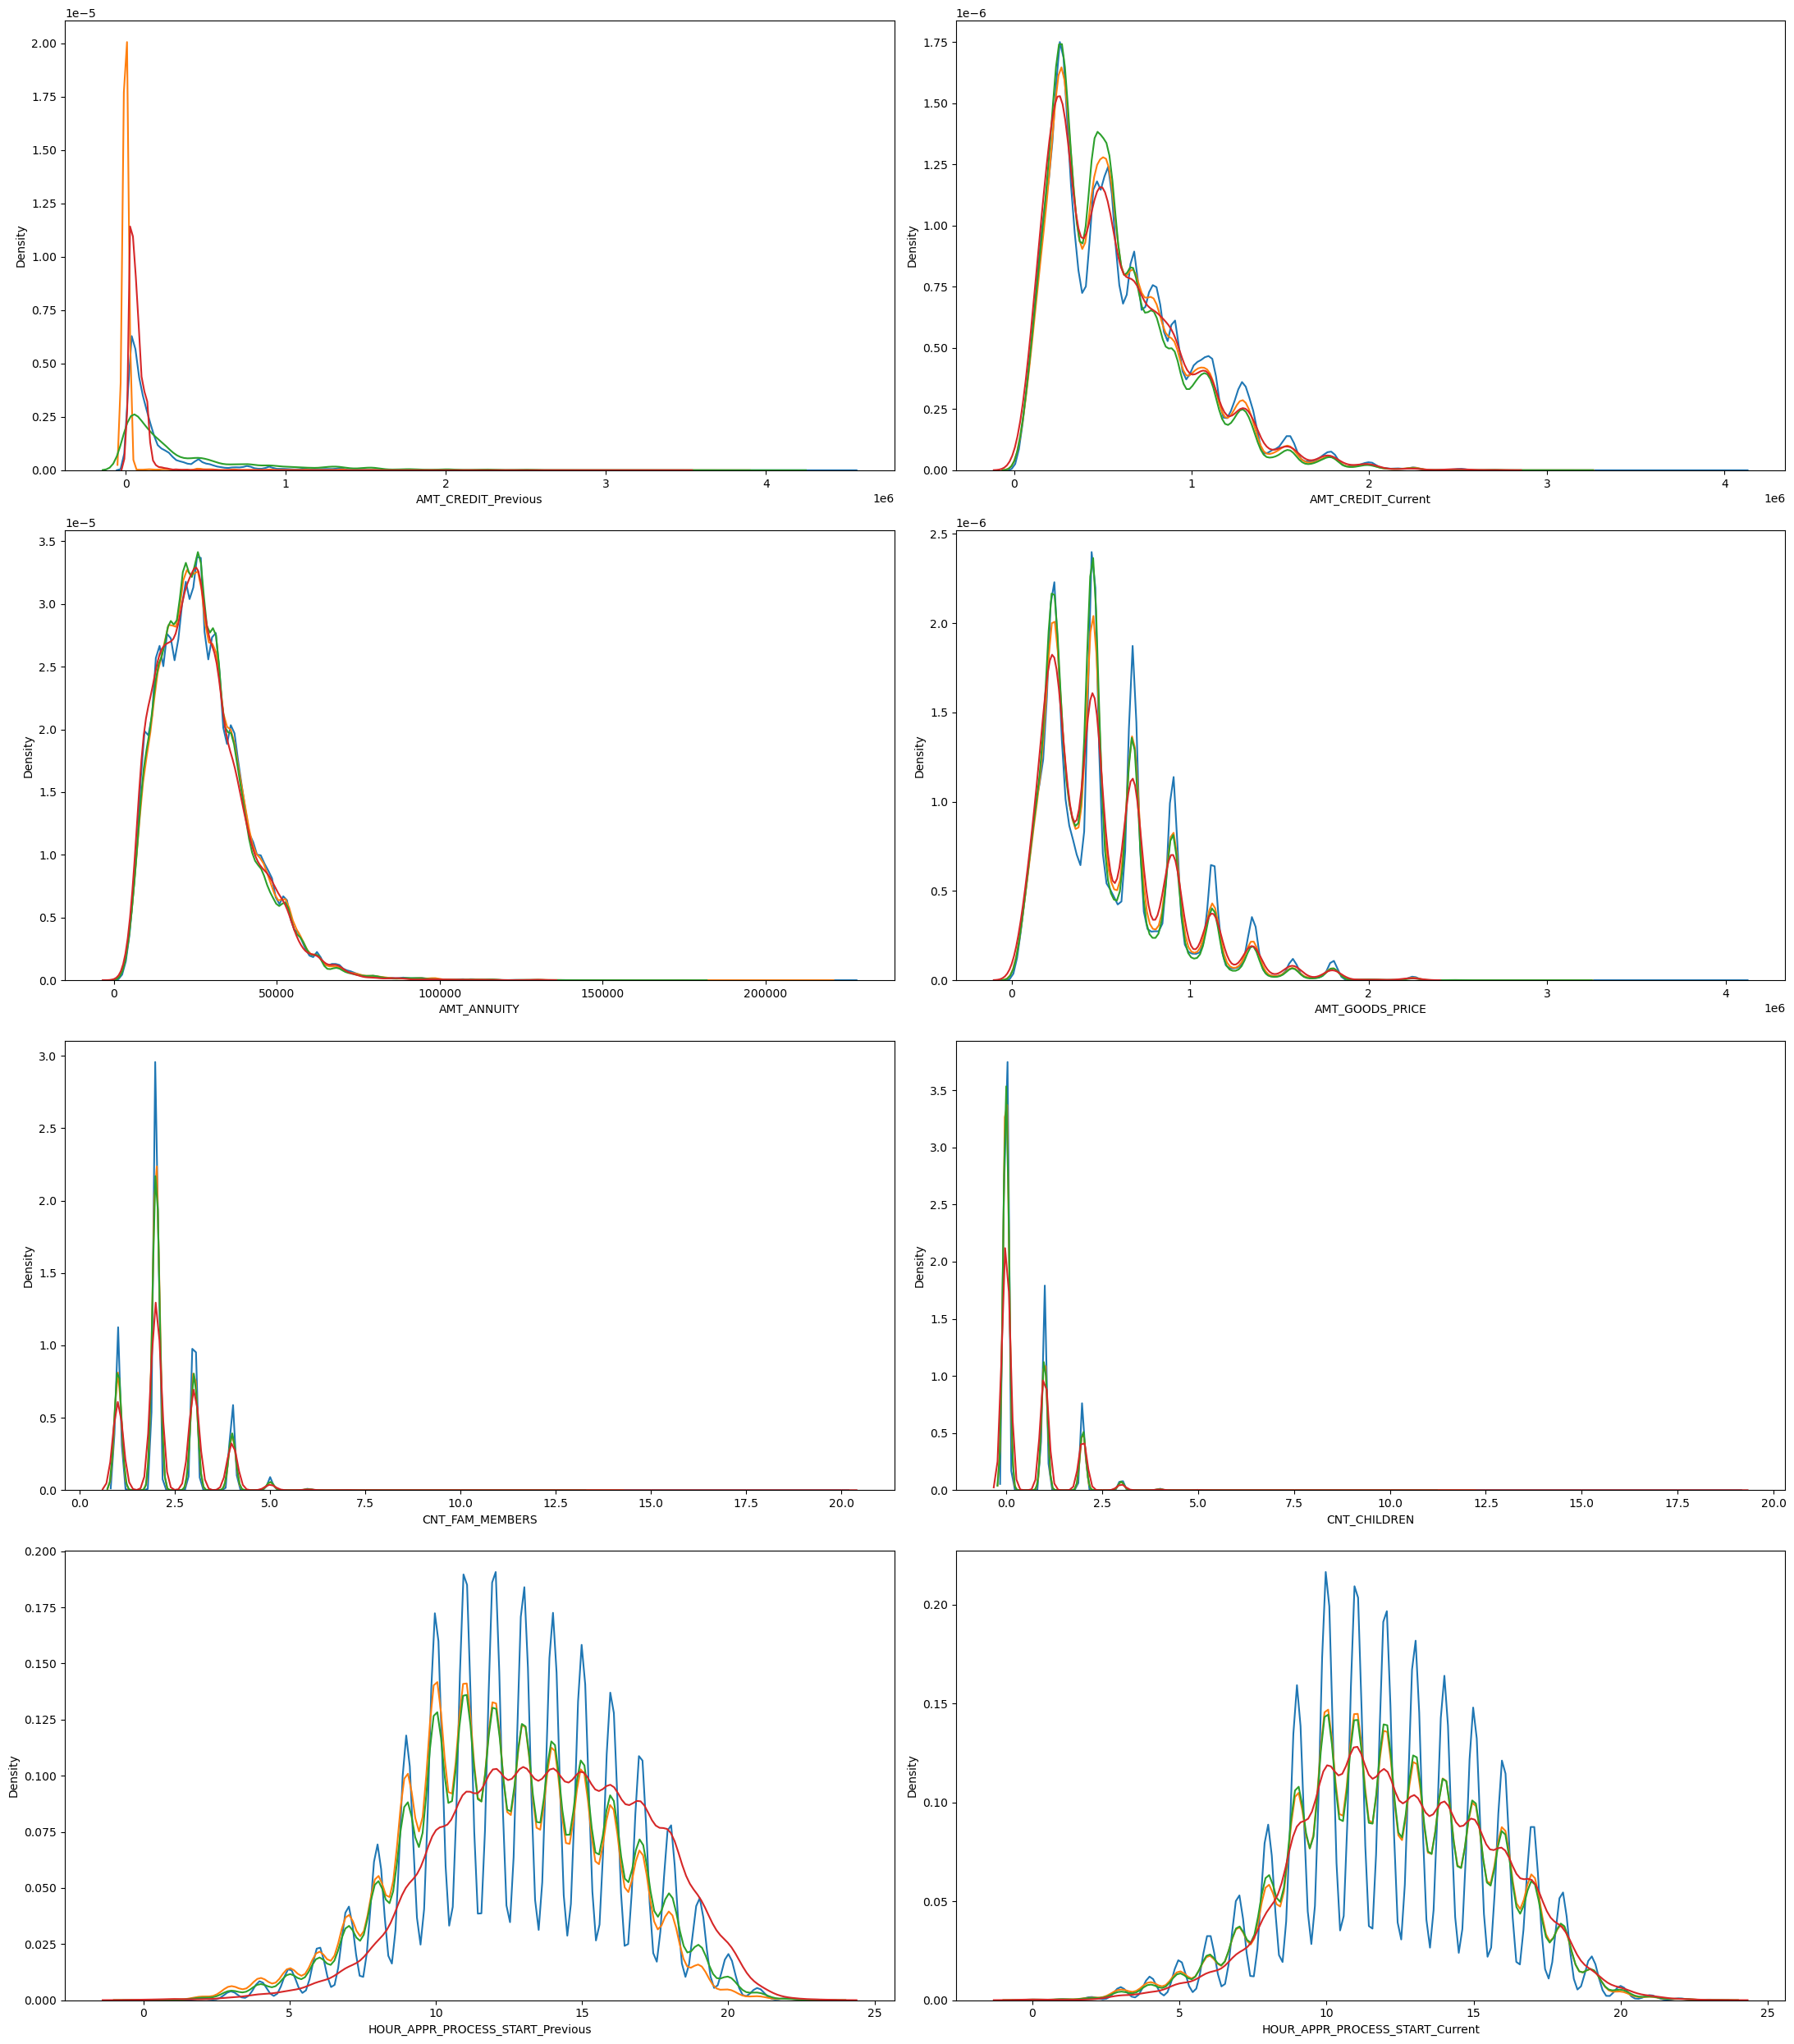

In [422]:
num_col=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY',
                   'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']

plt.figure(figsize=(22,25))
for i in (enumerate(num_col)):
    plt.subplot(len(num_col)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')
plt.tight_layout() 
plt.show() 

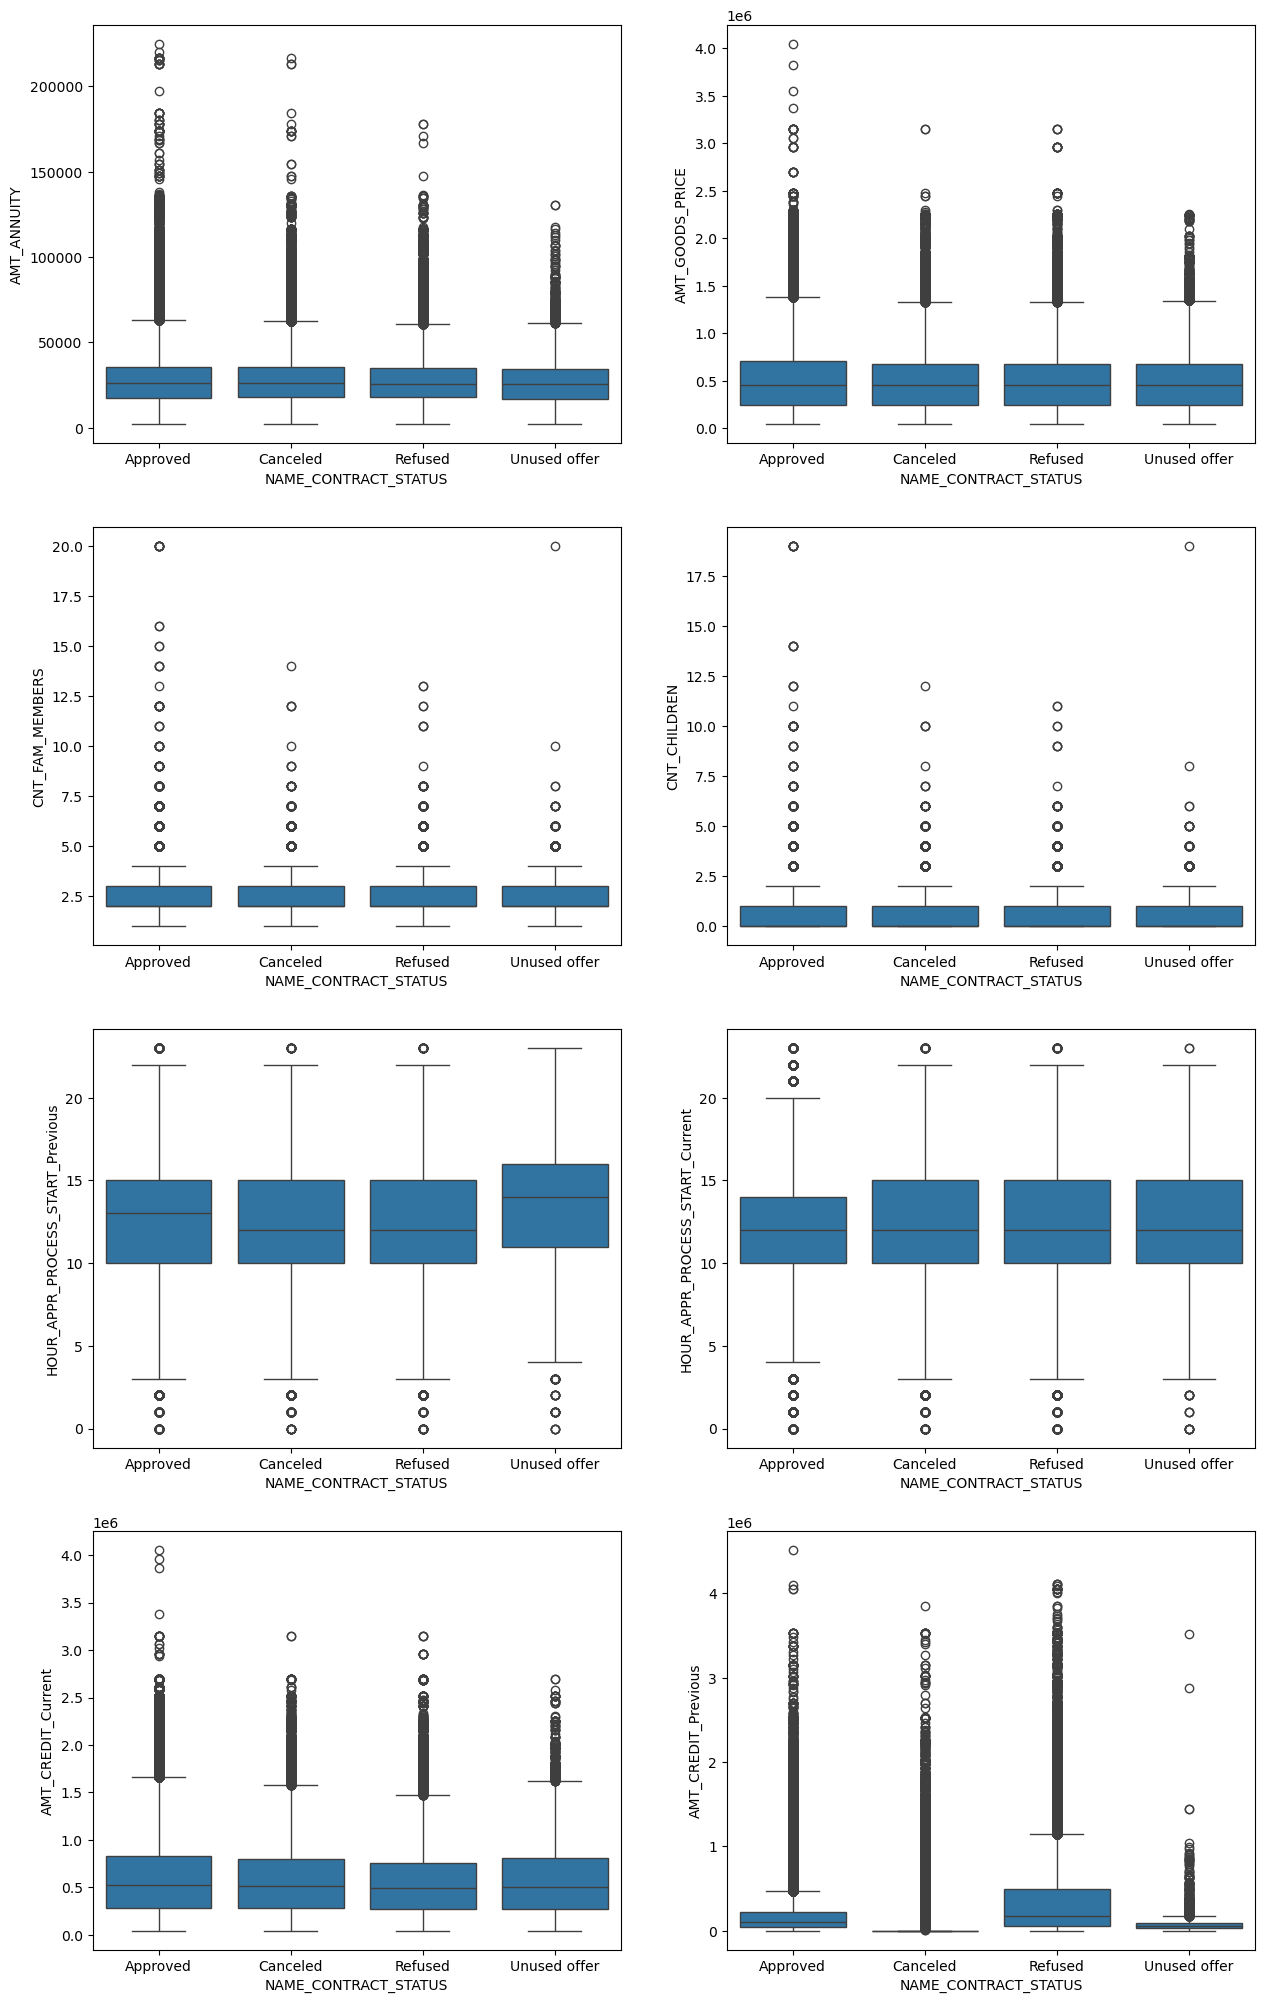

In [424]:
continous_columns=['AMT_ANNUITY',
                   'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                   #'AMT_INCOME_TOTAL']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

### <font color=red>C) Bi-variate Analysis<font>

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        655781            60150
Canceled                        187363            14402
Refused                         186931            14645
Unused offer                     18813             2033


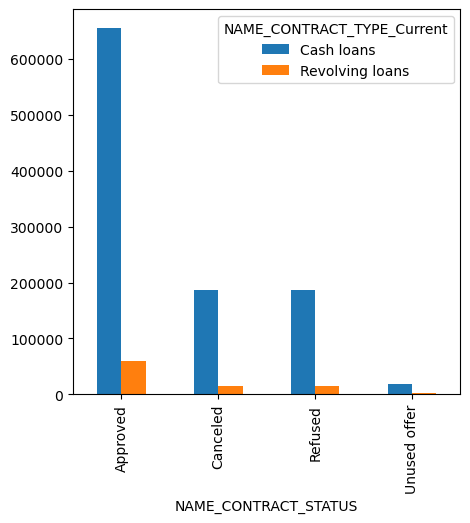

In [426]:
tab5= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(tab5)
tab5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
#The largest number of loans that have been approved are cash loans.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the Cash loans have the highest count of Approved loans.

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10         44   
Canceled                             59785                2         14   
Refused                              58117                3         26   
Unused offer                          5072                1          0   

NAME_INCOME_TYPE      State servant  Student  Working  
NAME_CONTRACT_STATUS                                   
Approved                      61630       20   455720  
Canceled                      15679        3   126282  
Refused                       15597        1   127832  
Unused offer                   1518        0    14255  


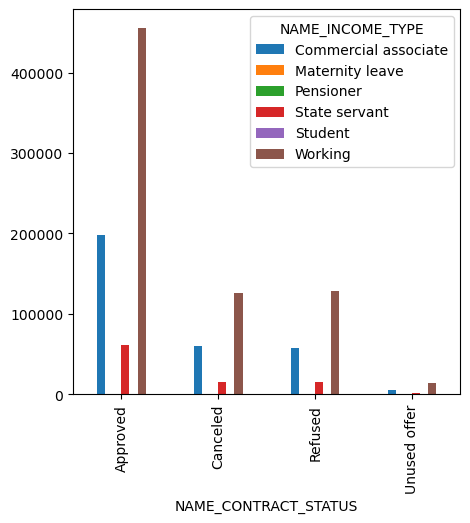

In [429]:
tab6= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(tab6)
tab6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# The functioning candidate with the most approvals

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the Highest number of approvals for working applicant.

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          353            172665              26038   
Canceled                           46             48689               7367   
Refused                            88             48061               8175   
Unused offer                        6              6367                973   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                         6363                         510512  
Canceled                         1824                         143839  
Refused                          1871                         143381  
Unused offer                      128                          13372  


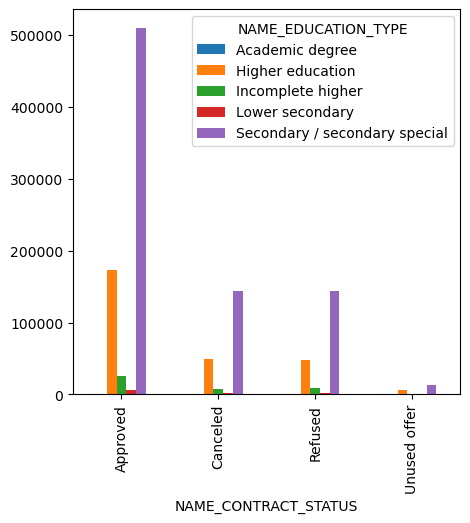

In [431]:
tab7= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(tab7)
tab7.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Secondary/secondary special education applicants received the most approvals.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of Highest number of approvals for Secondary/secondary special educated applicant.

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       75455   477237      45155   
Canceled                       22098   133590      12605   
Refused                        24500   128003      13177   
Unused offer                    1862    13313       1448   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                             97113  20971  
Canceled                             27209   6263  
Refused                              29453   6443  
Unused offer                          3816    407  


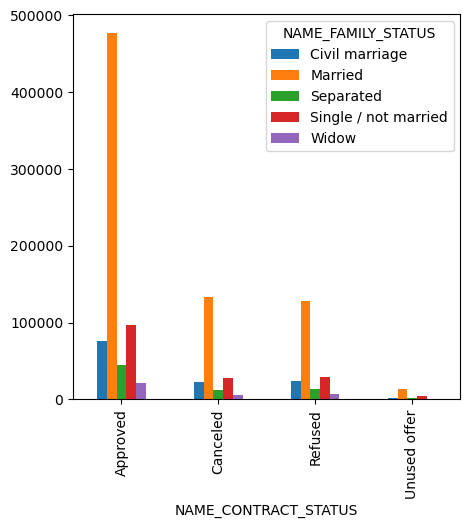

In [433]:
tab8= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(tab8)
tab8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# The married candidate received the most approvals.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of Highest number of approvals for Married applicant.

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2469             630551                26478   
Canceled                          511             179293                 7046   
Refused                           597             177712                 6891   
Unused offer                      296              18044                  640   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          6410             12082         37941  
Canceled                          1690              3199         10026  
Refused                           1749              3368         11259  
Unused offer                       169               274          1423  


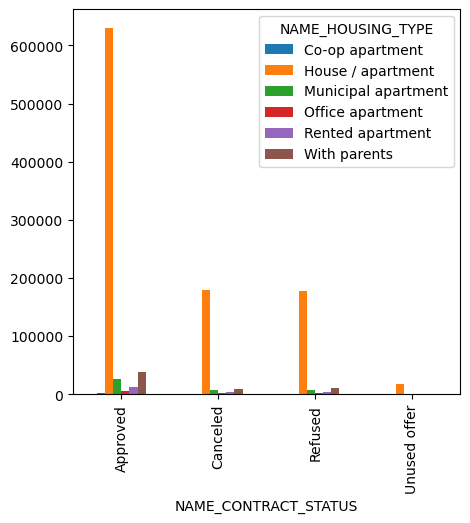

In [435]:
tab9= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(tab9)
tab9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# The owner of the house or flat has the most approvals.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the Highest number of approvals for House/apartment owner.

NAME_CLIENT_TYPE         New  Refreshed  Repeater
NAME_CONTRACT_STATUS                             
Approved              199844      67780    448307
Canceled                2592      12741    186432
Refused                10925      10608    180043
Unused offer            1692       3112     16042


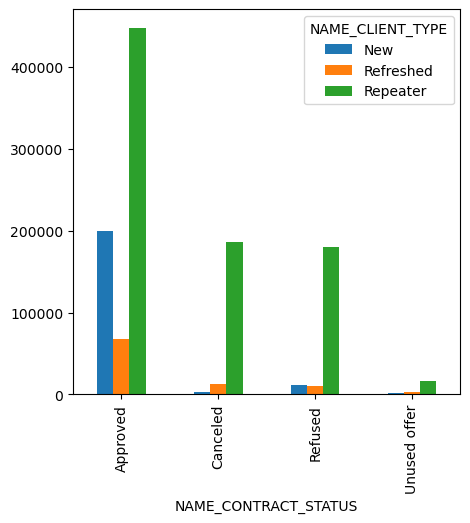

In [437]:
tab13= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CLIENT_TYPE'])
print(tab13)
tab13.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Greater approval rate in contrast to new customers.

-  Compared to new clients, repeat customers are more likely to get approved.
-  Refusals are more likely to occur for new clients, underscoring the significance of thorough risk assessment for new applications.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans
NAME_CONTRACT_STATUS                                                    
Approved                         194984          450103            70844
Canceled                         169402            1086            31277
Refused                          109755           55593            36228
Unused offer                        377           20466                3


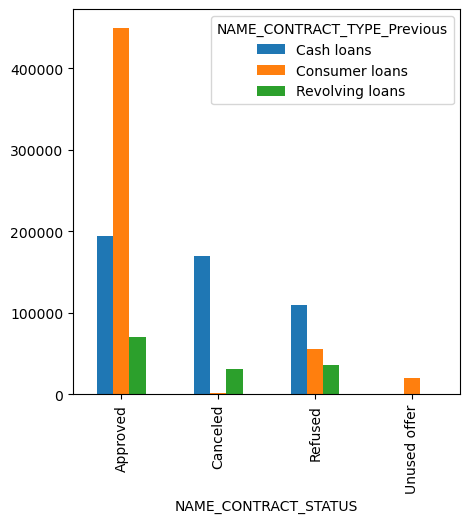

In [439]:
tab10= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(tab10)
tab10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# The most consumer loans have been approved.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the Highest number of approvals for Consumer Loans.

NAME_CLIENT_TYPE         New  Refreshed  Repeater
NAME_CONTRACT_STATUS                             
Approved              199844      67780    448307
Canceled                2592      12741    186432
Refused                10925      10608    180043
Unused offer            1692       3112     16042


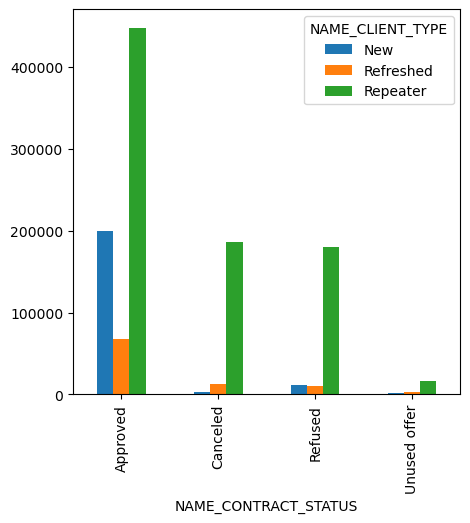

In [441]:
tab11= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CLIENT_TYPE'])
print(tab11)
tab11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# The majority of repeated applications were accepted.

We can see from the **bar graph** that displays In comparison to other categories, we may claim that most of the repeated applications got approved most number of times.

sairam

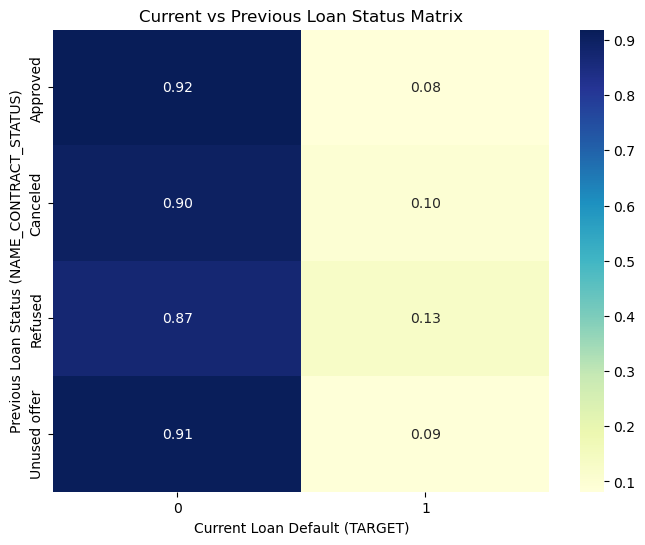

In [444]:
# Create a pivot table
matrix = pd.crosstab(merged_df['NAME_CONTRACT_STATUS'], merged_df['TARGET'], normalize='index')

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Current vs Previous Loan Status Matrix")
plt.xlabel("Current Loan Default (TARGET)")
plt.ylabel("Previous Loan Status (NAME_CONTRACT_STATUS)")
plt.show()

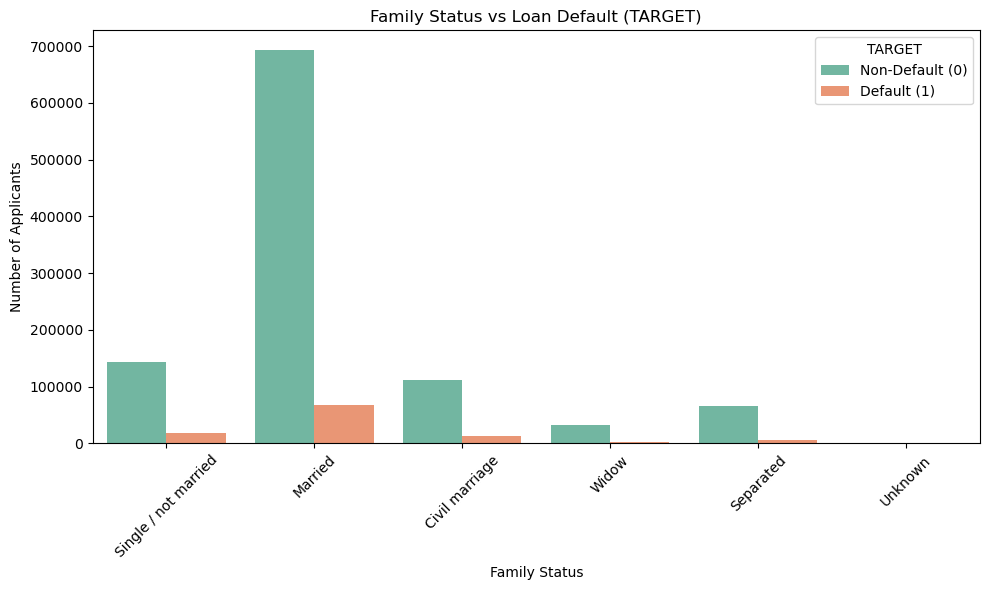

In [446]:
# Create a bar chart of family status vs. default rate
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='NAME_FAMILY_STATUS', hue='TARGET', palette='Set2')
plt.title("Family Status vs Loan Default (TARGET)")
plt.xlabel("Family Status")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.legend(title='TARGET', labels=['Non-Default (0)', 'Default (1)'])
plt.tight_layout()
plt.show()


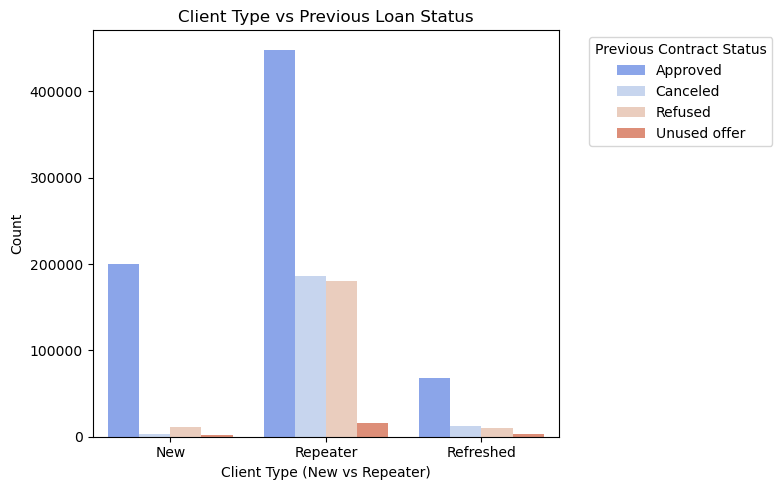

In [448]:
# Create a bar chart of client type vs. previous loan decision
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', palette='coolwarm')
plt.title("Client Type vs Previous Loan Status")
plt.xlabel("Client Type (New vs Repeater)")
plt.ylabel("Count")
plt.legend(title="Previous Contract Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
